# IMDB Movies Data Analysis

## 1. Import Libraries 

In [5]:
library(ggplot2)
library(dplyr)
library(tm)

library(tidyverse)
library(corrr)
library(bindrcpp)
library(ggraph)
library(igraph)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ NLP::annotate() masks ggplot2::annotate()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘igraph’

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:tidyr’:

    crossing

The following object is masked from ‘package:tibble’:

    as_data_frame

The following objects are masked 

## 2. Load Data

In [6]:
data <- read.csv('../../../../Downloads/IMDB-Movie-Data.csv')

## 3. Reshape Data 1
- 3-1. Change Data Type & Reshape Data
    - factor형 변수 -> char형 변수로? <br>
    <br>
    - missing value(결측치)처리
        - sample의 obj
            - population을 대표
            - 모집단과 멀어지면 안 된다. <br>
            <br>
        - Continuous일 경우
            - 분포를 보고 평균을 대체하든, 중위수로 대체하든...
            - 다른 변수들과의 관계를 봐서 더 정확한 값으로 대체 <br>
    <br>
        - Discrete일 경우
            - 최빈으로  <br>
    <br>
    - data type (변수 척도)
        - factor : 명목척도(factor)
            - Title : 영화 제목
            - Genre : 영화 장르
            - Description : 영화 설명
            - Director : 영화 감독
            - Actors : 영화 배우
            - Year : 개봉년도 ... (int지만 사실은 factor(명목형)이라서(?) factor로 바꿔줘야함) <br>
            <br>
        - etc : 순서척도
            - Rank : 순위
            - Runtime..Minutes :  상영 시간 -> 연속형
            - Rating :  ... 연속형(1~10)
            - Metascore :  ... 연속형
            - Votes : 관람객 수 ... 연속형

            - Revenue..Millions. : 수익금 <br>
<br>
- 3-2. summary data
    - str(data) <br>
        <br>
- 참고 : https://m.blog.naver.com/PostView.nhn?blogId=hancury&logNo=220396495672&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F

### 3-1. as.factor(year)
    - 숫자형(int)를 명목형(factor)으로 변경

In [7]:
data$Year = as.factor(data$Year)
str(data)

'data.frame':	1000 obs. of  12 variables:
 $ Rank              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title             : Factor w/ 999 levels "(500) Days of Summer",..: 288 569 656 636 674 780 403 471 833 539 ...
 $ Genre             : Factor w/ 207 levels "Action","Action,Adventure",..: 12 86 196 93 8 8 117 109 3 75 ...
 $ Description       : Factor w/ 1000 levels "\"21\" is the fact-based story about six MIT students who were trained to become experts in card counting and s"| __truncated__,..: 111 539 881 614 221 520 135 122 279 241 ...
 $ Director          : Factor w/ 644 levels "Aamir Khan","Abdellatif Kechiche",..: 266 519 392 106 137 641 123 559 265 449 ...
 $ Actors            : Factor w/ 996 levels "Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani",..: 185 737 419 659 972 650 810 314 154 456 ...
 $ Year              : Factor w/ 11 levels "2006","2007",..: 9 7 11 11 11 11 11 11 11 11 ...
 $ Runtime..Minutes. : int  121 124 117 108 123 103 128 89 141 116 ...
 $ Rating            

In [8]:
summary(data$Revenue..Millions.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   13.27   47.98   82.96  113.72  936.63     128 

## 4. EDA
### 4-1. Bar Plot & Histogram
- 변수 척도에 따라 쓰이는 graph가 달라진다.
    - 명목형(discrete)
        - Bar Plot
            - bar가 떨어져 있다.
            - why? ... Count를 하니까
    - 연속형(continuous)
        - Histogram
            - bar가 붙어 있다.
            - why? ... 구간이 이어져 있어서

- aes
    - 미적인 부분을 담당
        - 변수 하나만 넣으면 됨
        - ```x=data$Revenue..Millions.```


- 유의사항
    - 편향성(bias)을 고려해야함

Warning message:
“Removed 128 rows containing non-finite values (stat_bin).”

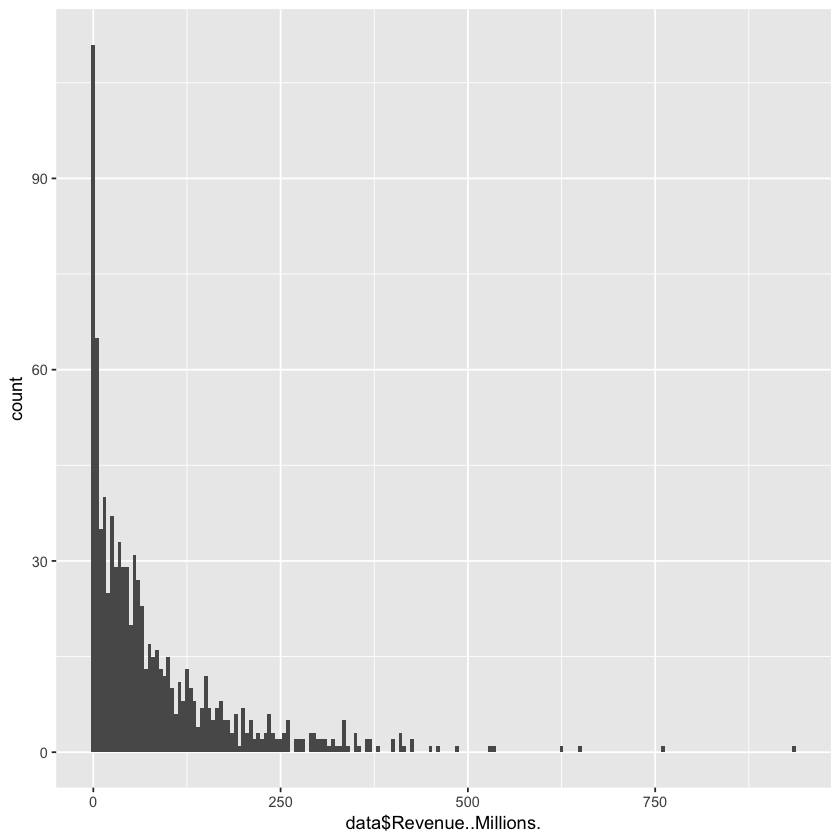

In [10]:
ggplot(data, aes(x=data$Revenue..Millions.))+ # 축그리기
    geom_histogram(binwidth=5)

## 5. Multiple Imputation (Outlier)
- 중심에서 벗어난 이상치
    - 데이터가 몰려 있는(평균)지점에서 벗어난 데이터
    
- 평균이 위험한 이유
    - 극단치에 취약(민감)하다.
    - 평균에 영향을 받지 않는 중위수를 봐야 한다.

In [6]:
summary(data$Revenue..Millions.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   13.27   47.98   82.96  113.72  936.63     128 

```Min. 1st Qu.  Median    Mean    3rd Qu.    Max.    NA's 
0.00   13.27   47.98    82.96   113.72    936.63     128 ```

- ```Median(47.98) <-> Mean(82.96)```
    - 평균이 이미 오염되어 있음
    - 오염되었다는 판단 기준은?<br>
<br>
- ```NA's : 128/1000```
    - 전체 대비 결측치 비율 : 12.8%
    - 상당한 수이므로 결측치를 (오염된) 평균으로 대체하면 안 됨<br>
<br>
- 잘못된 통계의 예
    - '직장인 월급 평균'
        - Sampling Issue(Bias)
            - 공무원 : 9, 7급 + 비정규직
            - 사기업 : 주식시장에 상장된 중견기업부터
            
        - (숨겨진)obj : 공무원 월급을 올리기 위한 여론몰이<br>
<br>
- __통계는 도구일 뿐__
    - 안에 숨어 있는 의미 파악만 해도 80%는 끝남 <br>

### 편향된 데이터 처리법
- __편향된 데이터는 Transform__ 해야한다.
    - 최대한 정규분포로 만들어야 한다.
    - 정규분포를 띄지 않는 데이터를 그대로 사용(분석)하면 문제가 생긴다.
    - 대안
        - log를 씌워주어야 한다.
        - 간격을 좁히려고!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 129 rows containing non-finite values (stat_bin).”

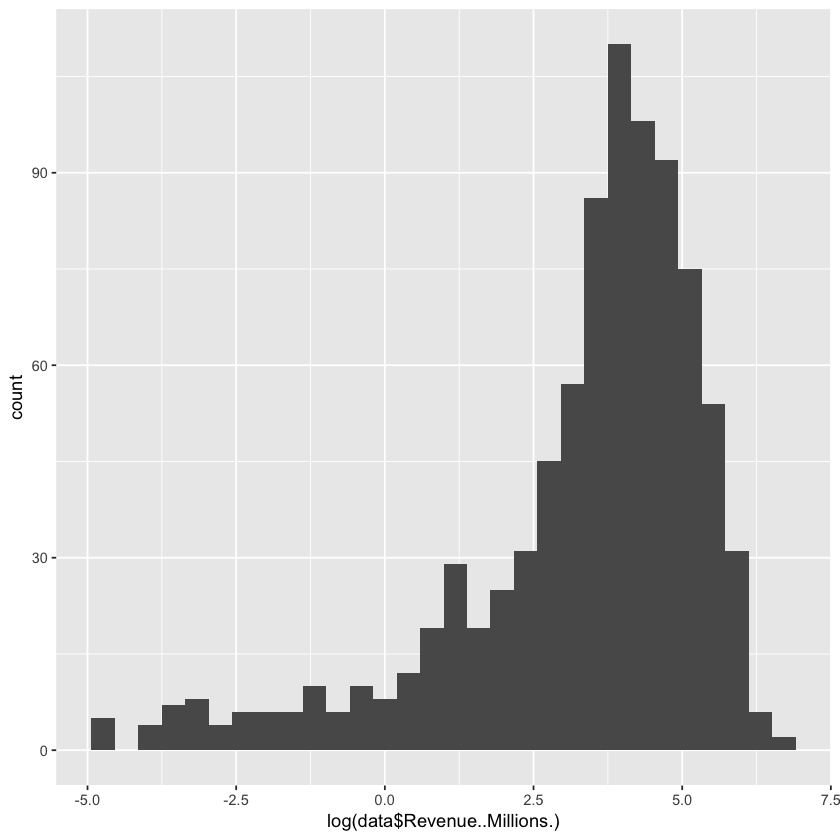

In [7]:
ggplot(data, aes(x=log(data$Revenue..Millions.)))+
    geom_histogram()

## 6. Normal Q-Q Plot
- obj
    - 데이터의 분포가 정규성을 가졌는지 파악하기 위해 qqplot을 활용 <br>
<br>
- how(정규성을 파악하는 기준)
    - 그래프를 볼 떄는 축부터 봄
        - x축 : 이론적인 분위수
            - 정규분포 이론을 따를 때
        - y축 : 표본 분위수
        - 이론이 가르키는 것이랑 샘플이 가르키는 것
    - 실제와 이론이 일치하면(정규분포를 따르면)직선으로 간다.
    - 허나 직선으로 가지 않았다. 즉, 정규분포와 다르다.


- 핵심은 정규성
    - 완벽하지 못하더라도 최대한 직선으로(정규분포로) 맞춰야 한다.
    - 즉, 분포 자체는 최대한 정규성을 가져야 한다.

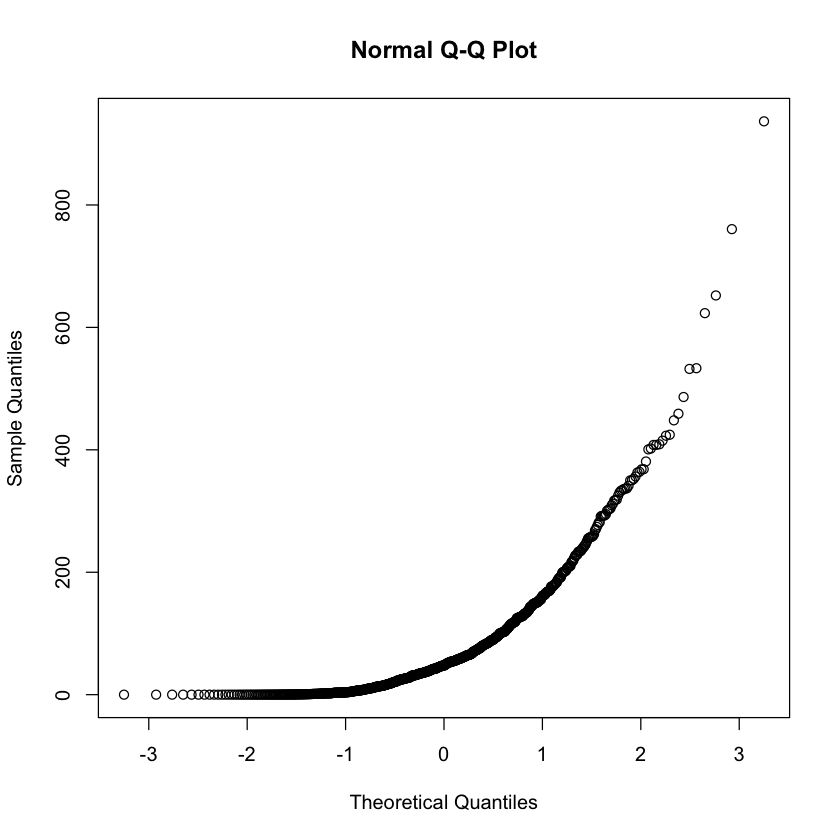

In [8]:
qqnorm(data$Revenue..Millions.)

## 7. Reshape Data 2
- 결측치(0) 처리 <br>
<br>
```Error in plot.window(...): 유한한 값들만이 'ylim'에 사용될 수 있습니다
Traceback:```<br>
<br>
- 오류가 생긴 이유
    - min.: 0
        - log 함수에 0이 못 들어간다.<br>
<br>       
- Key Point
    - 새로운 변수를 만들 때, 무조건 raw data를 건드리지 않는다.
        - 0.0001을 추가하든 0을 없애든

# Q2. 결측치 처리 어떻게 하는 게 좋을까? 가장 보통의 방법은?
# Q3. Q-Q Plot을 실제로도 쓰는지?

ERROR: Error in plot.window(...): 유한한 값들만이 'ylim'에 사용될 수 있습니다


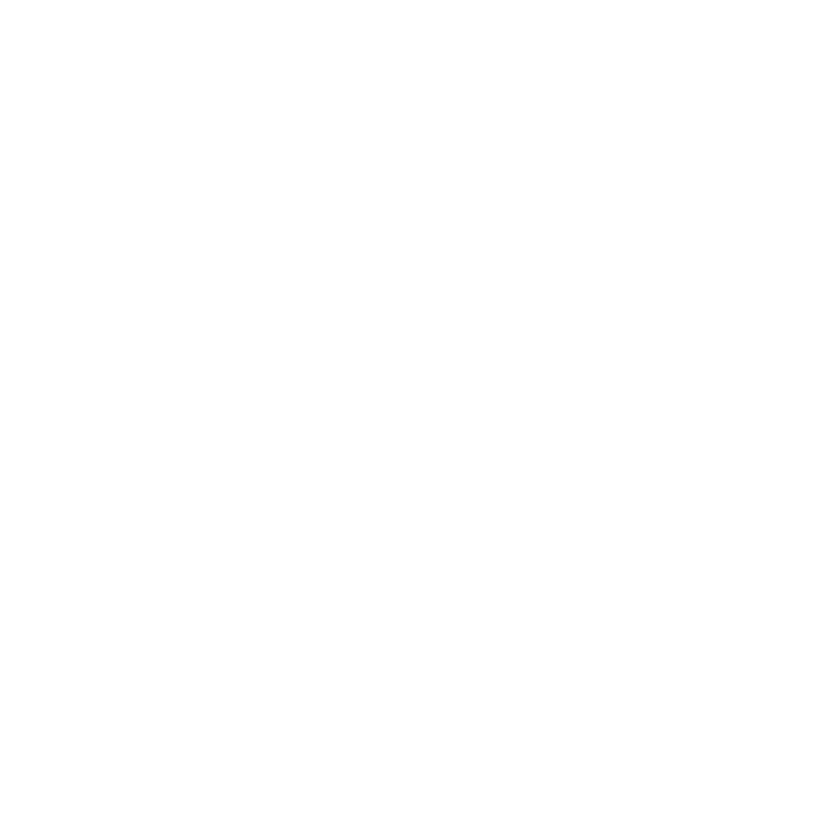

In [9]:
qqnorm(log(data$Revenue..Millions.))

In [10]:
summary(data$Revenue..Millions.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   13.27   47.98   82.96  113.72  936.63     128 

- 0의 개수 129개 ```1000 - 871 = 129```


### 7-1. Method 1 & EDA
- 0을 제외한 새로운 dataframe(data2) 생성

In [11]:
data2 = subset(data, data$Revenue..Millions. > 0)
str(data2)

'data.frame':	871 obs. of  12 variables:
 $ Rank              : int  1 2 3 4 5 6 7 9 10 11 ...
 $ Title             : Factor w/ 999 levels "(500) Days of Summer",..: 288 569 656 636 674 780 403 833 539 232 ...
 $ Genre             : Factor w/ 207 levels "Action","Action,Adventure",..: 12 86 196 93 8 8 117 3 75 81 ...
 $ Description       : Factor w/ 1000 levels "\"21\" is the fact-based story about six MIT students who were trained to become experts in card counting and s"| __truncated__,..: 111 539 881 614 221 520 135 279 241 803 ...
 $ Director          : Factor w/ 644 levels "Aamir Khan","Abdellatif Kechiche",..: 266 519 392 106 137 641 123 265 449 156 ...
 $ Actors            : Factor w/ 996 levels "Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani",..: 185 737 419 659 972 650 810 154 456 277 ...
 $ Year              : Factor w/ 11 levels "2006","2007",..: 9 7 11 11 11 11 11 11 11 11 ...
 $ Runtime..Minutes. : int  121 124 117 108 123 103 128 141 116 133 ...
 $ Rating            

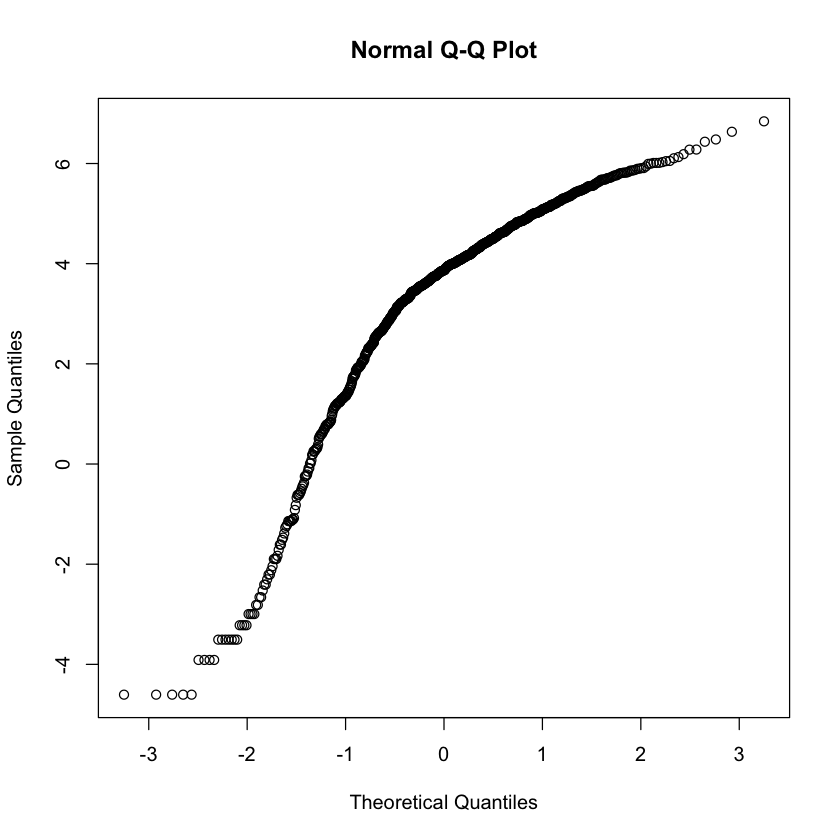

In [12]:
qqnorm(log(data2$Revenue..Millions.))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


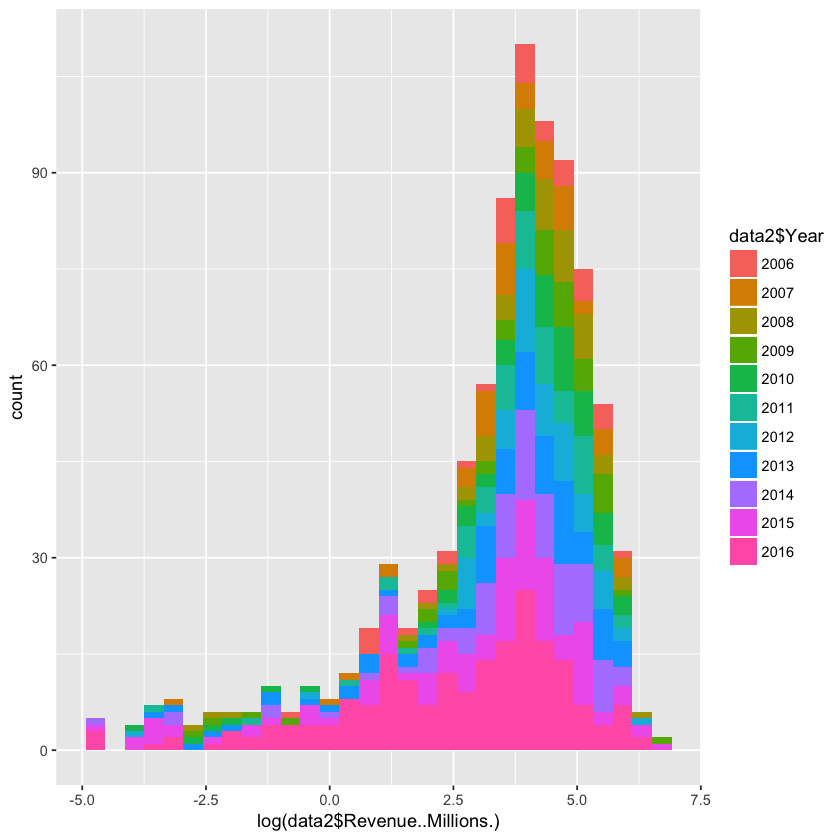

In [13]:
ggplot(data2, aes(x=log(data2$Revenue..Millions.), fill=data2$Year))+
    geom_histogram()

### 8-2 Method 2 & EDA 
- 새로운 변수(Revenue..Millions.2)에 아주 작은 값(0.0001) 추가

In [15]:
data$Revenue..Millions.2 = data$Revenue..Millions.+0.0001

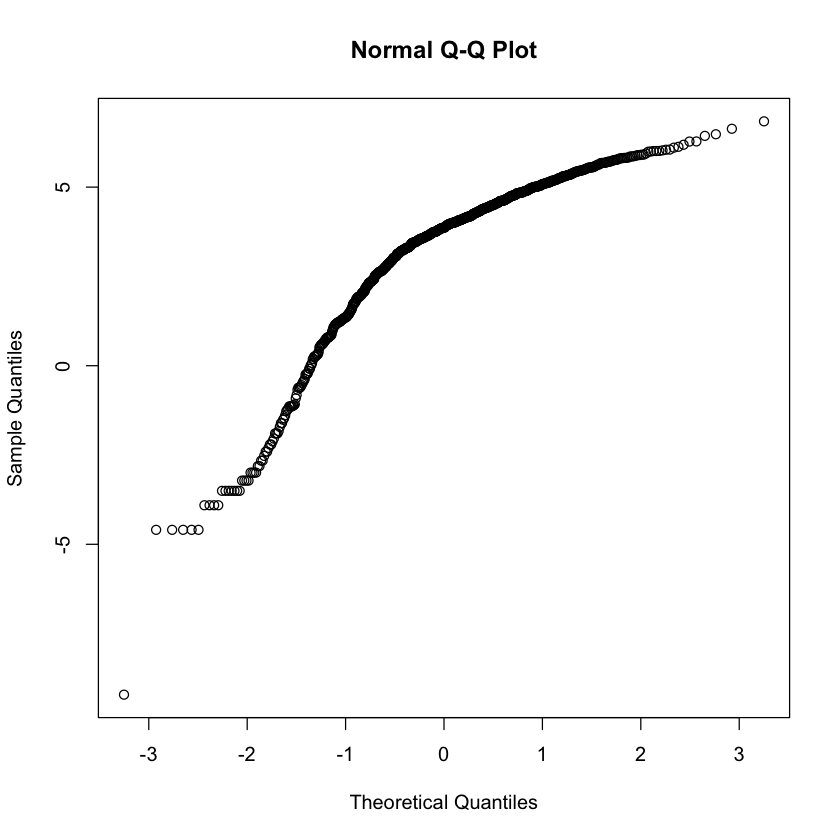

In [17]:
qqnorm(log(data$Revenue..Millions.2))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 128 rows containing non-finite values (stat_bin).”

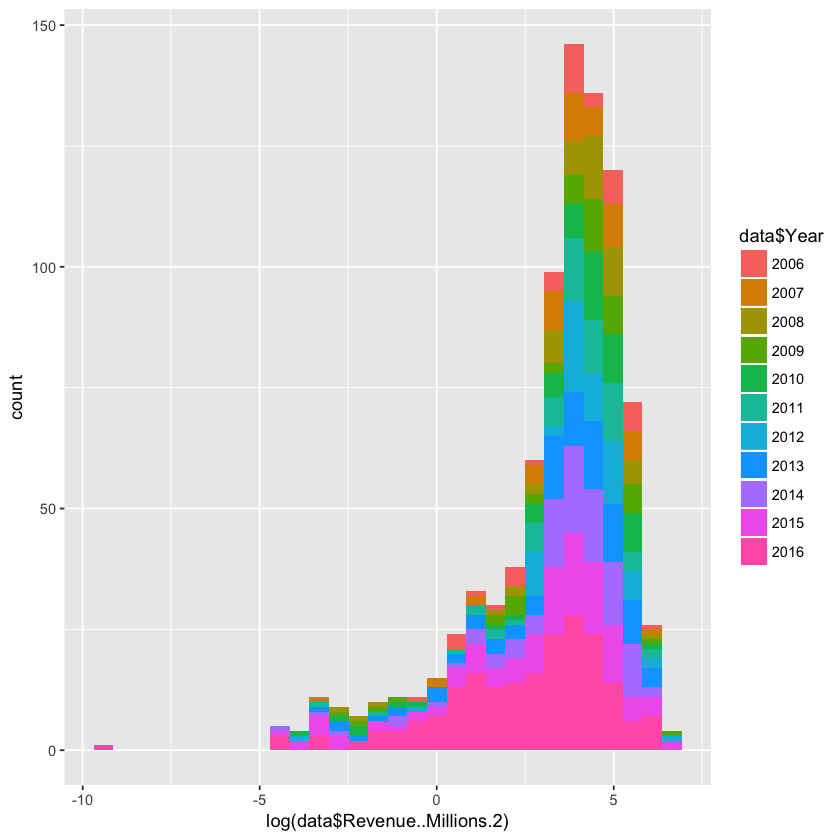

In [19]:
ggplot(data, aes(x=log(data$Revenue..Millions.2), fill=data$Year))+
    geom_histogram()

- 만족할 정도는 아니지만 아까보단 나아짐.
- 이런 식으로 하나씩 찾아가면서 다가가는 것임
    - na, 0 같은 것들이 왜 이렇게 나왔는지
    - 어떻게 접근(처리)해야하는지 고려해야 함.<br>
    <br>
    - __왜 이렇게 나왔고, 어떻게 접근함?__

## 9. Visualization

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


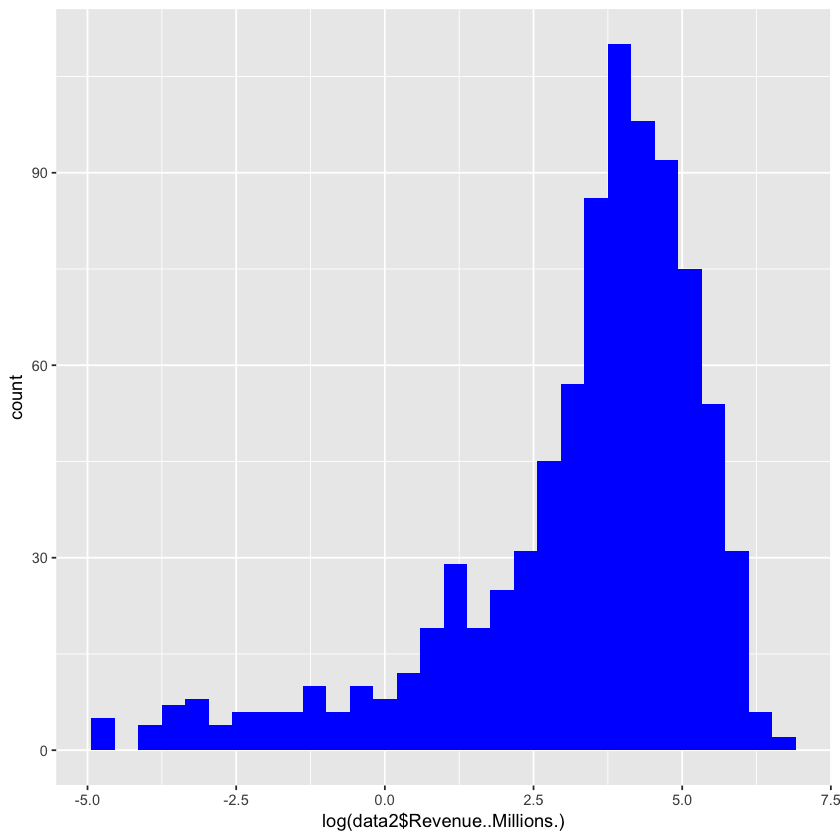

In [20]:
ggplot(data2, aes(x=log(data2$Revenue..Millions.)))+
    geom_histogram(fill='blue')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


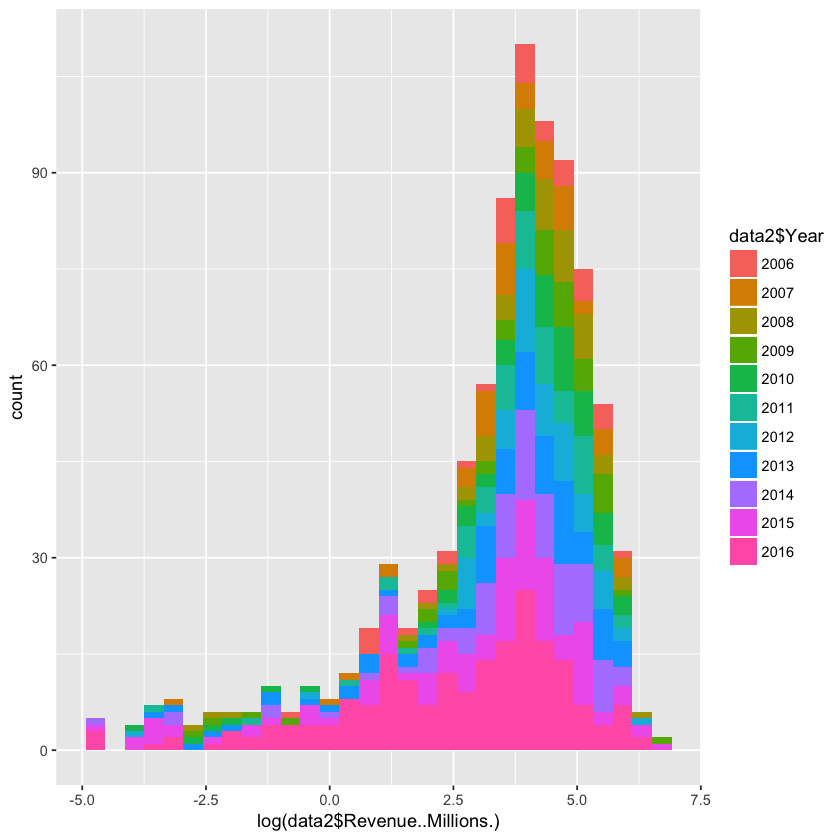

In [21]:
ggplot(data2, aes(x=log(data2$Revenue..Millions.), fill=data2$Year))+
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


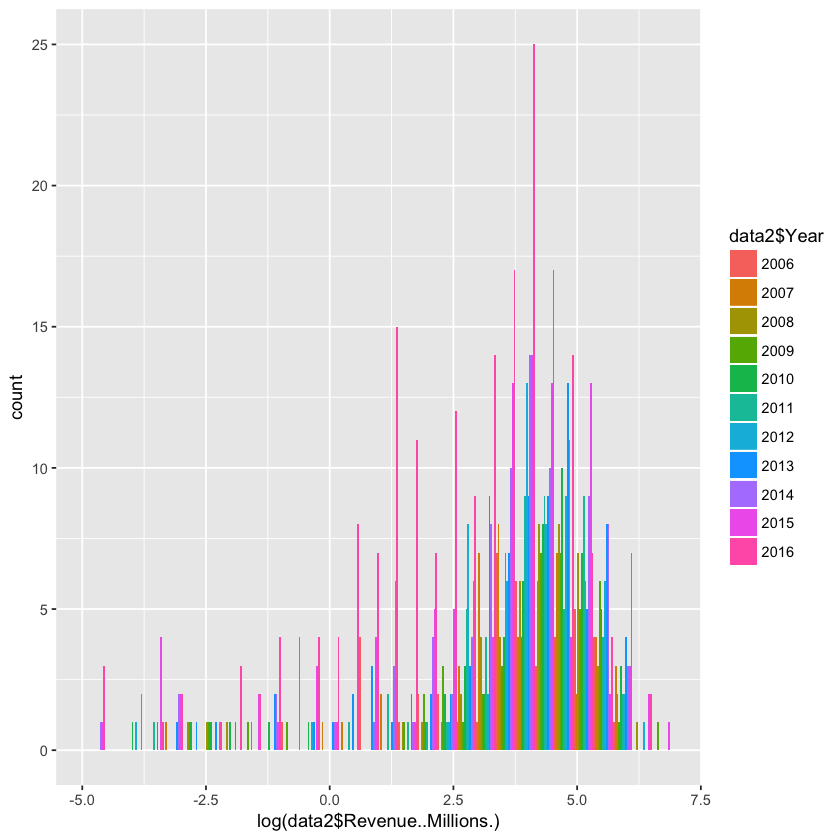

In [22]:
ggplot(data2, aes(x=log(data2$Revenue..Millions.), fill=data2$Year))+
    geom_histogram(position='dodge')

## 9-1. 시각화의 핵심
- 좋은 시각화의 기준
    - 통계를 아무 것도 모르는 사장님이 봤을 때 '오~'할 정도로 나오는 게 좋은 시각화
    - 판단 : 사람들이 잘 이해했냐

## 10. Text Mining
- Variable
    - 1) Genre
    - 2) Description <br>
    <br>
- Corpus
    - VectorSource<br>
    <br>
- DTM or TDM

### 10-1. Variable Handling 1 : Genre Data
- 12개의 변수 핸들링
    - Rank, Title은 건드릴 필요가 없음
        - 분석할 필요가 없음<br>
        <br>
    - Genre
        - textmining 필요(tm package 활용)
        - 중복 응답처리(One-hot-encoding, Bag-of-words)
            - 중복 응답 하나하나 모두 응답이 된 것으로 처리
            - Action,Adventure,Sci-Fi : 1, 1, 1 <br>
            
### 10-1-1. Reshape Data
- gsub : replace
- Corpus
- VectorSource
- DTM


In [24]:
data2$Genre2 = gsub(","," ", data2$Genre)

In [25]:
data2 %>% head()

Rank,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,Metascore,Genre2
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76,Action Adventure Sci-Fi
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65,Adventure Mystery Sci-Fi
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62,Horror Thriller
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59,Animation Comedy Family
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40,Action Adventure Fantasy
6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42,Action Adventure Fantasy


In [26]:
data2 %>% group_by(Title) %>% summarise(n=n()) %>% arrange(desc(n)) %>% head()

Title,n
The Host,2
(500) Days of Summer,1
10 Cloverfield Lane,1
10 Years,1
12 Years a Slave,1
127 Hours,1


### 10-1-2. Corpus
- Corpus : 말뭉치
    - VectorSource = Vector화
        - Corpus 함수에 들어갈 때, VectorSource로 만들어야 Corpus 함수가 이해한다.
- tm_map : Corpus 정제 함수
    - removePunctuation : 특수문자 제거
    - removeNumbers : 숫자 제거
    - tolower : 소문자 

In [27]:
corpus = Corpus(VectorSource(data2$Genre2))

corpus_genre = tm_map(corpus, removePunctuation)
corpus_genre = tm_map(corpus_genre, removeNumbers)
corpus_genre = tm_map(corpus_genre, tolower)

### 10-1-3. TDM (Term Document Matrix) 과 DTM (Documen Term Matrix)
- TDM
    - word가 row, document가 column이 된다.
- DTM
    - document가 row, word가 column이 된다. <br>
    <br>
- 행렬의 전치 차이<br>
<br>
- inspect
    - dataframe의 head와 비슷한 개념
    - matrix 형태에서는 head 대신 사용

In [28]:
dtm = DocumentTermMatrix(corpus_genre)
dtm
inspect(dtm)

<<DocumentTermMatrix (documents: 871, terms: 20)>>
Non-/sparse entries: 2275/15145
Sparsity           : 87%
Maximal term length: 9
Weighting          : term frequency (tf)

<<DocumentTermMatrix (documents: 871, terms: 20)>>
Non-/sparse entries: 2275/15145
Sparsity           : 87%
Maximal term length: 9
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs action adventure comedy crime drama fantasy horror romance scifi thriller
  1       1         1      0     0     0       0      0       0     1        0
  10      0         1      0     0     0       1      0       0     0        0
  11      0         0      0     0     1       0      0       0     0        0
  2       0         1      0     0     0       0      0       0     1        0
  4       0         0      1     0     0       0      0       0     0        0
  5       1         1      0     0     0       1      0       0     0        0
  6       1         1      0     0     0       1      0       0     0        0
  7       0         0      1     0     1       0      0       0     0        0
  8       1         1      0     0     0       0      0       0     0        0
  9    

### 10-1-4. defintion function
- convert_count
    - ifelse(x > 0, 1, 0) 
        - x가 > 0이면 1, 아니면 0 <br>
        <br>
- 분석 목적에 따라 다르다.
    - 1) 단어가 해당 문서에 많이 나오는 게 중요하냐
    - 2) 단어가 있는 게 중요하냐 없는 게 중요하냐<br>
    <br>
    - '있다/없다'가 중요하다면 0, 1 처리만 해도 되지만
    - 빈도가 중요하다면 convert_count를 하면 안 된다.<br>
    <br>
- 지금 당장은 필요 없지만 추후에 필요
    - description에 중복된 단어가 나옴
    - 해당문서에 단어가 있으면 1, 없으면 0
    - 등장했으면 1, 등장하지 않으면 0

### 10-1-5. TF-IDF
- ex) 지방 선거 기사(A, B 언론사)
    - odj: 언론사별 지방 선거 기사의 성격 파악
        - '선거/투표'라는 단어가 이 기사를 잘 대변(대표)하는 게 맞지만, 다른 언론사끼리 비교했을 때, 의미 있는 데이터가 아니다.
        - 왜냐하면 같이 등장했으니까 (H0... __TF__)
            - A, B 언론사의 기사도 '선거/투표'라는 단어가 많이 나올 것이다.
            - 두 단어가 지방선거 기사라는 걸 잘 대표하겠지만
            - 역으로 A, B 둘 끼리 비교했을 때는 의미있는 데이터가 아니다.
        - A에서 더 많이 나온 단어가 있을 것이고, B에서 더 많이 나온 단어가 있을 것이다. (H1...__IDF__)
            - 기사는 동일하겠지만 각 언론사별 논조가 다를 수 밖에 없다.
        - 모든 문서에서 많이 나오는 건 좋지만, 의미가 없어서 가중치를 달리 주는 것이다. <br>
    <br>
- __동네북 단어들의 가중치를 낮추는 것__
    - 모든 문서에서 다 나왔으면 의미가 없다.
    - 특정 문서에서만 그 단어가 많이 나와야지, 그 문서의 핵심 키워드라는 걸 알 수 있다.

<img src = "http://www.bloter.net/wp-content/uploads/2016/09/td-idf-graphic.png"><br>
<br>
- TF (빈도)
    - Term Frequency (단어 빈도)
    - '선거 / 투표'라는 키워드가 기사에서 얼마나 많이 나왔을지
    - 많이 나와서 중요한 건 맞지만<br>
    <br>
- IDF (역수)
    - 모든 Document에서 많이 나왔으면 의미가 없다.
    - 한 문서에서만 단어가 많이 나와야지 핵심 키워드다<br>
    <br>
- 추후의 분석에도 이어진다.
    - 회귀, 분산, 분류 문제 어느 것이든!<br>
    <br>
- 지금 작업의 목적은 분석을 위한 것
    - 허나 지금의 장르 데이터에 적용시킬 건 아니다.
        - 장르는 0, 1 자체가 의미가 있다.
        - 장르라는 카테고리에서 상태변수지, 그걸 중복응답을 처리하기 위해서 텍스트 마이닝을 가져온 것?
        
        
### 10-1-6. apply, convert_count, as.data.frame, cbind
- GENRE_DATA
    - ```convert_count = function(x) {
  y <- ifelse(x > 0,1,0)
  y = as.numeric(y) 
  y
}```
    -  y = x가 > 0이면 1, 아니면 0 ... numeric 형태
- margin = 2
    - ?
- as.data.frame
    - dataframe화
- cbind 
    - column bind
    - 조건 : row의 수가 같아야 함

In [29]:
convert_count = function(x) {
  y <- ifelse(x > 0,1,0)  ## x가 > 0 1, 아니면 0
  y = as.numeric(y) ## y를 numeric으로
  y
}

In [30]:
genre_data = apply(dtm, MARGIN=2, convert_count)
genre_data = as.data.frame(genre_data) # dataframe 화

data_genre = cbind(data2, genre_data) # column bind, merge ... 조건 : row의 수가 같아야 함

In [31]:
genre_data %>% head()

action,adventure,scifi,mystery,horror,thriller,animation,comedy,family,fantasy,drama,music,biography,romance,history,western,crime,war,musical,sport
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
data_genre %>% head()

Rank,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,⋯,drama,music,biography,romance,history,western,crime,war,musical,sport
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,⋯,0,0,0,0,0,0,0,0,0,0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,⋯,0,0,0,0,0,0,0,0,0,0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,⋯,0,0,0,0,0,0,0,0,0,0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,⋯,0,0,0,0,0,0,0,0,0,0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,⋯,0,0,0,0,0,0,0,0,0,0
6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,⋯,0,0,0,0,0,0,0,0,0,0


### 10-2. Variable Handling 2 : Description Data
### 10-2-1. Import Libraries

In [33]:
library(SnowballC)
library(wordcloud)
library(RColorBrewer)

Loading required package: RColorBrewer


### 10-2-2. stopwords
- 조사 전처리(and, is, or ...)
- Corpus 만들어서 쪼개면, 문법상 조사들이 많이 나오는데
- 다른 중요한 단어들의 가중치가 낮아지는 문제가 발생
- 이를 방지하기 위해 stopwords로 제거

In [34]:
corpus_desc = Corpus(VectorSource(data2$Description))

# text_corpus <- VCorpus(text_source)
# corpus <- clean_corpus(text_corpus)

corpus_desc = tm_map(corpus_desc, removePunctuation)
corpus_desc = tm_map(corpus_desc, removeNumbers)
corpus_desc = tm_map(corpus_desc, tolower)
corpus_desc = tm_map(corpus_desc, removeWords, stopwords('english')) # 조사 없애기 (and, or, is)
corpus_desc = tm_map(corpus_desc, removeWords, c(stopwords("en"), "Top200Words"))
excludes = c('the', 'this', stopwords('english'))

corpus_desc = tm_map(corpus_desc, removeWords, excludes)
corpus_desc = tm_map(corpus_desc, stemDocument)

### 10-2-3. Wordcloud

#### 품사별 색상 변경 --> konlpy

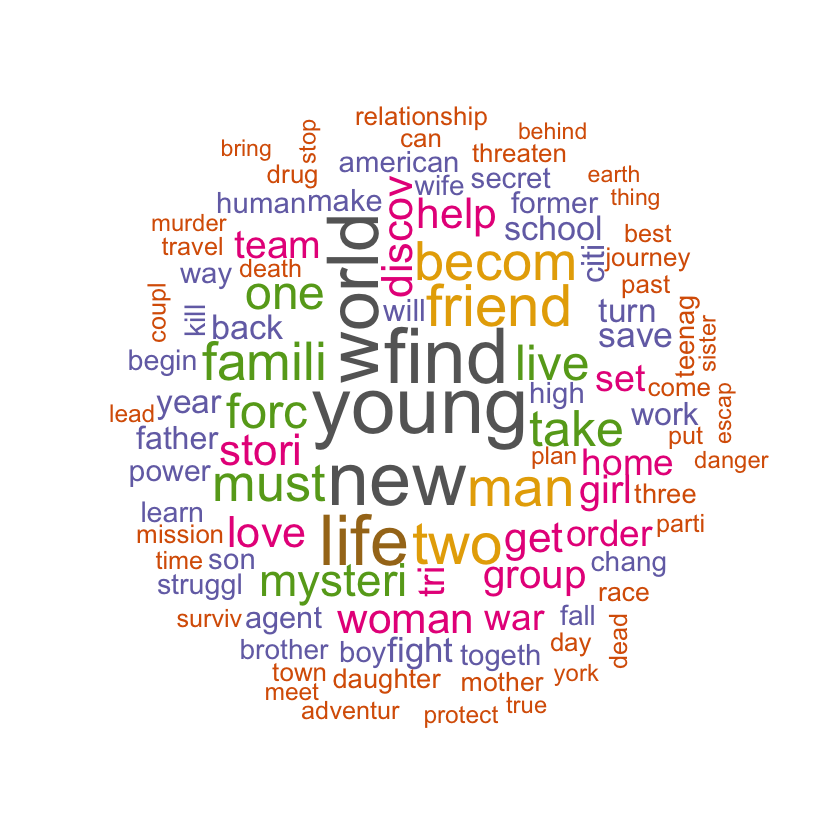

In [35]:
wordcloud(corpus_desc, max.words = 100, min.freq = 5, random.order = FALSE, rot.per = 0.1, colors = brewer.pal(8, "Dark2"))

### 10-2-4. DTM 2 - Description

In [36]:
dtm_desc = DocumentTermMatrix(corpus_desc)
dtm_desc
inspect(dtm_desc)

<<DocumentTermMatrix (documents: 871, terms: 4217)>>
Non-/sparse entries: 13555/3659452
Sparsity           : 100%
Maximal term length: 21
Weighting          : term frequency (tf)

<<DocumentTermMatrix (documents: 871, terms: 4217)>>
Non-/sparse entries: 13555/3659452
Sparsity           : 100%
Maximal term length: 21
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  becom famili find friend life man new two world young
  290     0      0    0      0    0   0   0   0     0     0
  291     1      0    1      0    0   0   0   0     0     0
  620     0      0    0      0    0   0   1   0     1     0
  649     0      1    0      0    0   0   0   0     0     0
  674     0      1    0      0    1   0   0   1     0     0
  683     0      0    0      1    0   0   1   0     1     1
  733     1      0    0      0    0   0   0   0     0     0
  756     0      1    2      0    0   0   0   0     0     0
  788     0      0    0      0    0   0   0   0     0     0
  841     0      0    1      0    0   0   0   1     0     0


# Q7. 키워드 주제에 따른 평점
# Q8. 나이브베이즈
- 확률론, 조건부확률

### 10-2-5. LDA (Latent  Dirichlet Allocation)
- Topic Modeling
    - Crawling
    - Law
        - 남자 : 여자 = 왕 : ?
        - ex) '이혼'
            - 일상용어 : 이혼
            - 법률용어 : 
        - Text Mining
            - 자연어처리
                - 난이도 : 최정점
                - 기본조건
                    - 이해하려면 언어학, 문화를 이해해야한다.
                    - 파생되는 표현, 어휘가 많은데 학습시키기 힘들다.
                    - 그리고 ML, 통계학, Deep Learning(Word 2 vec), 인공지능을 알아야 한다.
                - 용량이 너무 커서, 계산 속도가 답이 안 나온다.
                    - 법률 8만 개, ram 80gb... 서버 없으면 X
                - 결론적으로 답이 없다.
                - 3중고
                
- - -

- 키워드 특정 주제에 따른 평점
- 일반 변수로 활용
- 저런 주제를 가지면 망한다(나이브베이즈).

# Q9. 특정영화 혹은 특정 장르에 대한 단어 출현 빈도를 네트워크 그래프로 그리려면?

## 11. Variable Handling 3 : Director
    - 기준을 movie(title)대신 director로 변경
    - 감독 평가 모형
        - 감독 평가에 써도 되고,
        - 영화 Rawdata에 써도 된다.
        - 나아갈 수 있는 방향은 무궁무진하다.
- - -
### 11-1. Reshape Data (count)
- count라는 변수를 생성
    - 영화를 몇개 만들었는지 count 하기 위해서<br>
<br>
- 영화사에서 감독 뽑을 때의 기준
    - 흥행 성적 (돈?, 관람객?, 평점?)
        - 일단 돈을 잘 벌어야 한다.
            - 많이 찍어서 매출이 높은 감독
            - 적게 만들었는데 대박나는 감독
            - 양치기하는 감독을 걸러내기 위해서 만드는 변수

In [37]:
data_genre$count=1

### 11-2-1. Method 1 (dplyr)

In [38]:
# # director <- data_genre %>%
# data_genre %>%
#             group_by(data_genre$Director) %>%
#             summarise(sum_action = sum(data_genre$action)
#                       , sum_comedy = sum(data_genre$comedy)
#                       , sum_thriller = sum(data_genre$thriller)
#                       , mean_rating = mean(data_genre$Rating)
#                       , count = sum(data_genre$count)
#                       , n = n()
#                       , sum_revenue = sum(data_genre$Revenue..Millions.)
#                       , mean_revenue = mean(data_genre$Revenue..Millions.)
#                      ) %>% head()

In [39]:
DIRECTOR_1 <- data_genre %>%
                group_by(Director) %>%
                summarise(sum_action = sum(action)
                          , mean_rating = mean(Rating)
                          , count = sum(count)
                          , n = n()
                          , sum_revenue = sum(Revenue..Millions.)
                          , mean_revenue = mean(Revenue..Millions.))

In [40]:
str(DIRECTOR_1)
DIRECTOR_1 %>% head()

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	539 obs. of  7 variables:
 $ Director    : Factor w/ 644 levels "Aamir Khan","Abdellatif Kechiche",..: 1 2 4 5 6 10 11 12 13 14 ...
 $ sum_action  : num  0 0 2 0 0 0 2 1 0 0 ...
 $ mean_rating : num  8.5 7.8 7 6.3 5.9 ...
 $ count       : num  1 1 4 2 2 1 2 1 1 3 ...
 $ n           : int  1 1 4 2 2 1 2 1 1 3 ...
 $ sum_revenue : num  1.2 2.2 438.1 157.3 21.1 ...
 $ mean_revenue: num  1.2 2.2 109.5 78.7 10.5 ...


Director,sum_action,mean_rating,count,n,sum_revenue,mean_revenue
Aamir Khan,0,8.5,1,1,1.20,1.200
Abdellatif Kechiche,0,7.8,1,1,2.20,2.200
Adam McKay,2,7.0,4,4,438.14,109.535
Adam Shankman,0,6.3,2,2,157.33,78.665
Adam Wingard,0,5.9,2,2,21.07,10.535
Akiva Schaffer,0,6.7,1,1,9.39,9.390


In [41]:
# # director <- data_genre %>%
# data_genre %>%
#             group_by(data_genre$Director) %>%
#             summarise(sum_action = sum(action)
#                       , sum_comedy = sum(comedy)
#                       , sum_thriller = sum(thriller)
#                       , mean_rating = mean(ating)
#                       , count = sum(count)
#                       , n = n()
#                       , sum_revenue = sum(Revenue..Millions.)
#                       , mean_revenue = mean(Revenue..Millions.)
#                      ) %>% head()

In [42]:
# DIRECTOR=ddply(DATA_GENRE,.(Director),summarise,
#                SUM_ACTION=sum(action),Mean_Rating=mean(Rating),COUNT=sum(count),
#                SUM_REVENUE=sum(Revenue..Millions.))

### 11-2-2. Method 2 (ddply)

In [43]:
library(plyr)

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following object is masked from ‘package:purrr’:

    compact

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



In [44]:
DIRECTOR_2 = ddply(data_genre,.(Director),summarise,
               SUM_ACTION=sum(action),Mean_Rating=mean(Rating),COUNT=sum(count),
               SUM_REVENUE=sum(Revenue..Millions.))

In [45]:
DIRECTOR_2 %>% head()

Director,SUM_ACTION,Mean_Rating,COUNT,SUM_REVENUE
Aamir Khan,0,8.5,1,1.20
Abdellatif Kechiche,0,7.8,1,2.20
Adam McKay,2,7.0,4,438.14
Adam Shankman,0,6.3,2,157.33
Adam Wingard,0,5.9,2,21.07
Akiva Schaffer,0,6.7,1,9.39


### 11-3. Random Sampling
    - 비복원추출
        - 중복 제거 추출
        
    - 복원추출 
        - 중복 포함 추출 (bagging할 때, 데이터를 뿔리는 작업)
        - 애초에 Over sampling이다
            - 똑같은 게 나오면 데이터가 편향이 된다.
            
        - 차라리 Undersampling을 하고 EDA를 진행하며 의미 있는 변수를 찾는 것이 낫다.

In [46]:
# set.seed(1234)
# SL = sample(1:nrow(data2), 200, replace=FALSE) # nrow = length, 1~1000 중에서 200개를 비복원추출
# SL

# SL_DATA = data2[SL, ] # SL 행의 모든 열 추출
# SL_DATA

#### 현실과 타협

### 11-4. Visualization

### 11-4-1. Visualization 1
- direct : sum_revenue & Count
    - 감독별 총 수익

In [47]:
DIRECTOR_1 %>% head()

Director,sum_action,mean_rating,count,n,sum_revenue,mean_revenue
Aamir Khan,0,8.5,1,1,1.20,1.200
Abdellatif Kechiche,0,7.8,1,1,2.20,2.200
Adam McKay,2,7.0,4,4,438.14,109.535
Adam Shankman,0,6.3,2,2,157.33,78.665
Adam Wingard,0,5.9,2,2,21.07,10.535
Akiva Schaffer,0,6.7,1,1,9.39,9.390


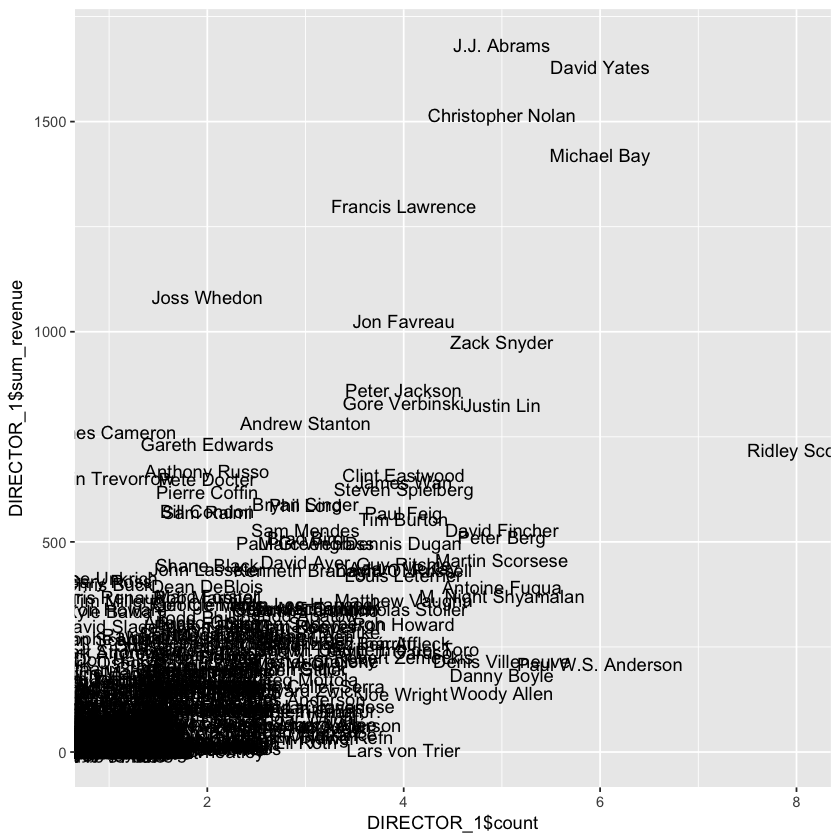

In [48]:
library(ggplot2)

ggplot(DIRECTOR_1,aes(x=DIRECTOR_1$count,y=DIRECTOR_1$sum_revenue))+
  geom_text(aes(label=Director))

### 11-4-2. Visualization 2
- mean_revenue
    - 감독별 평균 수익

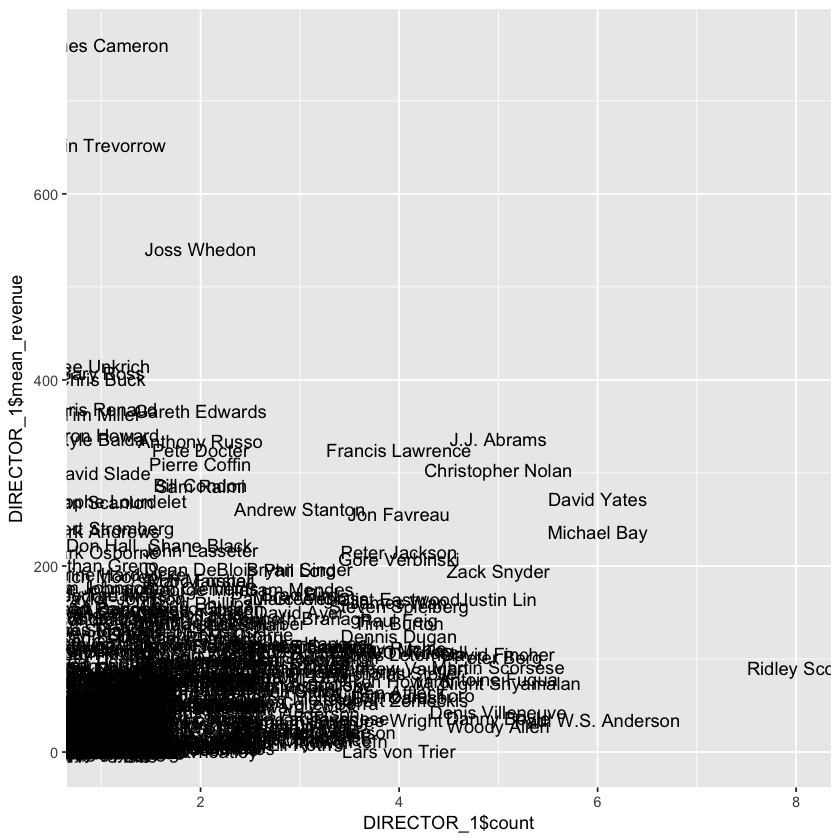

In [49]:
library(ggplot2)

ggplot(DIRECTOR_1,aes(x=DIRECTOR_1$count,y=DIRECTOR_1$mean_revenue))+
  geom_text(aes(label=Director))

# Q10. 차원축소방법

- 여기까지 핸들링
    - 정확한 핸들링을 위해 통계가 필요 <br>
    <br>
- 장르가 너무 많다 (20개).
    - 변수 1개 = 차원 1개
    - 통계의 목적은 차원을 줄이는 것
    - 두드러진(유의미한) 장르를 뽑고, 차이가 없는 건 묶어준다(grouping)

### 11-4-3. Visualization 3
- Votes 별 평균 수익금액

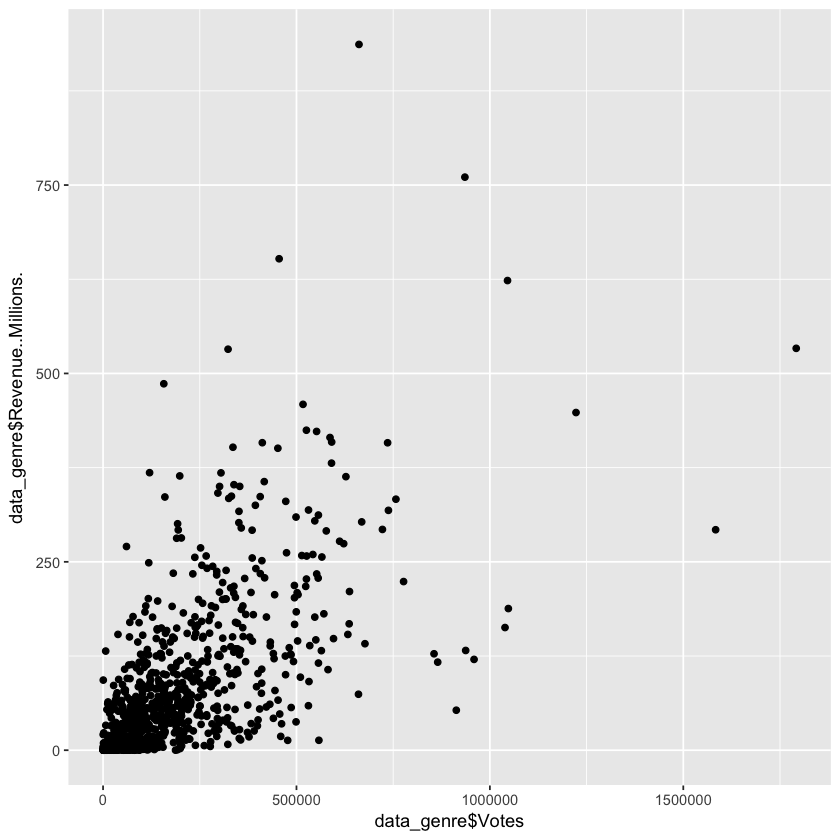

In [50]:
ggplot(data_genre, aes(x=data_genre$Votes, y=data_genre$Revenue..Millions.))+
  geom_point()

### 11-4-4. Visualization 4
- 장르별 수익금액

In [51]:
str(genre_data)

'data.frame':	871 obs. of  20 variables:
 $ action   : num  1 0 0 0 1 1 0 1 0 0 ...
 $ adventure: num  1 1 0 0 1 1 0 1 1 1 ...
 $ scifi    : num  1 1 0 0 0 0 0 0 0 0 ...
 $ mystery  : num  0 1 0 0 0 0 0 0 0 0 ...
 $ horror   : num  0 0 1 0 0 0 0 0 0 0 ...
 $ thriller : num  0 0 1 0 0 0 0 0 0 0 ...
 $ animation: num  0 0 0 1 0 0 0 0 0 0 ...
 $ comedy   : num  0 0 0 1 0 0 1 0 0 0 ...
 $ family   : num  0 0 0 1 0 0 0 0 0 1 ...
 $ fantasy  : num  0 0 0 0 1 1 0 0 0 1 ...
 $ drama    : num  0 0 0 0 0 0 1 0 1 0 ...
 $ music    : num  0 0 0 0 0 0 1 0 0 0 ...
 $ biography: num  0 0 0 0 0 0 0 1 0 0 ...
 $ romance  : num  0 0 0 0 0 0 0 0 1 0 ...
 $ history  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ western  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ crime    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ war      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ musical  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sport    : num  0 0 0 0 0 0 0 0 0 0 ...


In [52]:
# GENRE <- genre_data %>%
# #                 group_by(genre_data[15:34]) %>%
#                 group_by(genre_data) %>%
#                 summarise(sum_action = sum(action)
# #                        , sum_drama = sum(drama)
#                          , mean_rating = mean(Rating)
#                          , count = sum(count)
#                          , n = n()
#                          , sum_revenue = sum(Revenue..Millions.)
#                          , mean_revenue = mean(Revenue..Millions.))

In [53]:
# ggplot(DATA_GENRE, aes(x = DATA_GENRE$Revenue..Millions., y=DATA_GENRE$Genre))+
#     geom_point()

# Q11. Library설명
- tidyverse
- corrr
- bindrcpp
- ggraph
- igraph

### 11-4-5. Visualization 5 (Network Graph)
- 일반적인 DataFrame
    - Row와 Column으로 된 Matrix 구조
    - X축, Y축으로 그래프를 그린다. <br>
    <br>
- Network Graph
    - 노드 형식의 데이터
        - Network Graph는 일반적인 dataframe로는 못 그린다.
        - Data를 노드형식으로 만들어야 한다.
    - obj
        - Rank 순으로 중심 Node가 결정
            - 중심을 기준으로 연결되는 Node들을 그려주는 게 Network Graph <br>
            <br>
        - 가중치의 기준 (Node를 뭘로 표현할까?)
            - 1) Co-occurrnce
                - 동시발생
                - TF와 비슷한 개념
                    - 스팸 메일 분류기처럼, 어떤 단어가 나오면 문맥상 특정 단어가 나올 확률이 높다(조건부확률).
                    - spam : 놀이터, 먹튀, 안전 이런 식으로 연결...
                    - not spam : 회의, 00시, 어디서... 이런 식으로<br>
                    <br>
                - 동시 발생한 단어들을 기준으로 묶임
                    - 의료라는 단어가 등장했을 때, 진료라는 단어가 같이 몇 번 등장했느냐?
                    - 영화 장르 Action이 발생되었을 때, 동시에 발생되는 것이 무엇인지 count해서 보여주는 것<br>
                - 한 주제에 같이 있는 단어들의 값이 높게 나올 것임
                - 그런 것들이 굵은 노드로 근처에 뭉쳐있는 것 <br>
                <br>
            - 2) Correlation
                - 상관계수
                    - 하나의 키워드가 다른 키워드와 얼마나 상관이 있는지 알아보는 것?
                <br>
            <br>
        - 가중치에 따라 선의 굵기와 색상의 진하기가 결정됨 <br>
        <br>
        - (같이 등장하면 올라간다는) 목적은 같지만 변수 척도에 따라 방법이 달라짐
            - 순서형 척도(Discrete)
                - Co-occurrence <br>
                <br>
            - 연속형 척도 (Continuous)
                - Correlation <br>
            <br>
    - 주제별로 나타내고 싶으면 Network Graph를 쓰면 됨
        - 장점
            - 시각화의 차원을 높게할 수 있음
            - 보통의 그래프는 feature를 3~4개 되면 포화되어서 넣을 곳이 없는데, Network는 모든 Column이 들어감
            - 계산이 오래 걸리기는 하지만 효과는 좋음

In [54]:
library(tidyverse)
library(corrr)
library(bindrcpp)
library(ggraph)
library(igraph)

In [55]:
tidy_cors = genre_data %>%
  correlate()%>%
  stretch()

tidy_cors

x,y,r
action,action,NA
action,adventure,0.378774738
action,scifi,0.256715709
action,mystery,-0.106737677
action,horror,-0.115082712
action,thriller,-0.005864433
action,animation,-0.058785640
action,comedy,-0.218839388
action,family,-0.107052090
action,fantasy,0.066993735


In [56]:
graph_cors=tidy_cors %>%
  filter(abs(r)> 0.001) %>%
  graph_from_data_frame(directed=FALSE)
graph_cors

IGRAPH 647e741 UN-- 20 378 -- 
+ attr: name (v/c), r (e/n)
+ edges from 647e741 (vertex names):
 [1] action   --adventure action   --scifi     action   --mystery  
 [4] action   --horror    action   --thriller  action   --animation
 [7] action   --comedy    action   --family    action   --fantasy  
[10] action   --drama     action   --music     action   --biography
[13] action   --romance   action   --history   action   --western  
[16] action   --crime     action   --war       action   --musical  
[19] action   --sport     action   --adventure adventure--scifi    
[22] adventure--mystery   adventure--horror    adventure--thriller 
+ ... omitted several edges

## 11-4-5-1. Correlation

Using `nicely` as default layout


ERROR: Error in scale_edge_colour_gradientn(limits = c(-0.2, 0.3), colors = c("red", : 이항연산자에 수치가 아닌 인수입니다


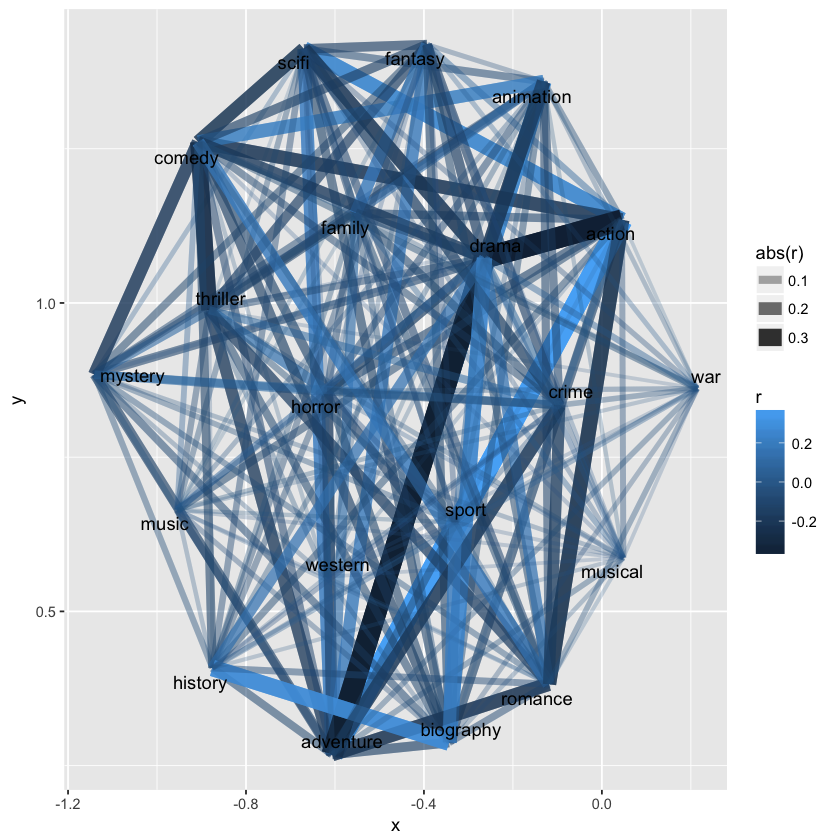

In [57]:
ggraph(graph_cors)+
  geom_edge_link(aes(edge_alpha=abs(r),edge_width=abs(r),color=r))+
  geom_node_text(aes(label = name), repel = TRUE)
  scale_edge_colour_gradientn(limits = c(-0.2, 0.3), colors = c("red", "dodgerblue2"))+
  geom_node_point()

# Q13. Co-Occurence Graph
## 11-4-5-2. Co-Occurrence

## 11-5. Alternative Data Analysis
- 대박, 쪽박 영화
    - 상위 10% 하위 10% <br>
    <br>
- quantile 함수
    - 영화 별 장르가 여러 개인데, 그중에 핵심 장르 하나만 선택해서 확인

In [58]:
FG=c()

for (i in 1:nrow(data_genre)){
  FG[i]=unlist(strsplit(as.character(data_genre$Genre[i]), ","))[1]
}

FG

data_genre$FIRST_GENRE=FG

[1] "Action"    "Adventure" "Horror"    "Animation" "Action"    "Action"   
  [7] "Comedy"    "Action"    "Adventure" "Adventure" "Biography" "Action"   
 [13] "Animation" "Action"    "Animation" "Biography" "Action"    "Biography"
 [19] "Drama"     "Adventure" "Drama"     "Animation" "Action"    "Action"   
 [25] "Horror"    "Comedy"    "Action"    "Comedy"    "Drama"     "Action"   
 [31] "Action"    "Action"    "Action"    "Adventure" "Action"    "Action"   
 [37] "Animation" "Drama"     "Biography" "Drama"     "Action"    "Drama"    
 [43] "Action"    "Action"    "Action"    "Comedy"    "Action"    "Action"   
 [49] "Adventure" "Crime"     "Drama"     "Comedy"    "Biography" "Action"   
 [55] "Crime"     "Drama"     "Drama"     "Action"    "Drama"     "Action"   
 [61] "Drama"     "Action"    "Action"    "Drama"     "Drama"     "Animation"
 [67] "Action"    "Action"    "Adventure" "Action"    "Action"    "Action"   
 [73] "Comedy"    "Biography" "Crime"     "Action"    "Action"    "Crime"    
 [79] "Action"    "Crime"     "Action"    "Crime"     "Action"    "Drama"    
 [85] "Comedy"    "Action"    "Action"    "Animation" "Horror"    "Drama"    
 [91] "Crime"     "Biography" "Action"    "Adventure" "Action"    "Crime"    
 [97] "Comedy"    "Action"    "Drama"     "Action"    "Biography" "Action"   
[103] "Adventure" "Comedy"    "Horror"    "Action"    "Drama"     "Animation"
[109] "Adventure" "Adventure" "Adventure" "Action"    "Adventure" "Action"   
[115] "Adventure" "Comedy"    "Adventure" "Drama"     "Adventure" "Drama"    
[121] "Drama"     "Action"    "Crime"     "Crime"     "Drama"     "Mystery"  
[127] "Action"    "Comedy"    "Biography" "Drama"     "Drama"     "Drama"    
[133] "Comedy"    "Action"    "Comedy"    "Action"    "Adventure" "Adventure"
[139] "Drama"     "Action"    "Action"    "Action"    "Comedy"    "Action"   
[145] "Action"    "Action"    "Action"    "Action"    "Action"    "Drama"    
[151] "Action"    "Biography" "Action"    "Action"    "Crime"     "Animation"
[157] "Drama"     "Animation" "Action"    "Action"    "Action"    "Horror"   
[163] "Action"    "Comedy"    "Horror"    "Drama"     "Drama"     "Drama"    
[169] "Drama"     "Crime"     "Comedy"    "Drama"     "Crime"     "Horror"   
[175] "Action"    "Action"    "Adventure" "Biography" "Action"    "Action"   
[181] "Drama"     "Biography" "Action"    "Action"    "Action"    "Drama"    
[187] "Comedy"    "Comedy"    "Action"    "Drama"     "Action"    "Action"   
[193] "Action"    "Action"    "Action"    "Action"    "Action"    "Animation"
[199] "Horror"    "Crime"     "Comedy"    "Drama"     "Comedy"    "Action"   
[205] "Action"    "Drama"     "Action"    "Action"    "Action"    "Drama"    
[211] "Biography" "Drama"     "Adventure" "Action"    "Action"    "Animation"
[217] "Animation" "Action"    "Adventure" "Drama"     "Drama"     "Comedy"   
[223] "Action"    "Biography" "Comedy"    "Drama"     "Biography" "Action"   
[229] "Horror"    "Comedy"    "Action"    "Action"    "Horror"    "Drama"    
[235] "Comedy"    "Drama"     "Comedy"    "Drama"     "Action"    "Drama"    
[241] "Comedy"    "Drama"     "Action"    "Action"    "Adventure" "Action"   
[247] "Comedy"    "Action"    "Action"    "Crime"     "Comedy"    "Action"   
[253] "Crime"     "Action"    "Biography" "Action"    "Action"    "Action"   
[259] "Action"    "Action"    "Action"    "Comedy"    "Comedy"    "Action"   
[265] "Drama"     "Animation" "Comedy"    "Biography" "Drama"     "Action"   
[271] "Action"    "Horror"    "Comedy"    "Comedy"    "Comedy"    "Adventure"
[277] "Action"    "Comedy"    "Biography" "Drama"     "Drama"     "Adventure"
[283] "Adventure" "Action"    "Action"    "Comedy"    "Action"    "Crime"    
[289] "Drama"     "Action"    "Action"    "Biography" "Action"    "Drama"    
[295] "Biography" "Crime"     "Crime"     "Animation" "Action"    "Biography"
[301] "Biography" "Action"    "Comedy"    "Drama"     "Comedy"    "Action"   
[307] "Action"    "Actio

In [59]:
data_genre %>% head()

Rank,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,⋯,biography,romance,history,western,crime,war,musical,sport,count,FIRST_GENRE
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,⋯,0,0,0,0,0,0,0,0,1,Action
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,⋯,0,0,0,0,0,0,0,0,1,Adventure
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,⋯,0,0,0,0,0,0,0,0,1,Horror
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,⋯,0,0,0,0,0,0,0,0,1,Animation
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,⋯,0,0,0,0,0,0,0,0,1,Action
6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,⋯,0,0,0,0,0,0,0,0,1,Action


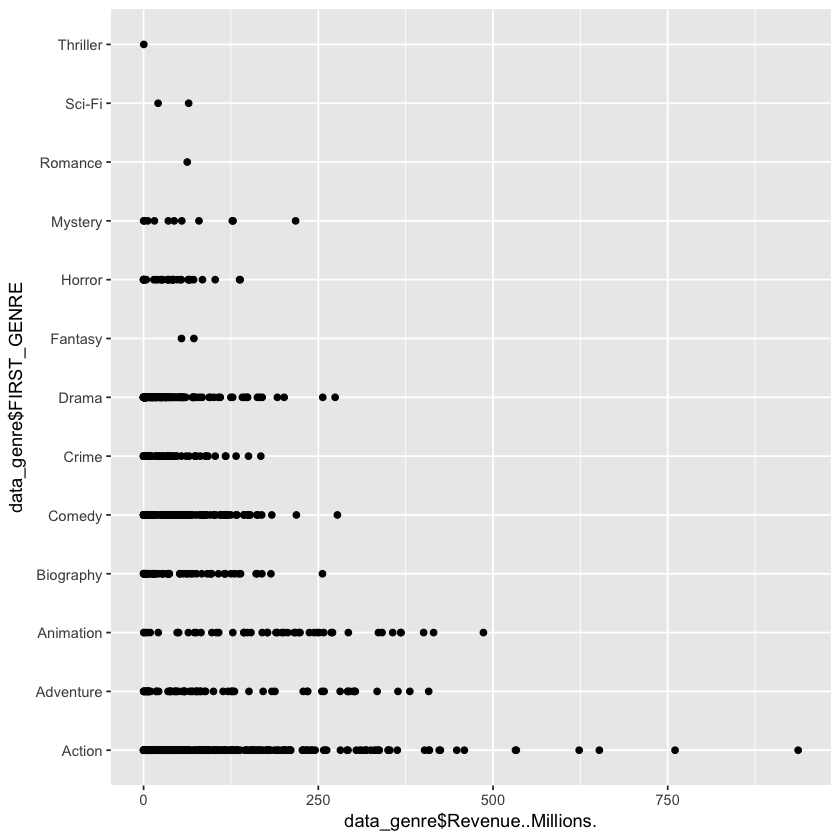

In [60]:
ggplot(data_genre, aes(x = data_genre$Revenue..Millions., y=data_genre$FIRST_GENRE))+
    geom_point()

In [61]:
## quantile ?
## probs = 확률(분위수 몇%를 보겠느냐). 하위 10%를 보고 싶다면 0.1, 상위 10%를 보고 싶다면 0.9 입력
## 분위수 몇 %의 값을 보겠느냐? 하위 10%, 하위 90%
quantile(data_genre$Revenue..Millions., probs=c(0.1, 0.9))

10%    90% 
  1.48 209.81

In [61]:
## subset?
data3 = subset(data_genre, data_genre$Revenue..Millions. < 1.4801 |  data_genre$Revenue..Millions. > 209.8101)

In [62]:
data3$score = ifelse(data3$Revenue..Millions. < 1.4801, "F", "S")

In [63]:
data3$score = as.factor(data3$score)

In [64]:
data3 %>% filter(data3$FIRST_GENRE == 'Drama', data3$score == "S")

Rank,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,⋯,romance,history,western,crime,war,musical,sport,count,FIRST_GENRE,score
496,I Am Legend,"Drama,Horror,Sci-Fi","Years after a plague kills most of humanity and transforms the rest into monsters, the sole survivor in New York City struggles valiantly to find a cure.",Francis Lawrence,"Will Smith, Alice Braga, Charlie Tahan, Salli Richardson-Whitfield",2007,101,7.2,565721,⋯,0,0,0,0,0,0,0,1,Drama,S
510,Gravity,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after an accident which leaves them alone in space.,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Orto Ignatiussen",2013,91,7.8,622089,⋯,0,0,0,0,0,0,0,1,Drama,S


- 이상치
    - 이상치라고 무조건 제거할 필요가 없다.
    - 대부분의 영화가 실패했기 때문에...
    - obj : 흥행
        - 이런 경우는 분석 목적이 다르다.
        - 통계적 분석보다는 데이터 필터링을 하는 것!<br>
        <br>
- 일반적인 건 관심 X
    - 특이사항 발생하는 경우, 현황 파악에 관심이 있다.        

## 12. 차이를 보는 분석
## 12-1.  유의한 장르를 찾는 과정(EDA)
- 20개의 장르, 장르별 차이가 존재하는가?
    - 장르들이 전부 유의할까?
        - 기준
            - 장르별 관람객 수
            - 장르별 영화 수익
            - 기타 등등<br>
        <br>
    - 모든 장르를 볼 필요가 없다.
        - 예를 들어, 수익이 되게 높은 장르가 있을 거고 낮은 장르가 있을 것이다.
        - 비슷한 애들끼리 묶어주면 된다.<br>
        <br>
    - 통계적 검정
        - H0 : 장르별 차이가 나지 않는다.
        - H1 : 장르별 (관람객 or 수익)차이가 나느냐?<br>
<br>
    - 시각화로 차이가 있는지 확인
        - action <-> no_action<br>
<br>
        - 통계적으로 검정
            - 귀무가설 : 액션과 비액션의 수익 차이가 없다
            - 대립가설 : 차이가 있다<br>
<br>
    - 여기까지가 핸들링
        - 여기서부터 통계분석 시작
        - 통계분석을 정확하게 하기 위해서 핸들링을 하는 것<br>
<br>
- 어떤 장르가 유의하고, 유의하지 않을지 찾는 것
    - 20개나 되는 장르를 다 데리고 갈 필요가 없다.
        - 20차원(변수 1개가 1차원)<br>
        <br>
    - 통계의 목적은 차원을 축소하는 것이다.(변수 줄이기)
        - 여기에서 두드러진 장르만 데리고 가면 된다.
        - 나머지는 다 퉁치고(grouping)...<br>
<br>
- 차이를 보는 분석    
    - 통계는 판도라의 상자
        - 더 자세히 파는... 하늘로 가는 게 아니라 땅굴파는 것.
        - 모르면 속 편할 때가 있다.
        - 그래서 현실과 타협하는 게 중요하다?<br>

## 12-2. 영화의 성공 기준은 무엇인가?
- 다양한 성공 기준들
    - 관람객(votes) ?
    - 평점(rating, metascore) ?
    - 수익(revenue) ?
    - 투자대비 ?
        - 관람객이 많아도 투자비가 많았으면 성공이라고 보기 어려울 수 있다.<br>
        <br>
- 가장 중요한 건, __필드에서 핵심으로 여기는 지표를 설정하는 것__이다.
    - __어떤 변수가 중요한지 필드에 대한 이해__가 필요하다.<br>
<br>
- obj : 어떤 영화들이 흥행에 성공했느냐?
    - 기준
        - 돈
        - 관람객 수 <br>
        <br>
    - ggplot 시각화
        - votes(x축) & revenue_millions(y축)
        - 관람객과 수익의 상관관계를 파악
            - 증가하는 추세는 있다.
            - 일반화하기 힘들다.
            - votes가 늘어났는데 수익이 늘어나지 않는 영화도 있지만, 대체적으로 늘어난다.
            - __상관분석을 안 해도 연관이 있게 나온다. 회귀분석을 할 때, 문제가 발생함?!__
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAYAAAD958/bAAAEGWlDQ1BrQ0dDb2xvclNwYWNl%0AR2VuZXJpY1JHQgAAOI2NVV1oHFUUPrtzZyMkzlNsNIV0qD8NJQ2TVjShtLp/3d02bpZJNtoi%0A6GT27s6Yyc44M7v9oU9FUHwx6psUxL+3gCAo9Q/bPrQvlQol2tQgKD60+INQ6Ium65k7M5lp%0AurHeZe58853vnnvuuWfvBei5qliWkRQBFpquLRcy4nOHj4g9K5CEh6AXBqFXUR0rXalMAjZP%0AC3e1W99Dwntf2dXd/p+tt0YdFSBxH2Kz5qgLiI8B8KdVy3YBevqRHz/qWh72Yui3MUDEL3q4%0A4WPXw3M+fo1pZuQs4tOIBVVTaoiXEI/MxfhGDPsxsNZfoE1q66ro5aJim3XdoLFw72H+n23B%0AaIXzbcOnz5mfPoTvYVz7KzUl5+FRxEuqkp9G/Ajia219thzg25abkRE/BpDc3pqvphHvRFys%0A2weqvp+krbWKIX7nhDbzLOItiM8358pTwdirqpPFnMF2xLc1WvLyOwTAibpbmvHHcvttU57y%0A5+XqNZrLe3lE/Pq8eUj2fXKfOe3pfOjzhJYtB/yll5SDFcSDiH+hRkH25+L+sdxKEAMZahrl%0ASX8ukqMOWy/jXW2m6M9LDBc31B9LFuv6gVKg/0Szi3KAr1kGq1GMjU/aLbnq6/lRxc4XfJ98%0AhTargX++DbMJBSiYMIe9Ck1YAxFkKEAG3xbYaKmDDgYyFK0UGYpfoWYXG+fAPPI6tJnNwb7C%0AlP7IyF+D+bjOtCpkhz6CFrIa/I6sFtNl8auFXGMTP34sNwI/JhkgEtmDz14ySfaRcTIBInmK%0APE32kxyyE2Tv+thKbEVePDfW/byMM1Kmm0XdObS7oGD/MypMXFPXrCwOtoYjyyn7BV29/MZf%0AsVzpLDdRtuIZnbpXzvlf+ev8MvYr/Gqk4H/kV/G3csdazLuyTMPsbFhzd1UabQbjFvDRmcWJ%0AxR3zcfHkVw9GfpbJmeev9F08WW8uDkaslwX6avlWGU6NRKz0g/SHtCy9J30o/ca9zX3Kfc19%0Azn3BXQKRO8ud477hLnAfc1/G9mrzGlrfexZ5GLdn6ZZrrEohI2wVHhZywjbhUWEy8icMCGNC%0AUdiBlq3r+xafL549HQ5jH+an+1y+LlYBifuxAvRN/lVVVOlwlCkdVm9NOL5BE4wkQ2SMlDZU%0A97hX86EilU/lUmkQUztTE6mx1EEPh7OmdqBtAvv8HdWpbrJS6tJj3n0CWdM6busNzRV3S9KT%0AYhqvNiqWmuroiKgYhshMjmhTh9ptWhsF7970j/SbMrsPE1suR5z7DMC+P/Hs+y7ijrQAlhyA%0AgccjbhjPygfeBTjzhNqy28EdkUh8C+DU9+z2v/oyeH791OncxHOs5y2AtTc7nb/f73TWPkD/%0AqwBnjX8BoJ98VQNcC+8AAEAASURBVHgB7N0HnBRF2sfxZwlLzkFABERFBRVUQEFFPBVQEQVF%0AVDwBEeUOPBVMZ0CS3KmAioKAIqZTETjFHM9I8EyA6QQPQQmSJOf03r9eZ53dnd2eWXane6Z/%0A9fksM9Pd01X1rZ1lnu4KGfv+l4yEAAIIIIAAAggggAACCCBgxTBAAAEEEEAAAQQQQAABBBD4%0AfwECJH4TEEAAAQQQQAABBBBAAIHfBAiQ+FVAAAEEEEAAAQQQQAABBH4TIEDiVwEBBBBAAAEE%0AEEAAAQQQ+E2AAIlfBQQQQAABBBBAAAEEEEDgNwECJH4VEEAAAQQQQAABBBBAAIHfBAiQ+FVA%0AAAEEEEAAAQQQQAABBH4TIEDiVwEBBBBAAAEEEEAAAQQQ+E2gBBK/C6xater3Fz49K1u2rGVm%0AZtrGjRtt7969PpUi3NmWKFHCtcHWrVvDDeFj7cuXL29qh/Xr1/tYinBnXbJkSStevLht3749%0A3BA+1r5ixYqWkZFhGzZs8LEU4c66VKlStm/fPtu5c2e4IXysfaVKldz3oU2bNvlYinBnXaZM%0AGdu9e7ft2rUr5SH0/1q1atU860GAFEW0Z8+eqFf+PC1WrJj7cq7gKAjl8UfB31z14VE74O9f%0AO6gNdKGANvCvDRQg8Tnwz1856yIBbeBvGyhAVeJvkX/toP8L9OWcNvCvDfR3SBcKwtQGdLHz%0A7/eNnBFAAAEEEEAAAQQQQCBgAgRIAWsQioMAAggggAACCCCAAAL+CRAg+WdPzggggAACCCCA%0AAAIIIBAwAQKkgDUIxUEAAQQQQAABBBBAAAH/BAiQ/LMnZwQQQAABBBBAAAEEEAiYAAFSwBqE%0A4iCAAAIIIIAAAggggIB/AgRI/tmTMwIIIIAAAggggAACCARMgAApYA1CcRBAAAEEEEAAAQQQ%0AQMA/AQIk/+zJGQEEEEAAAQQQQAABBAImQIAUsAahOAgggAACCCCAAAIIIOCfAAGSf/bkjAAC%0ACCCAAAIIIIAAAgETIEAKWINQHAQQQAABBBBAAAEEEPBPgADJP3tyRgABBBBAAAEEEEAAgYAJ%0AECAFrEEoDgIIIIAAAggggAACCPgnQIDknz05I4AAAggggAACCCCAQMAECJAC1iAUBwEEEEAA%0AAQQQQAABBPwTIEDyz56cEUAAAQQQQAABBBBAIGACBEgBaxCKgwACCCCAAAIIIIAAAv4JECD5%0AZ0/OCCCAAAIIIIAAAgggEDABAqSANQjFQQABBBBAAAEEEEAAAf8ECJD8sydnBBBAAAEEEEAA%0AAQQQCJgAAVLAGoTiIIAAAggggAACCCCAgH8CBEj+2ZMzAggggAACCCCAAAIIBEyAAClgDUJx%0AEEAAAQQQQAABBBBAwD8BAiT/7MkZAQQQQAABBBBAAAEEAiZAgBSwBqE4CCCAAAIIIIAAAggg%0A4J8AAZJ/9uSMAAIIIIAAAggggAACARMgQApYg1AcBBBAAAEEEEAAAQQQ8E+AAMk/e3JGAAEE%0AEEAAAQQQQACBgAmUCFh5KA4CCCAQWoGVK1fa3LlzrUKFCnb88cdbqVKlQmtBxRFAAAEEEPBL%0AgADJL3nyRQABBH4T2Ldvnw0bNswmTJhgmZmZtmfPHhckPfroo9aqVSucEEAAAQQQQCCJAnSx%0ASyI2WSGAAAKxBB555BGbNGmSKVDasWOH7d6929atW2eXXnqpLVu2LNZb2IYAAggggAACRSRA%0AgFREsJwWAQQQiFfgwQcftF27duU6XAHTs88+m2s7GxBAAAEEEECg6AQIkIrOljMjgAACngLq%0ATrd27dqYx+3cudMWLVoUcx8bEUAAAQQQQKBoBAiQisaVsyKAAAJxCRQvXtyqVasW81iNRzr4%0A4INj7mMjAggggAACCBSNAAFS0bhyVgQQQCBugT//+c9WsmTJmMdfcsklMbezEQEEEEAAAQSK%0ARoAAqWhcOSsCCCAQt0Dfvn2tR48elpGRYaVLl3bBUqVKlezpp5+2unXrxn0eDkQAAQQQQACB%0A/Rdgmu/9N+QMCCCAwH4JKDAaOnSoKVDSOkjly5e3li1bumBpv07MmxFAAAEEEEAgYQECpITJ%0AeAMCCCBQNAJ16tQx/ZAQQAABBBBAwD8Butj5Z0/OCCCAAAIIIIAAAgggEDABAqSANQjFQQAB%0ABBBAAAEEEEAAAf8ECJD8sydnBBBAAAEEEEAAAQQQCJgAAVLAGoTiIIAAAggggAACCCCAgH8C%0ABEj+2ZMzAggggAACCCCAAAIIBEyAAClgDUJxEEAAAQQQQAABBBBAwD8BAiT/7MkZAQQQQAAB%0ABBBAAAEEAiZAgBSwBqE4CCCAAAIIIIAAAggg4J8AAZJ/9uSMAAIIIIAAAggggAACARMgQApY%0Ag1AcBBBAAAEEEEAAAQQQ8E+AAMk/e3JGAAEEEEAAAQQQQACBgAkQIAWsQSgOAggggAACCCCA%0AAAII+CdAgOSfPTkjgAACCCCAAAIIIIBAwAQIkALWIBQHAQQQQAABBBBAAAEE/BMgQPLPnpwR%0AQAABBBBAAAEEEEAgYAIESAFrEIqDAAIIIIAAAggggAAC/gkQIPlnT84IIIAAAggggAACCCAQ%0AMAECpIA1CMVBAAEEEEAAAQQQQAAB/wQIkPyzJ2cEEEAAAQQQQAABBBAImAABUsAahOIggAAC%0ACCCAAAIIIICAfwIESP7ZkzMCCCCAAAIIIIAAAggETIAAKWANQnEQQAABBBBAAAEEEEDAPwEC%0AJP/syRkBBBBAAAEEEEAAAQQCJkCAFLAGoTgIIIAAAggggAACCCDgnwABkn/25IwAAggggAAC%0ACCCAAAIBEyBACliDUBwEEEAAAQQQQAABBBDwT4AAyT97ckYAAQQQQAABBBBAAIGACRAgBaxB%0AKA4CCCCAAAIIIIAAAgj4J0CA5J89OSOAAAIIIIAAAggggEDABAiQAtYgFAcBBBBAAAEEEEAA%0AAQT8EyBA8s+enBFAAAEEEEAAAQQQQCBgAgRIAWsQioMAAggggAACCCCAAAL+CRAg+WdPzggg%0AgAACCCCAAAIIIBAwAQKkgDUIxUEAAQQQQAABBBBAAAH/BAiQ/LMnZwQQQAABBBBAAAEEEAiY%0AAAFSwBqE4iCAAAIIIIAAAggggIB/AgRI/tmTMwIIIIAAAggggAACCARMgAApYA1CcRBAAAEE%0AEEAAAQQQQMA/AQIk/+zJGQEEEEAAAQQQQAABBAImQIAUsAahOAgggAACCCCAAAIIIOCfQAn/%0Asg5ezmXKlPG9UCVK/H+TlC5d2vbu3et7ecJYgOLFi5vaIQi/D2H0V52LFfv/aze0gX+/ASVL%0AljR9FmgD/9ogIyPDZU4b+NcG+hzs27ePz4F/TeBy1v8JfA78a4TId9PI/83+lSR5ORMgRVnr%0Ay4DfKfIfon4JI8/9LlPY8tfvgeyD8PsQNvtIfSO/+7RBRCT5j5G/QbRB8u0jOepzwN+iiIY/%0Aj/ocKEDic+CPf3SutEG0RnKf6++QPgvp0Ab6PMeTCJCilDZv3hz1yp+n+uXTFautW7fanj17%0A/ClEyHPNzMx0AkH4fQhrU6gNdMWKNvDvN0B3sfW3iDbwrw10xVxfSmgD/9qgXLlyLkDS/8kk%0AfwTKly/vetTwOfDHX7nq79COHTvcj3+lKJyc9T27YsWKnidjDJInEQcggAACCCCAAAIIIIBA%0AWAQIkMLS0tQTAQQQQAABBBBAAAEEPAUIkDyJOAABBBBAAAEEEEAAAQTCIkCAFJaWpp4IIIAA%0AAggggAACCCDgKUCA5EnEAQgggAACCCCAAAIIIBAWAQKksLQ09UQAAQQQQAABBBBAAAFPAQIk%0ATyIOQAABBBBAAAEEEEAAgbAIECCFpaWpJwIIIIAAAggggAACCHgKECB5EnEAAggggAACCCCA%0AAAIIhEWAACksLU09EUAAAQQQQAABBBBAwFOAAMmTiAMQQAABBBBAAAEEEEAgLAIESGFpaeqJ%0AAAIIIIAAAggggAACngIESJ5EHIAAAggggAACCCCAAAJhESBACktLU08EEEAAAQQQQAABBBDw%0AFCBA8iTiAAQQQAABBBBAAAEEEAiLAAFSWFqaeiKAAAIIIIAAAggggICnAAGSJxEHIIAAAggg%0AgAACCCCAQFgECJDC0tLUEwEEEEAAAQQQQAABBDwFCJA8iTgAAQQQQAABBBBAAAEEwiJAgBSW%0AlqaeCCCAAAIIIIAAAggg4ClAgORJxAEIIIAAAggggAACCCAQFgECpLC0NPVEAAEEEEAAAQQQ%0AQAABTwECJE8iDkAAAQQQQAABBBBAAIGwCBAghaWlqScCCCCAAAIIIIAAAgh4ChAgeRJxAAII%0AIIAAAggggAACCIRFgAApLC1NPRFAAAEEEEAAAQQQQMBTgADJk4gDEEAAAQQQQAABBBBAICwC%0ABEhhaWnqiQACCCCAAAIIIIAAAp4CBEieRByAAAIIIIAAAggggAACYREgQApLS1NPBBBAAAEE%0AEEAAAQQQ8BQgQPIk4gAEEEAAAQQQQAABBBAIiwABUlhamnoigAACCCCAAAIIIICApwABkicR%0AByCAAAIIIIAAAggggEBYBAiQwtLS1BMBBBBAAAEEEEAAAQQ8BQiQPIk4AAEEEEAAAQQQQAAB%0ABMIiQIAUlpamnggggAACCCCAAAIIIOApQIDkScQBCCCAAAIIIIAAAgggEBYBAqSwtDT1RAAB%0ABBBAAAEEEEAAAU8BAiRPIg5AAAEEEEAAAQQQQACBsAgQIIWlpaknAggggAACCCCAAAIIeAoQ%0AIHkScQACCCCAAAIIIIAAAgiERYAAKSwtTT0RQAABBBBAAAEEEEDAU4AAyZOIAxBAAAEEEEAA%0AAQQQQCAsAgRIYWlp6okAAggggAACCCCAAAKeAgRInkQcgAACCCCAAAIIIIAAAmERIEAKS0tT%0ATwQQQAABBBBAAAEEEPAUIEDyJOIABBBAAAEEEEAAAQQQCIsAAVJYWpp6IoAAAggggAACCCCA%0AgKcAAZInEQcggAACCCCAAAIIIIBAWAQIkMLS0tQTAQQQQAABBBBAAAEEPAUIkDyJOAABBBBA%0AAAEEEEAAAQTCIkCAFJaWpp4IIIAAAggggAACCCDgKUCA5EnEAQgggAACCCCAAAIIIBAWAQKk%0AsLQ09UQAAQQQQAABBBBAAAFPAQIkTyIOQAABBBBAAAEEEEAAgbAIECCFpaWpJwIIIIAAAggg%0AgAACCHgKECB5EnEAAggggAACCCCAAAIIhEWAACksLU09EUAAAQQQQAABBBBAwFOAAMmTiAMQ%0AQAABBBBAAAEEEEAgLAIESGFpaeqJAAIIIIAAAggggAACngIESJ5EHIAAAggggAACCCCAAAJh%0AESBACktLU08EEEAAAQQQQAABBBDwFCBA8iTiAAQQQAABBBBAAAEEEAiLAAFSWFqaeiKAAAII%0AIIAAAggggICnAAGSJxEHIIAAAggggAACCCCAQFgECJDC0tLUEwEEEEAAAQQQQAABBDwFCJA8%0AiTgAAQQQQAABBBBAAAEEwiJAgBSWlqaeCCCAAAIIIIAAAggg4ClAgORJxAEIIIAAAggggAAC%0ACCAQFgECpLC0NPVEAAEEEEAAAQQQQAABTwECJE8iDkAAAQQQQAABBBBAAIGwCBAghaWlqScC%0ACCCAAAIIIIAAAgh4ChAgeRJxAAIIIIAAAggggAACCIRFgAApLC1NPRFAAAEEEEAAAQQQQMBT%0AgADJk4gDEEAAAQQQQAABBBBAICwCBEhhaWnqiQACCCCAAAIIIIAAAp4CBEieRByAAAIIIIAA%0AAggggAACYREgQApLS1NPBBBAAAEEEEAAAQQQ8BQgQPIk4gAEEEAAAQQQQAABBBAIiwABUlha%0AmnoigAACCCCAAAIIIICAp0AJzyM4AAEEEEAAAQSyBLZu3Wrz5s2zjIwMa9q0qZUpUyZrH08Q%0AQAABBFJfgAAp9duQGiCAAAIIJElg+vTpdtNNN9muXbtcjqVKlbKRI0faeeedl6QSkA0CCCCA%0AQFEL0MWuqIU5PwIIIIBAWgjMnj3brr32Wtu2bZvt3r3b/WzZssX69etnn332WVrUkUoggAAC%0ACJgRIPFbgAACCCCAQBwCY8aMsX379uU6UtvGjh2bazsbEEAAAQRSU4AAKTXbjVIjgAACCCRZ%0A4IcffsgzQFqwYEGSS0N2CCCAAAJFJUCAVFSynBcBBBBAIK0E6tWrl2d9GjRokOc+diCAAAII%0ApJYAAVJqtRelRQABBBDwSeDqq6+2YsVy/7ep2ez69OnjU6nIFgEEEECgsAUCM4vd/PnzbcWK%0AFTHrd/LJJ1u5cuVs06ZNpkGyOdNpp51mJUuWdJt1zMyZM92xJ5xwguV3xS/neXiNAAIIIIBA%0AXgLt2rWz22+/3e66666s/3M0WcPgwYOtbdu2eb2N7QgggAACKSYQmADp/ffftw8//DAbn4Id%0ArTcxbdo0FyBp3YkRI0ZY9erVsx3XqlUr95/Vjz/+aL1797aGDRvagQceaBMmTLDhw4fbiSee%0AmO14XiCAAAIIIFAQgb59+1qXLl3cxTrdOWrdunWu/5MKcl7egwACCCAQHIHABEh/+ctfTD+R%0ApMCoZ8+edu6559oBBxzgNi9cuNCaNGmS52xBf/vb36xTp05uGlb9x/XEE0/YfffdZ88995xb%0A0C9ybh4RQAABBBAoqEDNmjVZ96igeLwPAQQQSAGB3J2pA1LocePGudXJr7rqqqwSKUA6/PDD%0As15HP1m7dq1999137j8tBUdKHTt2tOXLl9u3334bfSjPEUAAAQQQQAABBBBAAIGYAoG5gxRd%0Aui+//NJmzJhhkyZNsszMzKxdCpC0avktt9xi//nPf+zII4+0/v37u+50v/zyizuuTp06WcdX%0Aq1bNvX/VqlXuzlPWjv89ef75523v3r1Zmw477DA79NBDs1779aREif9vkjJlymQrn1/lCWO+%0AxYsXN7VD2bJlw1j9QNRZbaBEG/jXHPoMqB1oA//aIHKxjzbwrw0i45v9KwE5S0CTo/A58O93%0AIfLdNPJ/s38l2f+cY61lF+usgQyQpkyZYscdd5w1atQoq8waj6QgqFatWnbJJZeYJm7Q2CSt%0AYP7000+7CR4UPOknOlWoUMHWrVsXvck9v/POO7MFIN27d7dBgwblOs6vDSo3yV+B6ODc35KE%0AN/dKlSqFt/IBqXnp0qUDUpLwFoPPgf9tr4uWJP8E9MWcz4F//so55/drf0tT8Nx37twZ15sD%0AFyCtWbPGDX4dOnRotgqUL1/epk6dalWrVs26q9S4cWPr0aOHvfvuu1a5cmXTbEI50549e2Je%0AddB4pego8pBDDrH169fnfHvSX+sKib6Yb9y4MVsAl/SChDhDXSnRVcNt27aFWMHfqmvWSrVB%0AED6T/kr4l7v89aVk+/bt/hUi5DnrQpnuIun/A5I/AvpSqO8K8X6p8qeU6Z2rAiP1+NGFcpI/%0AArpAsGvXrpjfs/0p0f7lGs8F8MAFSK+++qqpa9xJJ52Urfb6T0J3j6KTZqurUaOGu3uk7nEK%0AhjS5Q/RtWP3HUrt27ei3uefnn39+rm15TTOe68Ai3KBG04++lKg+pOQLyF+38wmQkm8fyTFy%0AtZY2iIgk/1FfCrlQkHz36Bx1YVD/9/E5iFZJ7nP9X6DPAm2QXPfo3CIBEm0QrZLc5/q/QBcJ%0AduzYkdyMiyC3eLsJBm6Shk8++cR1n4v0d4zYLF682N0t+vnnnyObXGC0evVqNwapbt26btzI%0AN998k7VfkzboqkP0uKSsnTxBAAEEEEAAAQQQQAABBHIIBC5AUiB08MEH5yimWYMGDUx94ceP%0AH+/GFOluj2a6q1Klip1++umub6oW8Zs8ebJt3rzZ3YF59NFHrUOHDu4uU64TsgEBBBBAAAEE%0AEEAAAQQQyCEQqABJkymoj6m6zsVK119/vWkx2M6dO7uJGpYtW2YPPfRQVpc6LeCn7lFaO0ld%0A6HQX6pprrol1KrYhgAACCCCAAAIIIIAAArkEAjUGSXeDPvroo1yFjGw44ogj7JlnnjFN5KD+%0AkDlnNNH777//fjegVX0MNdCbhAACCCCAAAIIIIAAAgjEKxCoACneQlevXj3fQytWrJjvfnYi%0AgAACCCCAAAIIIIAAArEEAtXFLlYB2YYAAggggAACCCCAAAIIJEuAAClZ0uSDAAIIIIAAAggg%0AgAACgRcgQAp8E1FABBBAAAEEEEAAAQQQSJYAAVKypMkHAQQQQAABBBBAAAEEAi9AgBT4JqKA%0ACCCAAAIIIIAAAgggkCwBAqRkSZMPAggggAACCCCAAAIIBF6AACnwTUQBEUAAAQQQQAABBBBA%0AIFkCBEjJkiYfBBBAAAEEEEAAAQQQCLwAAVLgm4gCIoAAAggggAACCCCAQLIECJCSJU0+CCCA%0AAAIIIIAAAgggEHgBAqTANxEFRAABBBBAAAEEEEAAgWQJECAlS5p8EEAAAQQQQAABBBBAIPAC%0ABEiBbyIKiAACCCCAAAIIIIAAAskSIEBKljT5IIAAAggggAACCCCAQOAFCJAC30QUEAEEEEAA%0AAQQQQAABBJIlQICULGnyQQABBBBAAAEEEEAAgcALECAFvokoIAIIIIAAAggggAACCCRLgAAp%0AWdLkgwACCCCAAAIIIIAAAoEXIEAKfBNRQAQQQAABBBBAAAEEEEiWAAFSsqTJBwEEEEAAAQQQ%0AQAABBAIvQIAU+CaigAgggAACCCCAAAIIIJAsAQKkZEmTDwIIIIAAAggggAACCARegAAp8E1E%0AARFAAAEEEEAAAQQQQCBZAgRIyZImHwQQQAABBBBAAAEEEAi8AAFS4JuIAiKAAAIIIIAAAggg%0AgECyBAiQkiVNPggggAACCCCAAAIIIBB4AQKkwDcRBUQAAQQQQAABBBBAAIFkCRAgJUuafBBA%0AAAEEEEAAAQQQQCDwAgRIgW8iCogAAggggAACCCCAAALJEiBASpY0+SCAAAIIIIAAAggggEDg%0ABQiQAt9EFBABBBBAAAEEEEAAAQSSJUCAlCxp8kEAAQQQQAABBBBAAIHACxAgBb6JKCACCCCA%0AAAIIIIAAAggkS4AAKVnS5IMAAggggAACCCCAAAKBFyBACnwTUUAEEEAAAQQQQAABBBBIlgAB%0AUrKkyQcBBBBAAAEEEEAAAQQCL0CAFPgmooAIIIAAAggggAACCCCQLAECpGRJkw8CCCCAAAII%0AIIAAAggEXoAAKfBNRAERQAABBBBAAAEEEEAgWQIESMmSJh8EEEAAAQQQQAABBBAIvAABUuCb%0AiAIigAACCCCAAAIIIIBAsgQIkJIlTT4IIIAAAggggAACCCAQeAECpMA3EQVEAAEEEEAAAQQQ%0AQACBZAkQICVLmnwQQAABBBBAAAEEEEAg8AIESIFvIgqIAAIIIIAAAggggAACyRIgQEqWNPkg%0AgAACCCCAAAIIIIBA4AUIkALfRBQQAQQQQAABBBBAAAEEkiVAgJQsafJBAAEEEEAAAQQQQACB%0AwAsQIAW+iSggAggggAACCCCAAAIIJEuAAClZ0uSDAAIIIIAAAggggAACgRcgQAp8E1FABBBA%0AAAEEEEAAAQQQSJYAAVKypMkHAQQQQAABBBBAAAEEAi9AgBT4JqKACCCAAAIIIIAAAgggkCwB%0AAqRkSZMPAggggAACCCCAAAIIBF6AACnwTUQBEUAAAQQQQAABBBBAIFkCBEjJkiYfBBBAAAEE%0AEEAAAQQQCLwAAVLgm4gCIoAAAggggAACCCCAQLIECJCSJU0+CCCAAAIIIIAAAgggEHgBAqTA%0ANxEFRAABBBBAAAEEEEAAgWQJECAlS5p8EEAAAQQQQAABBBBAIPACBEiBbyIKiAACCCCAAAII%0AIIAAAskSIEBKljT5IIAAAggggAACCCCAQOAFSgS+hBQQAQRSRuCTTz6xefPmWeXKle3000+3%0AatWqpUzZKSgCCCCAAAIIICABAiR+DxBAYL8Ftm3bZr169bKZM2dayZIl3fn27dtn48ePt/bt%0A2+/3+TkBAggggAACCCCQLAG62CVLmnwQSGOBIUOG2OzZs23Pnj22fft297Njxw7r06ePLV26%0ANI1rTtUQQAABBBBAIN0ECj1AGjdunA0ePDjdnKgPAgjkIaCg6LnnnrNdu3blOqJYsWI2ffr0%0AXNvZgAACCCCAAAIIBFWg0AOksWPHmq4mkxBAIBwCmzdvtp07d8asrLavXLky5j42IoAAAggg%0AgAACQRQo9DFIo0ePto0bNwaxrpQJAQSKQKBixYpuUob169fnOnupUqWsUaNGubazAQEEEEAA%0AAQQQCKpAod9B0oDsrl27BrW+lAsBBApZICMjw2688UYrUSL79ZbixYtbhQoV7MILLyzkHDkd%0AAggggAACCCBQdAIFDpA07iCSdu/ebf/617/sH//4h/3666+RzTwigEBIBDSD3c0332yZmZmm%0AgEnp8MMPtxdffNHKly8fEgWqiQACCCCAAALpIFCgAOm+++6zAw880M1UJYTevXu7NU8uu+wy%0Aq1+/vn3zzTfpYEMdEEAgAYF+/frZd999Z2+88YZpPaR33nnHGjZsmMAZOBQBBBBAAAEEEPBf%0AIOEA6aOPPrKBAwdazZo1TWuffP755/bkk09amzZt7Pnnn7cGDRqYAiUSAgiET6BMmTJ29NFH%0A20EHHRS+ylNjBBBAAAEEEEgLgeyDBuKo0muvvWa1a9e2uXPnmqbwVRcapZEjR1qLFi3cVL8K%0AkDZt2uTGH8RxSg5BAAEEEEAAAQQQQAABBAIhkPAdpAULFljr1q1dcKQavP7661ajRg1r3ry5%0Aq1CTJk1s3759tnjxYveafxBAAAEEEEAAAQQQQACBVBFIOECqWrWqff/9965+K1assC+++MLa%0AtWuXNTBbkzUo6S4TCQEEEEAAAQQQQAABBBBIJYGEA6QOHTrY119/bRqQfckll7i7Rd27dzfN%0AaqdudnfddZedcMIJVr169VRyoKwIIIAAAggggAACCCCAgCU8Bqlz5852zTXX2NixY103O61/%0ActZZZ7kA6fbbb3ez2WmWOxICCCCAAAIIIIAAAgggkGoCCQdImpjhgQcesOHDh7u6aiFIJS0K%0AOWfOHGvWrJl7zT8IIIAAAggggAACCCCAQKoJJBwgRSoYCYwir/VIcBStwXMEEEAAAQQQQAAB%0ABBBINYECBUjTp0+3UaNG2ZIlS9xaSJq1Lmdat25dzk28RgABBBBAAAEEEEAAAQQCLZBwgDRr%0A1izr1q2baUHIpk2bugVjMzIyAl1JCocAAggggAACCCCAAAIIxCOQcIA0depUK126tJve+7DD%0ADosnD45BAAEEEEAAAQQQQAABBFJCIOFpvrX2kRaFJThKifalkAgggAACCCCAAAIIIJCAQMIB%0AkoIjLQ67devWBLLhUAQQQAABBBBAAAEEEEAg+AIJB0g9e/a0OnXq2ODBg23nzp3BryElRAAB%0ABBBAIIQCupA5efJku/76690i7t9++20IFagyAgggkLhAwmOQ3nvvPatRo4bde++9NmbMGKtb%0At66VK1cuV87z5s3LtY0NCCCAAAIIIFD0AsuWLbNOnTrZ2rVr3cXMEiVK2Lhx42zEiBHWo0eP%0Aoi8AOSCAAAIpLJBwgKTpu3fs2GEtWrRI4WrHLnqstZ1iH1l0W0uWLOlOrqAz1vTpRZczZ44I%0AaDFktUMQfh8iZQrboxaeVqIN/Gt5faHWZ4E28K8N5K9ZYgvSBjfccIOtXr3adu/e7SoQebzt%0Attusffv2jCOOs1kj/ydH/ibF+TYOK2QB/hYVMmiCp9PnQG2QmZmZ4DuDd/jevXvjKlTG/76E%0A517EKK63pt9BQVi7qWzZslaqVCnbsGGDxduI6dcS/tZIXwz1R4Bxdv61Q/ny5V2QGoTPpH8K%0A/uasz4C+FG7bts3fgoQ494oVK7oASf8fJJI2btxoBx98cMyLbPr/5eabb7brrrsukVOG9lh5%0AKenCMMkfgcqVK9uePXts06ZN/hSAXN3SPrrIsmvXrrTQqFKlimc9Er6DFDmjoN5//337/vvv%0AHVizZs1MP/pFTtW0fft234se/cdYfxBIyReIfDEMwu9D8msfjBx1oUCJNvC3PXTVkDbwrw10%0A50h3kBJtg19//TVmcKSa6P8VXXhI9Jz+Kfibsy4S6DoyXv62A23gr7++F2negXS4UBDv3eAC%0ABUiff/659fzfZA1ff/11rhZT/+a//vWvubazAQEEEEAAAQSKXuCAAw6watWqufFHOXNTwKWL%0AmSQEEEAAgbwFEp7Fbv369Xbeeee5vs2jR4+2mTNnmiZkmDFjhtt+66232n333Zd3juxBAAEE%0AEEAAgSITUBA0bNgw10UyOhPdEWzSpIkbgxS9necIIIAAAtkFEr6D9Mgjj5iCJK2F1KhRo6yz%0AHXPMMW7GnKuvvtoefvhhN61o1k6eIIAAAggggEDSBM4//3w3jm/o0KH2888/u7GtF154oQ0e%0APNgNtk5aQcgIAQQQSEGBhAMk3S1q27ZttuAout5XXXWVTZw40ZYvX+7WS4rex3MEEEAAAQQQ%0ASI7AOeecY/rRuIHI+Nbk5EwuCCCAQGoLJNzFToOb8lsgNrKPCQZS+xeD0iOAAAIIpIcAwVF6%0AtCO1QACB5AkkHCA1b97cPvjgA/v3v/+dq5SaZeSee+6x6tWr20EHHZRrPxsQQAABBBBAAAEE%0AEEAAgSALJNzF7sorrzRNzqBudn369LGWLVua1mpYvHixPf74425s0mOPPRbkOlM2BBBAAAEE%0AEEAAAQQQQCCmQMIBUpkyZdzMdb1797YxY8ZkO6kWXho7dqz16tUr23ZeIIAAAggggAACCCCA%0AAAKpIJBwgKRK1alTx15//XVbunSpfffdd26thUMOOcSOPPJIK1++fCrUmzIigAACCCCAAAII%0AIIAAArkEChQgRc5St25d0w8JAQQQQAABBBBAAAEEEEgHAc8ASdN1t2vXzlq3bu2m71YXOq1z%0A5JW+/vprr0PYjwACCCCAAAIIIIAAAggESsAzQCpWrJjrNle6dGlX8MzMTLrRBaoJKQwCCCCA%0AAAIIIIAAAggUloBngFSrVi2bM2dOVn6auU4/JAQQQAABBBBAAAEEEEAg3QQSXgcp3QCoDwII%0AIIAAAggggAACCCAQEfC8g/TLL7/Y+eefHzk+7sfou05xv4kDEUAAAQQQQAABBBBAAAEfBTwD%0ApL1799qWLVt8LCJZI4AAAggggAACCCCAAALJEfAMkLTm0VdffZWc0pALAggggAACCCCAAAII%0AIOCjAGOQfMQnawQQQAABBBBAAAEEEAiWgOcdJMYgBavBKA0CCCCAAAIIIIAAAggUnYBngMQY%0ApKLD58wIIIAAAggggAACCCAQLAHPAIkxSMFqMEqDAAIIIIAAAggggAACRSfAGKSis+XMCCCA%0AAAIIIIAAAgggkGICBEgp1mAUFwEEEEAAAQQQQAABBIpOwLOL3fLly61du3bWunVrmzhxoo0d%0AO9YefvhhzxJ9/fXXnsdwAAIIIIAAAggggAACCCAQJAHPAKlYsWJWvnx5K126tCt3Zmamex2k%0ASlAWBBBAAAEEEEAAAQQQQKAwBDwDpFq1atmcOXOy8urTp4/ph4QAAggggAACCCCAAAIIpJsA%0AY5DSrUWpDwIIIIAAAggggAACCBRYwPMO0rJly6xVq1YJZ/DTTz8l/B7egAACCCCAAAIIIIAA%0AAgj4KeAZIO3evdt+/vlnV8ZDDz3UqlSp4md5yRsBBBBAAAEEEEAAAQQQKDIBzwBJAVHXrl3t%0AlVdeMd0Vaty4sV1yySV27rnnWrly5YqsYJwYAQQQQAABBBBAAAEEEEi2gOcYpIoVK9rzzz9v%0Aq1atssmTJ9u+ffusR48edsABB7hA6aWXXrKdO3cmu9zkhwACCCCAAAIIIIAAAggUuoBngBTJ%0AUVN9X3rppaaA6JdffrEHHnjA1qxZY126dHHB0pVXXmnvvvuu7dmzJ/IWHhFAAAEEEEAAAQQQ%0AQACBlBKIO0CKrpW63fXu3dvefvtt00Kyw4cPt4ULF7oFZevWrWvXXntt9OE8RwABBBBAAAEE%0AEEAAAQRSQqBAAVJ0zWrWrGn9+vWzMWPG2BVXXGErV650z6OP4TkCCCCAAAIIIIAAAgggkAoC%0AnpM05FeJuXPn2tSpU90YpR9++MFKly5tnTt3tm7duuX3NvYhgAACCCCAAAIIIIAAAoEUSDhA%0AmjdvnguIFBipW11mZqa1b9/eBg8ebJ06dbIKFSoEsqIUCgEEEEAAAQQQQAABBBDwEogrQJo/%0Af35WULRgwQIrUaKEnXHGGXbrrbfa+eefb5UrV/bKh/0IIIAAAggggAACCCCAQOAFPAOkJUuW%0AWNOmTS0jI8NatWrlxhtp5rrq1atnVW779u1ZzyNP1N2OhAACCCCAAAIIIIAAAgikkoBngBSp%0AjNY/mjVrlvuJZ5Y6HU9CAAEEEEAAAQQQQAABBFJJwDNAKleunF122WWpVCfKigACCCCAAAII%0AIIAAAggUSMAzQFJXuqeeeqpAJ+dNCCCAAAIIIIAAAggggEAqCez3OkipVFnKigACCCCAAAII%0AIIAAAgjkJ1DoAdK4cePclN/5Zco+BBBAAAEEEEAAAQQQQCCIAoUeII0dO9aGDBkSxLpSJgQQ%0AQAABBBBAAAEEEEAgXwHPMUj5vjvGztGjR9vGjRtj7GETAggggAACCCCAAAIIIBBsgUIPkNq3%0Abx/sGlM6BBBAAAEEEEAAAQQQQCAPgULvYpdHPmxGAAEEEEAAAQQQQAABBAIvUOgBEpM0BL7N%0AKSACCCCAAAIIIIAAAgjkIVDoARKTNOQhzWYEEEAAAQQQQAABBBAIvEChj0FikobAtzkFRAAB%0ABBBAAAEEEEAAgTwECj1AYpKGPKTZjAACCCCAAAIIIIAAAoEX2K8Aaf78+bZgwQKrUKGCKTBa%0AsmSJ1a9fP/CVpoAIIIAAAggggAACCCCAQCyBAo1B+vbbb61NmzbWtGlT69q1q02ePNmdW68H%0ADRpkO3bsiJUX2xBAAAEEEEAAAQQQQACBQAskfAdJi8CeffbZtmvXLhs4cKDNmjXLVXDPnj3W%0AoUMHGzZsmC1btswmTZoU6IpTOAQQQAABBBBAAAEEEEAgp0DCd5AmTpxoGzZssNmzZ9vIkSOt%0Abt267pzFixe35557zgYMGGBPPvmkbdmyJWdevEYAAQQQQAABBBBAAAEEAi2QcID05ZdfWtu2%0Aba1evXoxK3bxxRfb7t27bfHixTH3sxEBBBBAAAEEEEAAAQQQCKpAwgFS2bJlTWOQ8kpbt251%0Au6pVq5bXIWxHAAEEEEAAAQQQQAABBAIpkHCA1LJlSzdz3QsvvJCrQhqfNGTIEKtTp47VqlUr%0A1342IIAAAggggAACCCCAAAJBFkh4koZevXqZxiF16dLFWrVqZQqKypQpY927dzcFTdu2bbMp%0AU6YEuc6UDQEEEEAAAQQQQAABBBCIKZBwgFSiRAl77bXX7JZbbrHHH3/c9u7d60782WefWe3a%0AtV3wdNFFF8XMjI0IIIAAAggggAACCCCAQJAFEg6QVJkaNWq4abxHjRplCxcutDVr1ljDhg3d%0AT8mSJYNcX8qGAAIIIIAAAggggAACCOQpUKAAKXK2ypUrW4sWLSIveUQAAQQQQAABBBBAAAEE%0AUlog4QBp9OjR9sADD3hWesmSJZ7HcAACCCCAAAIIIIAAAgggECSBhAOk6tWrW6NGjbLVYc+e%0APfbTTz+ZgqIqVaq4CRuyHcALBBBAAAEEEEAAAQQQCJXA22+/ba+++qppGaBTTjnFNE9BqVKl%0AAm+QcIB0+eWXm35ipUWLFln79u3dZA2x9rMNAQSyC8ydO9fGjRvnps6vX7++9enTx04++eTs%0AB/EKAQQQQAABBBBIMYHrr7/epk2b5iZ027dvn7311ltuDoOXX37ZKlSoEOjaJLwOUn610UQN%0At912mw0fPtx0V4mEAAJ5C+iKSseOHd2skAsWLLB33nnHLr74YnviiSfyfhN7EEAAAQQQQACB%0AgAtoxmsFR4oHFBwp7dy503788UcbMWJEwEtvVqgBkmp70EEH2aZNm9zsdoGvPQVEwCeB7du3%0Am66saJr8yFT5+gOi53fccYebGdKnopEtAggggAACCCCwXwIvvfRSzJslu3btMu0LeirUAEn9%0AC9VdqHjx4lavXr2g153yIeCbgLrWKUiKlbTW2KxZs2LtYhsCCCCAAAIIIBB4Ad0syStt27Yt%0Ar12B2Z7wGKRHHnnE9R/MWQNFhJqkYe3atdazZ08rW7ZszkN4jQACvwlEbjfnBRK5q5TXfrYj%0AgAACCCCAAAJBFdB46pkzZ7puddFlLFasmDVv3jx6UyCfJ3wHSf0Ht2zZkutHfQyPOuoo169w%0A7NixgawshUIgKAJNmza1vBZV1sWGE088MShFpRwIIIAAAggggEBCAprQrWbNmqZeMZGUkZHh%0AepkNGjQosimwj7+XOs4i9uvXz/RDQgCBggvoDuvf//73rHFIkTPpysrNN99stWrVimziEQEE%0AEEAAAQQQSCmBcuXK2euvv2533nmne9QNluOPP96GDh3qbqgEvTIJB0hBrxDlQyBVBLp27eoC%0AIS28rCny69ata3379rWzzz47VapAORFAAAEEEEAAgZgC1apVs4ceeijmvqBvJEAKegtRvrQW%0A0KJp+iEhgAACCCCAAAIIBEOgQAHS9OnTbdSoUW5SBs1EEWvA+bp164JRQ0qBAAIIIIAAAggg%0AgAACCMQpkHCApOmHu3XrZmXKlDENNNcALA26IiGAAAIIIIAAAggggAACqS6QcIA0depUK126%0AtH3xxRd22GGHpXr9KT8CCCCAAAIIIIAAAgggkCWQ8DTfK1ascPOXExxlGfIEAQQQQAABBBBA%0AAAEE0kQg4QBJizvp7tHWrVvThIBqIIAAAggggAACCCCAAAL/L5BwgNSzZ0+rU6eODR48ONfq%0AuKAigAACCCCAAAIIIIAAAqkskPAYpPfee89q1Khh9957r40ZM8at3aLFoHKmefPm5dzEawQQ%0AQAABBBBAAAEEEEAg0AIJB0iavnvHjh3WokWLQFeMwiGAAAIIIIAAAggggAACiQokHCBdddVV%0Aph8SAggggAACCCCAAAIIIJBuAgkHSNEA8+fPtwULFliFChWsffv2buHY+vXrRx/CcwQQQAAB%0ABBBAAAEEEEAgZQQSnqRBNfv222+tTZs2bqHYrl272uTJk12FtXDsoEGDXBe8lBGgoAgggAAC%0ACCCAAAIIIIDAbwIJ30HauHGjnX322bZr1y4bOHCgzZo1y51qz5491qFDBxs2bJgtW7bMJk2a%0ABDICCCCAAAIIIIAAAgggkFICCd9Bmjhxom3YsMFmz55tI0eOdLPYqcbFixe35557zgYMGGBP%0APvmkbdmyJaUgKCwCCCCAAAIIIIAAAgggkHCA9OWXX1rbtm2tXr16MfUuvvhi2717ty1evDjm%0AfjYigAACCCCAAAIIIIAAAkEVSLiLXdmyZe2zzz7Lsz5bt251+6pVq5bnMXnt+OGHH2zRokXZ%0AdletWtWaN2+etW3Tpk02c+ZM0+MJJ5yQK1Dz2p91Ip4ggAACCCCAAAIIIIAAAjkEEg6QWrZs%0AaY8++qi98MIL1rlz52yn0/ikIUOGWJ06daxWrVrZ9sXz4tlnn7WPP/7YzYoXOf7oo4/OCpB+%0A/PFH6927tzVs2NAOPPBAmzBhgg0fPtxOPPFEd7jX/sg5eUQAAQQQQAABBBBAAAEEYgkkHCD1%0A6tXLNA6pS5cu1qpVK1NQVKZMGevevbsLmrZt22ZTpkyJlZfnNk0Z3qdPH7vwwgtjHvu3v/3N%0AOnXqZNdee61lZGTYE088Yffdd58b+6TXXvtjnpSNCCCAAAIIIIAAAggggMBvAgmPQSpRooS9%0A9tprdsUVV9gnn3xi33zzjety98wzz1jlypXtqaeesosuuihh4B07dthPP/1khx9+eMz3rl27%0A1r777js777zzXHCkgzp27GjLly9304577Y95UjYigAACCCCAAAIIIIAAAlECCd9B0ntr1Kjh%0ApvEeNWqULVy40NasWeO6vanrW8mSJaNOH/9TdY/bu3evzZkzx+6//37bvHmznXbaaaY7VqVK%0AlbJffvnFnUzd9yJJ45wyMzNt1apVkU2ue1/kRfT+Jk2aRDa7x7///e+2b9++rG0a56Q7Yn6n%0AiF+5cuWylc/vcoUpf83IqAsBWgCZ5I+A2kCJNvDHX7nqM1CsWDHawL8mcP7qHcHnwL9GiPyf%0AHPmb5F9Jwp0zf4v8bX9919ZnQI+pnqK/++dXl4QDpDFjxpgmU1Dgcuyxx1qLFi3yO3/c+xRo%0AKelOUr9+/dxdKY1z+vXXX+3WW2+1FStWuEBJwVJ00n8c69atM63DpH157Y9+j56re54CskjS%0Auk5nnnlm5KXvjwqQSP4KRP5j9LcU4c69fPny4QYIQO3T4T/EADDuVxH4HOwXX6G8Oed3i0I5%0AKSeJW0BfzvkcxM1VJAemy3einTt3xuWTcICkPxIPP/ywPfjgg9a0aVMXKGn8UfXq1ePKMK+D%0A2rVr5yZjqF27tjvkuOOOc9Hq448/bv3793d3pjR9eM6kwEgz66nh8tuf831asyk6ilT5dSfM%0A76Q/AKVLl3aBYXQA53e5wpS/fpf0e667mCR/BCpWrOiuVAXhM+mPgP+5KjDSXaTIzKT+lyh8%0AJahSpYrrUq4LhSR/BDTGWt8Vtm/f7k8ByNXUG0jf9davX4+GTwK6aK/AQjcTUj3prnw8M20n%0AHCBdffXVbvY6zTin8UbXXXed3XjjjXbuuee6YKlDhw7uP9VEAfWFNBIcRd6r2ekUIKl7nQIY%0AfUD0n7UCokjSJBF6n/4jz29/5PjIo4K7nEl3qfxOkaBIwZ7qQ0q+gD48CpLS4Q9B8vUKJ8fI%0AxQvaoHA8C3IWXbFVtxbaoCB6hfMefQ7094g2KBzPgpxFFwrUDrRBQfQK7z20QeFZFuRM+m6q%0A76Tp8DmIt7tswpM0CLZmzZpuJjmth/Ttt9/aDTfc4LrEKUg66KCD7KabbkrYf9q0aXbzzTdn%0Ae9+8efPcfw4KgOrWreuCIE0KEUmatEGNpnFJXvsj7+ERAQQQQAABBBBAAAEEEMhLoEABUvTJ%0AjjzySBsxYoR9+umnduWVV7q7Pffee2/0IXE9b926tZsVb8aMGa6r3Oeff256rjtSGmdUqVIl%0AUze8yZMnu65Put2t9Zi0X5NGeO2PqxAchAACCCCAAAIIIIAAAqEW2K8ASWM0nnzySRe46C7O%0AY489Zu3bt3frEiWqqvdrcoaHHnrInWPgwIHWrFkz02Mk9e3b141L0J2q888/391RuuaaayK7%0AzWt/1oE8QQABBBBAAAEEEEAAAQRiCGT8r1/n73Ndxzgg5yaNjXnzzTft6aeftpdeesmNCTr0%0A0EOtZ8+e1qNHD9fVLed7Enmt82vabo05ymv2JI07Uh/CvGZ689qfV3mCMAZJd8I0xkoGYRmD%0ApDWstMDwgQcemLXGVV5tlIzt+r3TwNwNGzYkIzvyiCFQtWpVN1FGED6TMYoXik2aLEZj8TZt%0A2hSK+gaxkuodoXFgK1euDGLxQlGmyJIbTFbiX3PXqlXL9Sxi0h7/2kATJ2mWaf2kelL8oKFC%0AXinhSRqGDx9uQ4YMccGJFoTVdN9t2rTxyifu/ZpsIXqto1hvVEPll7z25/de9iVPQFO7/+Uv%0AfzGNNVNSUKz1qc4+++zkFYKcEEAAAQQQQAABBBCIEkg4QGrcuLFbJFbBEXPSR0nyNCEB3TXq%0A1KlTtqvTujp01VVXudkRtUgwCQEEEEAAAQQQQACBZAskHCApMIqk+fPn24IFC9wkChp7tGTJ%0AEqtfv35kN48I5CmghXrVrS4yrXnkQL2+6667jAApIsIjAggggAACCCCAQDIFCjRJg6b2Vrc6%0ArSXUtWtXN7OcCq3XgwYNSos+islshDDm9eWXX7pFx2LVXV3vSAgggAACCCCAAAII+CGQ8B0k%0ATYCgMSJaLEozzM2aNcuVWxMKaMrtYcOG2bJly1w3PD8qRJ6pIXDAAQe4wcc57yCp9JqogoQA%0AAggggAACCCCAgB8CCd9Bmjhxopvda/bs2TZy5MisWes0K8Rzzz1nAwYMcFN/b9myxY/6kGeK%0ACKirZqwJFDVrVvfu3VOkFhQTAQQQQAABBBBAIN0EEg6Q1DWqbdu2Vq9evZgWF198sZuOcfHi%0AxTH3sxEBCbRs2dLuuOMON623phPW1NqawfCkk06y66+/HiQEEEAAAQQQQAABBHwRSLiLndbo%0A+eyzz/IsbGStgGrVquV5DDsQkIAW9j3jjDPsrbfechM2KGg65ZRTwEEAAQQQQAABBBBAwDeB%0AhAMkfYl99NFH7YUXXrDOnTtnK7jGJ2mNJK1jpIW9SAh4CWiRYf2QEEAAAQQQQAABBBAIgkDC%0AAZIWhtU4pC5dulirVq1MQVGZMmXcuBEFTZq6ecqUKUGoG2VAAAEEEEAAAQQQQAABBBISSDhA%0A0jiR1157zW655RZ7/PHHs9axUbe72rVru+Apeq2khErDwQgggAACCCCAAAIIIICAjwIJB0gq%0Aa40aNdw03qNGjTKtWbNmzRpr2LCh+9EsZCQEEEAAAQQQQAABBBBAIBUFChQgRSpauXJla9Gi%0AReSle9QaSP369bMXX3wx23ZeIIAAAggggAACCCCAAAJBF4h7mu+XX37Zunbtag0aNHAzj82c%0AOTNb3bSmzfjx461x48Y2Y8aMbPt4gQACCCCAAAIIIIAAAgikgkBcd5A05kgz1u3Zs8cqVqxo%0A7777rn344Yf2ySef2LHHHmurV682jTt6//33rVSpUm4mu1SoPGVEAAEEEEAAAQQQQAABBKIF%0A4rqD1L9/f6tQoYK98cYbtn79evv4449NY40GDx5s33//vVv0U8HRySefbHPnzrVBgwZF58Fz%0ABBBAAAEEEEAAAQQQQCAlBDwDpM2bN9uPP/5oHTp0sPbt21tGRoaddNJJdvXVV7s7Rt27d7cV%0AK1aYJmzQXaUjjjgiJSpOIRFAAAEEEEAAAQQQQACBnAKeXew2bNjg3nPGGWdke2+jRo3cGkiL%0AFi1yd5SaN2+ebT8vEEAAAQQQQAABBBBAAIFUE/C8g7R7925XJ81YF52qV6/uXt5zzz1GcBQt%0Aw3MEEEAAAQQQQAABBBBIVQHPAMmrYscff7zXIexHAAEEEEAAAQQQQAABBFJCwLOLnVctWBjW%0AS4j9CCBQGAKaRVMTxXzzzTdWrVo1O+ecc6xWrVqFcWrOgQACCCCAAAIIZAnEHSAtWbLEvvrq%0Aq6w36rXSwoULTWsg5UxHH310zk28RgABBAoksHbtWrvgggvchDE6QfHixW3o0KE2YcIEN4FM%0AgU7KmxBAAAEEEEAAgRgCcQdIAwcOjPF2sy5dusTcHitoinkgGxFAAAEPgQEDBpgmhImMidy1%0Aa5d7h2bT1Hps3EnyAGQ3AggggAACCMQt4BkgaWHY6667Lu4TciACCCBQmAKbNm2yd955J+ad%0A6mLFitkrr7xiV155ZWFmybkQQAABBBBAIMQCngFSlSpV7L777gsxEVVHAAE/BbQ4dV53pPfu%0A3WvqfkdCAAEEEEAAAQQKS2C/Z7ErrIJwHgQQQCCWQO3ata1cuXKxdrltTZo0yXMfOxBAAAEE%0AEEAAgUQF9jtA0piAL774ws0u9fPPPyeaP8cjgAAC+QqUKFHCbrzxRtNjdNLrBg0aMElDNArP%0AEUAAAQQQQGC/BeIKkH799Vfr2bOnde7cOVuG3333nTVr1sy0FtJZZ51l9erVc8dt2bIl23G8%0AQAABBPZH4KqrrrLbb789605SRkaGnXrqqfbPf/4zV+C0P/nwXgQQQAABBBBAIPsl2Tw82rVr%0AZ59//rn94Q9/yDpCd44uueQS++9//2t/+tOf7JhjjrEZM2bYU089ZZmZmTZx4sSsY3mCAAII%0A7K+AgqQrrrjCli9fbpUrVzZNIENCAAEEEhHQeMZ58+bZypUrrVGjRnbwwQfz0eXqAABAAElE%0AQVQn8naORQCBkAh4BkjqPqfgaNKkSe7LScRFs0rpj8zIkSMtMgV43759TdPuPvroozZq1Cir%0AUKFC5HAeEUAAgf0WULc63akmIYAAAokKLF682C6//HK3ZIAu5G7fvt31fnnwwQetbNmyiZ6O%0A4xFAII0F8g2QtGL9DTfcYGXKlHF/UO64444sio8++sg9/+mnnyx6u+4saWYpTQ1+xBFHuLED%0AWW/iCQIIIIAAAgggkGSBnTt3WteuXW3FihXuO4qCIyVd7L3pppvsoYceSnKJyA4BBIIskO8Y%0ApFKlSrm7QFq1vnr16lk/1apVc3eV1K2uYcOGWdt1TOQqjKYH13EkBBBAAAEEEEDATwEFQqtX%0Ar3bBUXQ5tOj0Cy+8YOvWrYvezHMEEAi5QL53kA499FC766677Oijj7a6devahRde6Lg0zmjz%0A5s127bXXZut2p53nnHOOG0g9YsQINxYp5L5UHwEEEEAAAQR8FlBvFy0snVfSLLy6sEtCAAEE%0AJJBvgKQDjjrqKDvuuOOsW7duduaZZ5pmj9KVGN05uuiii3SIS+PHj7cnnnjC5syZY3/+858J%0AjiIwPCKAAAIIIICArwIau6ju/7GSJm448MADY+1iGwIIhFQg78spUSCvv/66m+J71qxZprFH%0Ap59+ur3//vtWvnz5rKMeeeQRN2mDZpoaM2ZM1naeIIAAAggggAACfgroe0vVqlVz3UUqWbKk%0AnXvuuQwJ8LNxyBuBAAp43kFSmWvWrGnTpk0zXWXZs2dPzHVHnnzySXdXSRM6kBBAAAEEEEAA%0AgaAIaEz1888/b5dddpktW7bMFBjt2LHDTjnlFBs9enRQikk5EEAgIAJxBUiRsqp7Xc7V7CP7%0AmjRp4p4uWrTIli5dam3atIns4hEBBBBAAAEEEPBVQOOqZ86caZ999plbB+nwww83/ZAQQACB%0AnAKeXew0cFGLMuZc+PWDDz6w+++/P+f5bNy4cW6F+1w72IAAAggggAACCPgooFl5TzjhBOvU%0AqRPBkY/tQNYIBF3AM0DSoMYNGzaY1hCITjNmzHBrJEVv4zkCCCCAAAIIIIAAAgggkMoCngFS%0AKleOsiOAAAIIIIAAAggggAACiQgQICWixbEIIIAAAggggAACCCCQ1gIESGndvFQOAQQQQAAB%0ABBBAAAEEEhEgQEpEi2MRQAABBBBAAAEEEEAgrQUIkNK6eakcAggggAACCCCAAAIIJCIQ9zpI%0AWtto3rx5WedevXq1ex69TRsi27MO5AkCCCCAAAIIIIAAAgggkCICcQdId999t+knZ2rWrFnO%0ATbxGAAEEEEAAAQQQQAABBFJSwDNAqlixog0cODAlK0ehEUAgfQU+/fRTe/vtt90aba1bt7Yz%0AzzzTMjIy0rfC1AwBBBBAAAEEkiLgGSBVqVLFRo4cmZTCkAkCCCAQj8Dtt99ukydPthIlSpgW%0As37sscdMQdJTTz1lJUuWzHaKXbt22SeffGJr1qyxxo0bW6NGjbLt5wUCCCCAAAIIIBAtUOiT%0ANCxbtszOP//86Dx4jgACCBSawOuvv25PPPGE7du3zxT87Nmzx3bv3m2zZ8+2hx56KFs+X331%0AlbVs2dIuvfRSGzBggJ122mnWu3dv27ZtW7bjeIEAAggggAACCEQE4g6QXn75Zevatas1aNDA%0AzjjjDJs5c2bkHO5RX1bGjx/vrtDOmDEj2z5eIIAAAoUlMHXqVBcU5TyfgqVnn302a/PmzZut%0AW7dutmrVKhdAbd++3QVV77zzjt1xxx1Zx/EEAQQQQAABBBCIFogrQHrttdesc+fONm3aNFu3%0Abp29++677krsl19+6c6lmev+8Ic/2J/+9CfbsWOHDRkyJDoPniOAAAKFJrB27do8z7Vx48as%0AfbqooztFungTnRRITZkyxbZu3Rq9mecIIIAAAggggIATiCtA6t+/v1WoUMHeeOMNW79+vX38%0A8ceun//gwYPt+++/d11Y3n//fTv55JNt7ty5NmjQIHgRQACBIhFQl7mc44yUkSZoaNq0aVae%0AWppA45NiJXXL050lEgIIIIAAAgggkFPAM0BSN5Uff/zROnToYO3bt3dfQk466SS7+uqrTUFR%0A9+7dbcWKFTZq1Cj78MMP7YgjjsiZB68RQACBQhO46qqrrGzZslasWPY/X3p92223ZeWj7sA5%0Aj4ns1OQOBxxwQOQljwgggAACCCCAQJZA9m8YWZt/f7Jhwwb3QuOOopNmglJ3lkWLFrk7ShoA%0AzRS70UI8RwCBohCoUaOGvfLKK9aiRYusvzmHHXaYaWzSMccck5XlOeec4+585wySdPfp8ssv%0AtzJlymQdG+uJuvLpbrkmesjZTS/W8WxDAAEEEEAAgfQQ8JzmW7NDKVWuXDlbjatXr+5e33PP%0APda8efNs+3iBAAIIFKXAIYccYi+88IIbR6TucuoCnDPpLtP06dNdMPTzzz+7bnkaI6lZNvPr%0ABqxgaNiwYTZx4kQrXry4mxCibt26bipxTRNOQgABBBBAAIH0FvAMkLyqf/zxx3sdwn4EEECg%0ASAQUBOWXdGdJM27Onz/frYOkLsAKdvJLDz74oE2aNMmNX4qMYVKAdcEFF9icOXOsUqVK+b2d%0AfQgggAACCCCQ4gKeXey86hdrsLTXe9iPAAIIJEtAXeyaNWvmlifwCo5090hrKWmmu+ik7Zom%0AXDN5khBAAAEEEEAgvQXivoO0ZMkS1xc/wqHXSgsXLozZP//oo4+OHMojAgggkBICmqVTE9PE%0ASjt37nQT1sTaxzYEEEAAAQQQSB+BuAOkgQMHxqx1ly5dYm5nUHNMFjYiEGgBrQ2kGd4yMzMD%0AXc6iKlzFihWtdOnS7m5Rzjw0CU263jHX32sm2cnZ4rxGAAEEEAirgGeApC8M1113XVh9qDcC%0AoRDQ2Jq//vWvbl0zdUk75ZRT7N577/Ucr5NuOJqUoUePHm5Chpzd7DQe6dFHH7U2bdq4hbLT%0Aoe6PPfaYacyV1oTS7IBa8653794ES+nQuNQBAQQQQKDAAhn/u3KYfZn5Ap8q9d+o9Zz8ThoA%0AroHn+sKi2blIyRfQ3RNNAR2Z4j75JUhujl988YWdd9552X7fFChUqVLFPvjgA/eY3BKZVa1a%0A1UqVKuXWWEt23upKp7WW3nrrrZhZa0bPefPmpfzdpOHDh7uZ+iIzlaqyunt45ZVXuln+dCdN%0Ad8w2bdoU04GNRS+goFUXLFauXFn0mZFDTIFy5cq5YQS6u07yR6BWrVqmv1Nr1qzxpwDkarpZ%0Aollg9ZPqSd9vatas6VmN/Z6kwTMHDkAAgUAL6ItyZLa2SEEVnGuds8mTJ0c2heZRAXLnzp3z%0A7GaogEGz4qVy0hfu8ePHuy8d0fXQl5AJEyb4EphGl4PnCCCAAAII+Cng2cVO/5F279494TK+%0A8847Cb+HNyCAQPIF9GU/1o1k3Un55JNPkl+gAOSo7nU5F5iNFEtjdXJ2v4vsS5XHuXPnZq0L%0AlbPMChC//PJLO/jgg3Pu4jUCCCCAAAKhEPAMkPQlSf9ZxpM0A1TOK9HxvI9jEEDgdwF9jl5+%0A+WVbtmyZNWjQwDp16uS6Xf5+ROE+UxeSWN1HFAioq1sY04knnphnVwJ1QzvmmGNSmkVtnlcX%0AXv0N134SAggggAACYRXwDJAOOuggW7t2bb4+GqsxYMAAN7BZY2juu+++fI9nJwIIxBbQeKCL%0AL77Y3aHQF1XdxRgxYoRNnz7dtOhpUaSLLrrIjUXJeVdEAZIWR40naWpsBXVaULV+/frWsWPH%0AlP6SrfWS+vXrZw8//HC2QELtMXTo0CINWOPx3t9jmjdv7ton1jg7jb9r2bLl/mbB+xFAAAEE%0AEEhZAc8Ayatmb775phvUu3TpUjvrrLPcFy2vxRi9zsl+BMIooIVIL7/88lzr8Chw6dWrl330%0A0UdFMruYLm6oK50mHtAYFA1g1N0FzWZ2xhlneDbF119/bQqytm3b5u4gK4jQuKapU6faEUcc%0A4fn+oB5w66232iGHHOLG5Cxfvtx1OZPVmWeeGdQix10uTcAwceJE++Mf/+i6V+p3LDKFucYg%0AKUgiIYAAAgggEFaBAgdIGsCttZE07a3uGk2aNMmuuOKKsDpSbwT2W2DWrFm5giOdVHeSFi9e%0AbN98840dddRR+51PzhPoy/CLL75or776qs2ePdt9OW7fvn1cdxH0xVpBne5ERI9j0nZNl606%0AKeBK1dStWzfTTzomTeWuoPvpp5+2RYsWWcOGDd1403r16qVjdakTAggggAACcQsUKEDS9Lea%0AClbdafRFSkESd43iNudABGIKqCtrXsGExr14dXWNedI4N+quz7nnnut+4nyLO+zTTz91U69G%0AB0faoaBOd100flHduUjBFFAXaq1/RUIAAQQQQACB3wUSmuZb09tqfRAFRbpirMDojTfeIDj6%0A3ZNnCBRYoEmTJnlODKA7MkceeWSBz11Ub1TQpuAtVirqoC5WnmxDAAEEEEAAAQT2VyDuAEnT%0Adqt7zyOPPGLt2rUzjTvQGAUSAggUjkDjxo3t9NNPzxoLEjmrxoZorEg8C5tF3pOsRwVteS0c%0Ap+2qEwkBBBBAAAEEEEglAc8ASdN89+3b1w1MXrVqld1zzz02ZcoUt6qu7iLl9ZNKCJQVgaAI%0AaPFOTXgQ6WqnNWn69OnjJj0IShmjy3HooYfaOeeckyuoU7m7dOli6sJFQgABBBBAAAEEUkkg%0A439jB/blV+AlS5ZYg/+txZJo8jhtoqdLyvErVqxISj75ZaIJL8qWLWsKRvNapyS/97Nv/wX0%0A5V4TFyj49ytpRjh1X9NdI5UnyEl3igYNGmTPPPOM+51V1zrd8brzzjsLXHatv1SqVCkLwmcy%0AyPZFWTbNdKe7l+paTfJHoEaNGm6qfy3YTvJHQGuC6ftMrLXi/ClR+HKtVauWm2F1zZo14at8%0AQGpcsWJF11skrx4jASlmXMXQBeh4euTEHjwQlUX58uXdFeyoTTxFAIEiFlCAlioTnyiQufvu%0Au11AtHr1aveHh2mii/gXhNMjgAACCCCAQJEJeAZI1apVc+tlFFkJODECCKSFgO58apFYEgII%0AIIAAAgggkMoCnmOQUrlylB0BBBBAAAEEEEAAAQQQSESg0AMkLTj44YcfJlIGjkUAAQQQQAAB%0ABBBAAAEEAiHgGSBpMdjKlSvn6mb3wQcf2P3335+rEuPGjbNTTz0113Y2IIAAAggggAACCCCA%0AAAJBF/AMkPbu3etm89J039FpxowZdsMNN0Rv4jkCCCCAAAIIIIAAAgggkNICngFSSteOwiOA%0AAAIIIIAAAggggAACCQh4zmKXwLk4FAEEEEgrgR9++MFefvllW7dunR199NF23nnnFXhtp7SC%0AoTIIIIAAAgiksQABUho3LlVDAIGCCzz77LOuG7EWS921a5dbNFXjLtW9uHr16gU/Me9EAAEE%0AEEAAgUAL0MUu0M1D4RBAwA8BzcZ544032r59+0zjLyOPmrRm4MCBfhSJPBFAAAEEEEAgSQIE%0ASEmCJhsEEEgdgVdeecXdMcpZ4t27d9u7775rW7duzbmL1wgggAACCCCQJgJxd7FbunSpzZs3%0AL6vaq1evds+jt2lDZHvWgTxBAAEEUkxg/fr1pmAoVtLMnlu2bLGyZcvG2s02BBBAAAEEEEhx%0AgbgDpLvvvtv0kzM1a9Ys5yZeI4AAAiktcMwxx1ixYsVsz549uepRrVo1xiDlUmEDAggggAAC%0A6SPgGSBVrFiRPvfp097UBAEE4hDo2LGjPfDAA6axSJqgIZKKFy9ud955p2VkZEQ28YgAAggg%0AgAACaSbgGSBVqVLFRo4cmWbVpjoIIIBA3gIlSpSwf/7zn3bLLbfYa6+95u4k1ahRwwYNGmQX%0AXHBB3m9kDwIIIIAAAgikvEDG/2Zn2lfQWqxZs8a2bduW7e0HHHBAyq4Tsn379mx18eOFphTW%0AVeodO3a4mbP8KEPY89TdAX1Bjr5zEHaTZNc/8jkIwmdSs9ht3rzZqlatmmwGX/NTF0P95DUW%0Ay9fChSTzzMxMd7dS/x+Q/BHQ/8dKsbrb+lOi8OVaqlSprJlEw1f7YNRY34k0/lY/qZ70WS5X%0ArpxnNTzvIEXOoEHJkyZNsp9++inrjlLv3r3tpZdeihziHnXF9W9/+1u2banyQl+C/E7ly5d3%0AAZK8U+0XUeXVF6pUT/pDULp0afelONXrkqrlV9defTEJwmdShvqiGpSyJKtN9aVEbcCMfckS%0Az52PenAohe13L7eEf1vKlCnjvpwH4WKNfwr+5qy/Rfp+wefAv3ZQQKGLxrpgmOpJF8ELLUDS%0AL+Vxxx1nCxcutJYtW2azqVSpkl166aVu24cffmijR4+2K6+80g455JBsx6XCiyDcMYgERbpq%0AmypXrObOnWu33nqrm+VQwcUZZ5xhd911l9WqVSsVmj1XGfXhUTsU1u/De++9ZxMmTLAlS5bY%0AoYceav3797cTTjghV75s+F0gcmO7sNrg9zPzLF4BBUf6LNAG8YoV/nH6HNAGhe+ayBl1cUTt%0AwOcgEbXCP5Y2KHzTRM6o70T6XpoOn4PIXWGv+sd1uf+6665zwdHDDz9ss2bNynbOmjVr2rhx%0A49zPU0895QDvuOOObMfwIn0FvvrqKzvvvPNccBT5A/b222/b2WefbRs3bkzfisdZs8cee8z+%0A+Mc/mi4eKED617/+5cawaHwLCQEEEEAAAQQQQCB4Ap4BkqJFBT69evWyvn37ui4XkWroylZ0%0AOvbYY+3000+3jz76KHozz9NYYNiwYe5Ol4KjSNJVhl9//dUmT54c2RTKR43RGzx4cLauknLS%0AlZibbrqJrkuh/K2g0ggggAACCCAQdAHPAOk///mP63N47rnnxlWX5s2bmxaVXbt2bVzHc1Bq%0AC3zxxRfZAoBIbdRPdfbs2ZGXRfKoLohPP/20de3a1c455xw3Nm7Dhg1FkldBTjpnzhw32UOs%0A98pHXRNJ6S3ABAfp3b7UDgEEEEAgPQU8J2nQOiBKDRs2zCVwxRVX5AqEGjRo4I77+eefTQsq%0AktJboGzZsnneCdFA+6JKugujrmszZ87M6hP79ddf27PPPmtvvPGGaUpmv1P0XbVYZfHaH+s9%0AbEsNAU0Nrrur6lapz8hFF11kt99+u3ueGjWglAgggAACCIRXwPMOUvXq1Z3ODz/8kEupU6dO%0Arutd9A7dUVCqXbt29Gaep6lAly5dTFMy50waBNe5c+ecmwvt9QsvvGAff/xxVnCkE6s76OrV%0Aq2348OGFls/+nKhVq1bZyhd9LpmpSyop/QT0u3n11Ve74Ei10yxw//jHP+ySSy5h6v70a25q%0AhAACCCCQhgKeAdIRRxzhugnFO65Ixx100EGmyRtI6S+gsTSHH354VpAUWTulW7dudtZZZxUZ%0AgK7Qx+q+pG1vvvlmkeWbyIl1ceHOO+/MNvW5xu3J6J577uFuQiKYKXKs7gpqkpqcM1AqeP/y%0Ayy/t3XffTZGaUEwEEEAAAQTCK+DZxU7d5PRFd+zYsa5L0/HHH5+nlr4sf/vtt+4LQs4JHPJ8%0AEztSWkDdh1599VXTVXN1d9OaER06dLC2bdsWab3ym4s/VuBUpIXJ5+Sa8v7ggw+28ePHuzXE%0ANM33NddcYyeeeGI+72JXqgosX77cTVASq/z6m/j555+7afBj7WcbAggggAACCARDwDNAUjFH%0Ajhxp77//vvvSO3ToUNd1KjLWSFdG58+fb5rOWNN9d+zY0fW1D0b1KEUyBNRdTGMs9JOs9Ic/%0A/MHNlpgzUFLXvpNOOilZxYgrH83sqJ9USuoWpnaN1X0yleqR7LLmt/ic7hxWqFAh2UUiPwQQ%0AQAABBBBIUMCzi53O16hRI3vllVesatWqNmDAAHdFXM+bNm3q/sPXzHUKjjTT3fTp092q8wmW%0Ag8MRSEhAixPrbkz0F3gtUqs7WJpam1QwgQ8++MBOPvlkZ6s7Xz169LBffvmlYCcL4bsqV67s%0AFgGOtRCdgvmi7HYaQm6qjAACCCCAQJEIxBUgKec2bdqYZgl78MEH3XN9GdVrzVR26qmn2oQJ%0AE2zatGkER0XSTJw0p0CpUqVsxowZdtVVV1ndunVN43001fc777zjAvicx/PaW0CLQHfv3t0i%0AM1dqpsD33nvPuW7ZssX7BBzhBMaMGeNm8MzMzHSv9bdS3etGjBjB7ya/IwgggAACCKSAQMb/%0ABhX/vsJnggXWW73GGn366ae2adMmU5eooKcVK1b4XsRKlSq5wfurVq3KNdDb98KFpAD6Yqs7%0AUUFaUykZ9GeeeaZ98803ubKSx6233uqC0Vw7i2iD7lArCA7CZ7IgVdy8ebM988wz9tVXX7kp%0A5zXb41FHHVWQU/n2ntKlS7s7tPr7TfJHQMsVqGvmypUr/SkAuZq6zeq7jrodk/wRqFWrlpuU%0ASYuvk/wR0M2QHTt2uB9/SlB4uaqHRzwTycU1BimvYnkFR3rfiy++6Ka7TYUAKa96sh2BZAtE%0AxvQpUD7wwAPtuuuuM80MWJTpu+++i3l6dQ3ThQ7drSPFJ1C+fHm84qPiKAQQQAABBAInsF8B%0AUuBqQ4EQCJiArjwuXLjQrYek6dDV3coraQyVAqTIbHxabPTGG290V5H79+/vurauX7/emjRp%0AUqiLMWtGQt35yJl0BbtKlSo5N/MaAQQQQAABBBBIS4G4xyClZe2pFAJFKDB79mzTtPht27a1%0Adu3auS5WL730Ur45Ll261B555JGs4ChysIKle++9100AcPbZZ7sp9zVJioIpjRUqjJTXor8K%0A8opy0d/CKDvnQAABBBBAAAEECkuAAKmwJDkPAlEC//3vf+3iiy/OmgFOQcbGjRvtz3/+s1sv%0AKurQbE8/++wzN/Ym28bfXmjx0WXLlrmASNPrKzCaPHmyaVKAwki333571qK/6j4bmVzg2muv%0AtVatWhVGFpwDAQQQQAABBBAIvIB3f5/AV4ECIhA8gYcfftgN7M1ZMgU1uhOU11pNmhwikTtC%0ACpS0iPNf/vIXN5g7Z36JvNa4mddee810l0uBmgYn627Vsccem8hpOBYBBBBAAAEEEEhpAQKk%0AlG4+Ch9UAc0GFxlDlLOMGpOUV2rdurXFWkMnr+O1XVNwr1u3rlDGI+mukbra6YeEAAIIIIAA%0AAgiEUYAudmFsdepc5AKaeS6vWR7zm16yQoUK9tBDD7kgKTKhgxbDVdAUvShudAU0HbYWKCUh%0AgAACCCCAAAII7L8AAdL+G3IGBHIJ9OjRI2aApKCnd+/euY6P3nDWWWfZv/71L9M5ND2+jle3%0At0jAFH2sgiYdl+hdp+hz8BwBBBBAAAEEEEDgdwG62P1uwTMECk2gQYMGduqpp9r777/vAhsF%0AMFpk7bLLLnM/XhkddthhNmzYsGyHPf3003bFFVfYtm3bXEC0fft269Chg1vENduBvEAAAQQQ%0AQAABBBAosECRBEha7bh69eoFLhRvRCCVBTTRQd++fd2kCZq9Tj+6+zNp0iQ77bTTClw1zST3%0A+eefu1nwtA7SMccc42adK/AJeSMCCCCAAAIIIIBALoFCDZBmzpxpmr1r2rRppqvbSr169XJX%0AvHPlzAYE0lBAFwc0lXf0BA16rrs+d999934FSOLSYq5nnnlmGspRJQQQQAABBBBAIBgC+x0g%0Abdq0ydT1R4HRV1995WpVu3btrNodeuihWc95gkC6C7z11lsxp9vWGkbz58936xhpAoe8kma4%0AmzVrlutC16ZNG6tXr15ehxbqdk0tXqwYQxILFZWTIYAAAggggEBKChQ4QJo3b54Liv7xj3/Y%0A5s2bXRei888/342R0NopJATiFVC3sRkzZripqo8//njr1q2baT2gVExaDDa/tGHDBssrQBo8%0AeLA98sgjbqFYzYCnMUu33HKL9e/fP79T7te+Dz/80JTv999/b6VLl7bzzjvPva5YseJ+nZc3%0AI4AAAggggAACqSqQUICkbnNTp051gdHs2bNdnSNfpH788UerW7duqjpQbp8EHnjgAbvnnnvc%0A3QvdZXn55Zfd79crr7xiNWrU8KlUBc+2adOmpsVbYyVNx92wYcNYu0wOjz76qBuvFOmeqgP/%0A/ve/W5MmTfa7a16sTDWBhCaNiCxMq26A06dPt7lz59qbb76Z57Tisc7FNgQQQAABBBBAIF0E%0A4upT88MPP9gNN9zgAqDLL7/c/vOf/9if/vQn+/e//22jR492Fvmt7ZIuWNSjcAV0F1LBkSYx%0AUHCktHPnTluxYoW7c1K4uSXnbJpI4cQTT8wVXGiShptvvtndpYkuie7cnHzyyW58UiRQid6v%0AbY899lj0pkJ7ftttt2UFR5GTKrhbtGiRu6MX2cZjuAXUNVQTjDz33HO2atWqcGNQewQQQACB%0AUAh43kFaunSpNWrUyH2x69ixo1188cV2zjnnuG5AEtJ/niQECiKgu0QKHHLecdGkBhrLo8dY%0Aa/8UJK9kvueJJ56wIUOG2JQpU1zAV6VKFRcc6eJCdFJ3vM6dO5tXt7zly5dHv61Qnm/dutV0%0A1zdWUpD66aef2oUXXhhrN9tCIqDPn9bgUvfXzMxMV2tdyNBFsQsuuCAkClQTAQQQQCCMAp4B%0Akv5D1BV+TbygLnQVKlRgUcow/qYUQZ01wYe+hMVK+r3TF/VUDJA005xmrBsxYoQbn1epUqVY%0AVbTnn3/ezW4X685R5A1aP0ld7Ao7qbufzh25cxd9fpnrc17YSRNQ/PLLL3bIIYdYnTp1Cvv0%0AnK+QBUaOHGmvvvqqu8sY3e3z2muvtcaNG9uRRx5ZyDlyOgQQQAABBIIh4NnFrn79+m5WLa3f%0AojES7dq1c4GSutxFZq0LRlUoRaoJNG/ePFdXtEgdtNCqAo1UTgpA8gqOVK///ve/biKG/Oqo%0AyRr69euX3yEF2qey6bMcKwBV0KS7xYWVFBTprnPbtm3dmCe1u7roaswTKbgC+nuvixQ5k2Y7%0AVHc7EgIIIIAAAukq4BkgqeIaV6H/LDU2ZPLkyXbYYYfZqFGj3EKVGlehpC9BJAQSEdCMaZq0%0AoGTJktnepi9gd911V7Zt6fhCd2V1JyevpHF9miXy8MMPz+uQ/dquCSBq1aqV1X1KQZMCsoED%0AB1qzZs3269yRN+vumLrl6mKK7kRHulNqMd0bb7wxchiPARRYt25dzFLpru+yZcti7mMjAggg%0AgAAC6SAQV4AUqWi5cuWsZ8+e9tFHH7lpgTUFcaRvur7otm/f3q2JtGXLlshbeEQgTwEFRi+8%0A8IJ16dIla/ICBd9aV0t3LNM9aYyPgoacSXd1NMbjiy++sFNOOSXn7kJ7rVkCNZPdoEGD3Fgo%0AjZFSewwYMKDQ8tA04pr0IWdXSgVK//znP00L65KCKZDXGlz6m18U3T6DqUCpEEAAAQTCKJDx%0Avy9oub+hJSCh7jivv/66m2lLg+71xUeBlNZGSrWkO2R+J3XJUtcyzRYVa3yI3+UryvxVX93F%0A8DvpC6DWYdKaRUWd3nvvPevTp49ra90509pH6vo2fvz4rIsPhVkG3RVQ4KUgrEWLFkXejVF3%0AnIcPHx6zO53aWgGZutzlTFWrVnV314LwmcxZtrC81t9zdYWM/jukO4z6+z5z5syUnIY/1dpO%0AFzH0d2HlypWpVvS0Ka9+3/U1SRPbkPwRUE8HXWTjgpo//spVS/ro+4l+Uj3pu0c8M297TtLg%0ABaGMNF5BP/pS/9RTTxXZtMReZWF/agsEIThKtqDulClg+eCD/2PvvKOlKLb9X6713g0q1wDq%0ANYIZc8CIiGBCEQQVE4qAGEFRQTGhIqKCOYGiCJgDBjBjQEXFiF7TRYwIwkUxYLyu98fv/c6n%0A3q1jnZ7qmZ45E3pmvnutw8x0V1dXfbtnqG/vvb/7RUvIttxySxu6WopxUIT2oosusgsu/sPH%0Ag3fNNdcUNd8oOm7EGPwFtr+f7RJr8BFJ13s8nDzoQg4ekQbumTYNuYHjx48XOUrXpdJohIAQ%0AEAJCoMgI5PQgITHME+1zzjnH9O7du8inT1d3aXhaXc8epLTcDeX0IJVrzuT8HHfccRl1j3g6%0AzT6IWSmMp03kMPLwxFfrg5y1b9/e3HPPPcHTyoMUhKWsG//yl79YEs1TW+p18SQdBUJZ+RCQ%0AB6l8WMedSR6kOGTKt10epPJhHXemevQg5cxBImTuww8/NN9//30cbtouBIRAyhG47rrrmhAU%0AN1xCpvAslcoQoUDxjP/gIEWELuIp3GKLLcy4ceNKdVr1W0QEuIYQaJGjIoKqroSAEBACQiDV%0ACDQ7xC7Vs9PghIAQsAjMnz8/iARhbtQnKqVRaPrVV1+1eSuoXW6wwQbBvKNSjkF9CwEhIASE%0AgBAQAkIgKQIiSEmRUjshUMUIrL322mbp0qUZMyDErhyeAbxHnTp1yjh/MTZ88MEHBkEBCg9v%0Au+22Zv/998+Qji/GeWq5D5QGCaVDRXKllVaq5alqbkJACAgBISAEciKQmCA99dRTJq4uRugs%0A5513XmiztgkBIdAMBPAEffnll4YCznEyzKHuTzrpJDNw4MCgYAIqetVqY8eONZdccolV5UPl%0AiLpRbEMdL1uR3mqdb7HHvWDBAjNgwAADyUTZkDyx/v37mxEjRhT7VOpPCAgBISAEhEDVIJCY%0AID3++OOGv6QmgpQUKbUTArkRQHIcyWXqFuGNITdwt912MzfeeKNZccUVc3bQvXt3w2L40ksv%0AtQthFMnIBaLgc7GKwuYcRJEbvPvuu5YcMRfwwP7nf/7HfPbZZ7a207XXXlvkM9ZWdwhoUIPM%0AFfl2tapuv/12K7GOPLtMCAgBISAEhEA9IpCYIA0ePNj+Z1qPIGnOQqDSCPCU/80337TDcGRg%0A1qxZ9un/gw8+mGh4eJAOPfRQ2w8ka4cddjAtWrRIdGwaG02bNs2SPLewd2MEH/YhYY4IhSyM%0AAPXrlixZkuFVBD+EO4YPH65QxTB02ioEhIAQEAI1jkBigkRsOk+sZUJACJQXgY8++siKHOAp%0A8Y2F7GuvvWbmzJljNtlkE39X7PuWLVuaffbZJ3Z/Ne0g5DdKjtz48SSBD5LtsjACeNriDOwW%0ALlxo2rZtG9dE24WAEBACQkAI1CwCOWW+a3bmmpgQqBIESKBHajlkbGd/PRqCDHEEaN11183Y%0AB9FE7vzyyy83L730Uj1C1mTOq6++eqyHDfEOavDIhIAQEAJCQAjUIwIiSPV41TXnqkJgzTXX%0AtLk1oUHjKWF/PVqvXr1sfSXEBXxjcT9y5Eh/kw2322OPPczVV19tbrjhBlv0uk+fPo25S00a%0A18mH/fbbLxhCR/glOWsUBpQJASEgBISAEKhHBHISJP6TJP+IQoEyISAEyo8A372NN97Y5tv4%0AZ0dkgRpDW221lb+5qt8TModk94UXXmiuv/568/XXX8fOh6Kzjz76qNlzzz0bsUHOfOLEiQYy%0A5Ozll1+2XiNCFBEmIHyM+k8zZ86053Dt6u0Vlb+7777binzgiXNFfNu1a2fxqjc8NF8hIASE%0AgBAQAg6BZRoWDU0TG9yeZrxST6NVq1bN6KEyh/7rX/+qzIm9s7JoWXbZZc0333yTkTztNdPb%0AEiLgFosox6XFyAfp3bu3+eKLLxpV7AgjY4FbKx4kfjcOOuggM2/ePBv6BQGEyIwfP9506dIl%0A66WA9EB+ll9++Yx2SJwj+x36qSPMbPbs2RnH1NOG3377zaojgj+5bNtvv72d/l/+8hd7r1Ff%0ASlYZBAhzxCOa7UFBZUZWP2ddbrnl7G8H3xNZZRD4+9//bvNN+Y2SVQYBnCX8H8tftRtri1VX%0AXTXnNJrGpuRsnr3BK6+8YmWHH3jgAfP7779nb6y9QkAIJEYAEvT8889bUQbqIFEDaeedd7aL%0Ap8SdpLzhqaeeaglgVHjh+OOPN6+//rpZbbXVYmdAWBh/IeNhQ4gc0TZUPDfURy1v44FM165d%0Aa3mKmpsQEAJCQAgIgbwQyBlil6s3ni5Si4UwoA4dOthCjSuvvHKuw7RfCAiBPBHgSXL79u3N%0A4YcfbnbZZZeaIkd462bMmBFUpWPeTzzxRJ5o/dEcMYc48pRU/e+P3vROCAgBISAEhIAQqHUE%0ACvYgUaQRYkTl+l9++cUWn+zZs6c5+uij9TSy1u8azU8IFBmBbJ6c//f//p8pJLTik08+MZMm%0ATTIffvihHS1Ei76c8fmcc85xH/UqBISAEBACQkAICAGLQF4EibC5KVOmWGL06quv2g6c0hG5%0AEWuttZZgFQJCQAjkjcAaa6xhc+9Ccf6Ex2222WZ59fncc8+Z/v3722MI2YuSI2Lax4wZYz1y%0AeXVcpsbz5883t912m/n4449NmzZtDIp7CHLIhIAQEAJCQAgIgdIjkCjE7tNPPzWnn366JUBH%0AHXWUoZ7IiSeeaN544w1z1VVX2VEmSXgq/XR0BiFQuwjceeedpnPnzmbTTTc1PXr0MKiz1YoR%0AAnfGGWdYT7Q/JyS811tvvZwiDf4xPMgZNGiQDddz+UzOc4RSGzWQ3n77bbPXXnv5h6XmPbmc%0AHTt2NBMmTDAQPYgSqnzNCTNMzeQ0ECEgBISAEBACVYBATg/SV199ZZ9comjUrVs3c9hhhxnq%0AZ7jCle+9914VTFNDrCUECOkkvHP69Ol2Wvvuu6854YQTDGpDtWqEgkGQ3IL/zTfftN/FsWPH%0AWrJUC/NGjAGjkCuepGWWWcYSQh7CoDqT1FClC3miOB5VPFTy1l9//aTdlbUdanzgQH0rZ+6a%0An3zyyWbXXXc1LVq0cLv0KgSEgBAQAkJACJQAgZwEiQUFIS7I4RJCx3/O+SxWSjBmdVnHCCAK%0Ass8++xiIO4tJjFyTadOmmSeffLImSRJhVngRokpseEXOPPNM+8AiWiy1Wm8RyMGAAQPMr7/+%0Aagi74zVfw4NESF3I2J5mhc1//OMfJk5ent9ivEvc/zIhIASEgBAQAkKgdAiEVxHe+Vq3bm1m%0AzZpln+QS8rH33ntbokTI3fvvv++11FshUHoEbrjhhibkiDNClJC+HjduXOkHUIEzsCh2Htvo%0A6SGMc+fOjW6u6s+QPWo8ufzGfCezzTbbxNYQwzOz3Xbb5dtl2dr/+9//zkru4jxjZRugTiQE%0AhIAQEAJCoA4QyEmQwIB6K5AjCqmiCrXhhhuaK6+80kp78wQbW7x4sX3VP0KglAjgJXKeI/88%0AbGNfLVqcRDVzxauUbX8t4pFrTpQZGDZsWIanG+I1ePDgrPWUcvVd6v2US4h6Ct05KdDniri6%0AbXoVAkJACAgBISAEio9AIoLkTkuOR79+/WySM0+tzzrrLPOnP/3J7naJ1ORJFBIW486hVyGQ%0ADQGXbB9qE7ewDLWtpm2dOnVqkpPij50in+RkyZoiQL7ONddcY3ONyJ/EI4VqHcQpzbbiiita%0AsYpoGDPkjtDDtddeO83D19iEgBAQAkJACNQEAnkRJH/GSM5eeumlZsGCBebRRx81+++/v3n+%0A+eetHG22ivd+H3ovBPJFoEuXLkGPCV4U9tWikft3/vnn29ArhAt8w6vQvXt3c/311/ub9b4B%0AgYMOOsg+zPn8889t7g4FdqvBIHd46AlvhhiRi3XBBReYCy+8sNnDJ0SPSIBsDxqafRJ1IASE%0AgBAQAkKgyhFYpuGp+/8Waw7ffPONueOOO8zEiRMbizMWq+9y9MPCodK2wgor2HowYElStqwp%0AAiSwI8/89ddfN4bakXiPiAiSyIXmrfhnwSuKHHRcsrzftpzvkfUmRCwUzgpxIsSQEK2offDB%0AB2bOnDmmVatWtu5PXD5T9LhKfiZMjnGm4TtZSRyKde4ffvjBlmpA+RFyxPeECAAiAuIMzxsP%0AHshzk1UGgVVWWcU+GOH3TlYZBIicYZmk/L/K4M9ZqVuHmmchBcObO2rKK0yePNn+v7v55pvb%0A/4Pbtm3b3G6r7nj+z+CBLH/VbkRoJClNlFPFLgQEPxZ4jhYuXGgFG9Zcc037I84Jhw4dav9C%0Ax2mbEGguAhDIm266yXoH/L4gDRQvrlUvEnPdaaedzJIlS/xpN77H0/DYY481IUj8h37sscea%0AF154wbDY5T8YQrh4iBEiUo2d1eEbftMgmDNmzLCzp95U165drdR4tcPBg5ZevXoZ6tk5z9FP%0AP/1kvZJ8Pvroo6t9ihq/EBACQqDoCIwePdpQSsM9rP7iiy/s/7P33HOP2WWXXYp+PnWYLgTy%0ACrGjwGL79u3t00fCP3i/zjrr2KftPXv2NK+99lq6ZqfR1CQCp512WqP3iAmyyOMHjOLF33//%0AfU3OmUmhwOZ+qKOTRKSCRa9veAjwOrH4Rx2NNjyBo5aZ8pb+QApMKYBNLS3+4+OPe+nII49s%0ArDv1R+vqe4fXCHIUFTeBMBMmHXdPVd9MNWIhIASEQHEQoHwIoev+7yPv+d0kkkNW+wgkIkgs%0AQFGrI1mcApU77rijfTJ96qmnGogR+UjUoUHtjqKOMiFQKgTIJ+GHyz0J988DESAPrlYNQQYe%0ATISMsMB27do17oIAPfTQQxmLYkeWHn/88ca29f6GGlMzZ860//GBD3/8Jwi5RLWz2o0QyzhD%0AUGfRokVxu7VdCAgBIVCXCBB5EReOTug3axFZbSOQKMTuwQcfNJdddpnZdNNNzdNPP20IqYsa%0A3qVBgwbZ8DoWarvttlu0iT4LgWYjgJeEnKMQQSIPJ215Q82ecKSDUaNGmb59+zaZP3kibdq0%0AsQ8rXHNyFkIYsR8CQHis7P8QmDJlSgaRZA8elwceeMA+DKpmrMjniiucy7wIW5UJASEgBITA%0AHwjw/2Q2y7U/27HaVx0IJPIgEYaBktJTTz0VJEdMddddd7VqdiS3E7MpEwKlQABvJfk2ISME%0AjSKhtWx77LGHzSFaf/317TTxHPXo0cN6cP16SIhWxOHEgRAq2f8hEA1N9HGpBYGC/fbbL0iW%0AuT/ItSqGsImPmd4LASEgBKodgY4dO8YKEpBvT2kbWW0jkJMg8RT63XfftXkLuWpwEP5D4to7%0A77xT26hpdhVDgDCz008/PWPxDznYfffda54gATyLWjy2X375pZk3b5657rrrMrwA4ISnySdN%0AHIt6Cx4FBAhk/4cAuZQhMsk2hDGq3SDL48aNs3MkZIR5QazJH6VWlEwICAEhIASaIoBSHQI2%0Afk06PPF8vvrqq2tCwKfpjPUpikD4UbzXCnlYSBL/ySYx/tN95ZVXkjRVGyFQEAInnXSSadGi%0Ahbn88sutKANeSxLqzznnnIL6q9aDouQnOg9qJ5Fjcu+999oFMSFjPPUirwZVO9n/IXDKKadY%0ADxxCFi4hl/8EIRNDhgypCZjwIqHySM267777zoZLd+vWLYNA18RkNQkhIASEQBEQuOiii8xW%0AW21l/88kbH2zzTaz/yewTVb7COQkSE7tKumCaqWVVrKKWbUPnWZYKQR+//13s/HGG5sJEyaY%0ADTbYwJIlFn6XXHKJlbGmaLELQavUGNNwXggUoinDhg0zc+fOtXWQyCOMFptNw1grOQYK8SLx%0AffbZZ5tZs2bZoeA54n5iX60YuaMo9cmEgBAQAkIgGQKUSOBPVn8I5CRI9QeJZpxmBKj1g8y3%0AK1ZGuBDeJMQZUB7j85VXXmmuuOIKGxaa5rmUa2wU2eNPFo8AhPr+++9vzNXJJmoQ34v2CAEh%0AIASEgBAQArWAQGKChHvx448/zjlnQvJkQqAUCLz99tv2CbivzgYpwqPkDKEGjDylHXbYQYmU%0ADhi9JkJAxCgRTGokBISAEBACQqCmEUhMkJAX5k8mBCqFQD7qiISXEXZHfolMCJQSAR4cURcD%0AL1QtheSVEjP1LQSEgBAQAkIgzQjkJEiELw0cODDNc9DY6gSBuAKxoenjWar1mkiheWtb+RCA%0AFKFy9N5771mxA7yX3bt3twpHqAjKhIAQEAJCQAgIgepEICdBQhI4nyf31QmDRl0NCCAj/+mn%0AnyYaKipkW265ZaK2aiQE8kUAtbtDDz3UyqxTMNCFdlIrjnsPWW2ZEBACQkAICAEhUJ0I5KyD%0AVJ3T0qhrEYFjjz3WJMkRIbyOQqjIGMuEQCkQoA7VvIYaVHgqfUNKferUqWa77bazBIp2MiEg%0ABISAEBACQqC6EBBBqq7rVdejpbL1yJEjrVIdsvP88bQeWe9VVlnFYsPnLl26mIcffti2q2vA%0ANPmSIfDFF19kvb8WLVpki/kefvjh5u677y7ZONSxEBACQkAICAEhUHwEcobYFf+U6lEIFI4A%0AOR/keVCvhtCmnXfe2ay22mq2w++//94st9xytsBn4WfQkUIgNwLUFPLVFOOOoA0FjLlnyeeU%0ACQEhIASEgBAQAulHQB6k9F+joozw+eefN507dzYs7CiyOnz4cPPbb78Vpe9yd4K3qEePHqZn%0Az56N5IgxkC/35z//udzD0fnqEIFOnTqZli1bJgr5BJ633nqrDlHSlIWAEBACQkAIVCcC8iBV%0A53XLa9TTp083AwYMaHzi/fPPP5s77rjDvPvuu2batGmJF3l5nbSKGz/99NMGQkkxWhbChOwt%0As8wyVTwjDb3YCPzpT38y9957rzniiCPM4sWL7XfICTVEz4WnU/dPFBV9FgJCQAgIASGQXgRE%0AkNJ7bYo2MkJ8ouFAJJMjTwx52nfffYt2rmruCIwQgoAgsajlj/wRcp9uu+02m+9UzfPT2IuL%0AwIYbbmhDPQn3/Pzzz83555+fIdrAGcmLQ7RBJgSEgBAQAkJACFQHAgqxq47rVPAov/vuO1vE%0AMtQBhEChP38gc9ddd5lnnnnGIOEMNhAkVMpQIps4ceIfDfVOCPwHgf/6r/+yBLpfv37mkksu%0AaeKNxWuE6uKYMWPM8ssvL8yEgBAQAkJACAiBKkFABKlKLlShw0TpLS68h8Udogay/0Pg/vvv%0AD3oA8Lbdd999gkkIZEXgyCOPtGF3u+++u5WZ5/WBBx4wBx98cNbjtFMICAEhIASEgBBIFwIK%0AsUvX9Sj6aCBA7du3N6+99pr1jPgnIGeia9eu/qa6fv/jjz/Gzv+nn36K3acdQsAh0KFDB8Of%0ATAgIASEgBISAEKheBORBqt5rl3jkV199tVXcIrEcIycCrxK5SW3btk3cT6033GmnnYK1bfC0%0A7bjjjrU+/ZLPD0GQvn37mgMOOMBcccUVZunSpSU/p04gBISAEBACQkAICIF8EZAHKV/EqrD9%0AWmutZfNo7rzzTvPOO+9YsnTQQQcpcTxyLQcPHmymTp1q/v3vfzd628gh+e///m8zdOjQSGt9%0AzAcBsKV4L/ldGPchSopPPfWUWX311fPpKnFbzsXDAJkQEAJCQAgIASEgBPJBQB6kfNCq4rYU%0AqTzxxBPNzTffbC699FKRo8C1hEg+/vjj1luEh42/du3a2W1t2rQJHKFNSRB49tlnm5AjjiG8%0A84cffrD1uJL0kU8bHgRss802Zu211zabbrqpwYPqiFk+/aitEBACQkAICAEhUJ8IyINUn9dd%0As45BAOnmRx55xHqNyEkivA6jJtITTzxhPv30U+vx2G+//cxKK60U04s2+wjgJYrKzLMfhUDI%0AUxJDZn3cuHG25hDFjk899VSzzz77WEn2b775xoaKUrPqhhtusOF79I0RxnfNNdeYL7/80r4m%0AOZfaCAEhIASEgBAQAvWNgAhSfV//up89XgwK57Lo9sOxIEaOHH311VfmwAMPNCzEkf4m7O7C%0ACy80eCqUm5T7FoJcglvI8OywL05pkWMuuugic8sttzQqDM6bN8+GPJ5xxhmNstoQsPXWW898%0A9tlnje3c+VAhnDJlihk0aJCBAGOcF3L28ccfm7///e+2GPDf/vY3d4hehYAQEAJCQAgIgTpG%0AQCF2dXzx63nqCxcuNORhbbbZZgZxBkKxIDwhO+aYY2wtKcLCWGyz4P/111+t4ACvaTbIx4wZ%0AM8yVV15pSQZkr9y26667Wo9c9LwuhDEbOeI63XTTTRmkB4LjrgXXg/d49+JC6ZC7nz17th0C%0ARBcJ7uOOO85cddVVZtiwYTbk9PXXX48OUZ+FgBAQAkJACAiBOkRABKkOL3q9TxkRhh49epg3%0A3nijEQq8SGeffbahFpJveCvee++94MKbhTnkI63222+/2XlSxPT666+3uWc777yz9aaUc8x4%0A3yCgiF04c+IXo0aNcpuCr5CaP//5z8F90Y3OGxXdzmc8TK5YK7l4X3zxRROC9csvv5ijjjrK%0AehNDx2ubEBACQkAICAEhUD8IiCDVz7XWTP+DwIMPPmi+/fbbDNLDAvviiy9ughPt/NA7fyeL%0A/O+++87flKr3F1xwgXn33Xet9wXv1++//27nTP7OJ598UraxEqoI5nhsCGcjlK1z585WwW6L%0ALbbIOo6//vWvwfylrAcFdnKt8GQtXrzYvPrqqxkeKQ4Bo2eeeSZwtDYJASEgBISAEBAC9YRA%0A6nKQFi1aZCWpWZRS4HSNNdZovB485WdxEzUWW+7pNG1eeeUV+ySY/JB11lkn2lyf6xyBf/7z%0An3YxHIJhyZIlhqKwLMwxclbi8mdYUG+yySahbiq+jTE/8MAD1ksSHQyE5aGHHjJnnnlm4y7C%0Ay8jzwbPCnI8//nirBNfYoJlvll12WXPuuefav3y6wuPFeME6ifG7gccJkQaO4XcB79HYsWPN%0ACiusYObPn2/znULXlFA/rr9MCAgBISAEhIAQqG8EUkWQzjvvPMNCjSe9LNRuvPFGQwgOiySM%0Ap+GXXHKJadWqVZOrxn4WQhwzYMAAm6xN0v348ePt8eSYyISAQ6Bly5aGormhRTf3EYt5Zyyq%0Ajz32WDNx4sQmZIN2SICnVaSBMEJCAENGvo5PBO677z4zZMgQ2xTiMHfuXPPYY49Z1bj9998/%0A1EXZthEWR3gg3icIDMQH7JkDXiFfHY/tEDtyxu666y4rwIDU9+GHH27WXXddO2ZeOS6Uq0Tf%0AG220UdnmphMJASEgBISAEBAC6UQgNQSJRdnMmTNtfsSqq65q0UIp7LrrrmskSIQFkVTP0+CQ%0AUd+HBd0pp5xiF1NIA1MD5d57782qkhXqS9uSIcACFW/Ek08+aQkHye+9e/dOnDeS7CzFbXXA%0AAQfY+yLaKwts9jn1Ord/+PDhdj6IBUCqWGB37drVXHbZZa5J6l4heYSzEVIWNcgh3yMMGWw8%0ASb5HxZEOSNOee+7ZhDBG+yrH53333dc899xz5vbbb2/0cHXv3t2MGTPGvPzyy3YIXDNI1Fln%0AnWWvz2mnnRYcGoQLwnvrrbdmEF7I0W677RY8ThuFgBAQAkJACAiB+kEgNQQJuWW8P44ccQko%0A9vjCCy80ygBDkDbeeOPg1SEXZM6cOTbR3qlidevWzUyYMMEQUuUWhMGDtbEgBHgK36dPH7tI%0AdXVnXnrpJasGRy2h5ZZbrqB+S30QctDXXnutraXDwhpywN/mm29uPY7R8xO2xcKbRfe//vUv%0A68F0Cf/Rtmn6TEgb+Ua+t4S5UL/p0EMPtUN97bXXYh8e4KVBJAGPbqUN8hIVdEBQA0U6vGF4%0AhnzPX7bxggskl6LJ7r5ljtwTbJcJASEgBISAEBAC9Y1AaggSYXDRUDieGpPj4QgPBIn8Ahar%0AH330kd130kkn2Ro27km5n7PkQqlYREUJ0gknnNBk4YjnA+9BpQ0vBkZol/9Uv9LjCp2fsDPy%0AvdwikzZ4WKhFQ3hkVPAg1EelthGGtffee9uisHhRCJej8Cj3GotkiARhaiy+N9hgg0ayh1em%0AWow5cj/hIaLoLUZIINeNEFSMXCv3/bIbvH/YDumoREFc58XLdW72xz008aaS8RbZ85EjR5p5%0ADSqFq622WkbYbsYBdbiB7wD3gLsWdQhBxafMbxHXINf3oOIDreEB8D3Akqpp1jAUFZ2ae7hX%0A0UHU8cn5f4D1RNIHkWmGyn9onG2cqSFI0UGSF0HOEXlEGOILkCAWqOQUdOjQwSahU/yR+jU8%0A2ecHLPoj1qJFC4N3Kmovvvhik/wFchWolZIWi84jLePyx0FoHV6GqEGSUC1jEZpmwytx+umn%0AZwwRoRA8LIRvuQUiJIOQzzgPw9dff22Qdv3tcAAAQABJREFUinY5LhmdVmiDy8n58ssvLenm%0AoYFvPBjwCa6/j/d4Vir5vSjluek7ikd0/vpsRJBScBOU8nuQgulVxRDcw8uqGGwNDpL/i/U9%0AqMELW4EphfLPQ8NIJUHiCTdJ1ngg3NNhQpqmTJliVl55ZZtgz2SordK3b1+bn7DiiisGF3ow%0AxRDjRQzC99BASJwXKgRUubbhOeKpPp6LpCy3XGOLnidEPF0bCqimAU83nqSvED7yUBYsWGAP%0A4R5hG/kuyGQPHTq0SVcUJ4WkUysJ4z7kvqX2T5qM7wDzCF0T6j8xZpd7xLghghdddJH1ouFJ%0AK7fxxDwt38lyzz0t52MxwlNDiL+sMgggSMR3kSgIWWUQcOsH6srJKoMAXn4e5KW5rEZlkCnf%0AWXE2QCzixJ/KN5Lmnwlv5CqrrJKzo1QRJBZoeB2effZZc8UVVzSRGebpQTS8iVwSJon3iDAo%0ACAU/Yu4Hjdkj2bz66qtnAEEtlqj5hCm6r1yf3Rh4de/Lde58z9OpUyfz/vvvZ3iRWFTtsssu%0AqR9/aL6ITSxcuDCDbEMuUFPr37+//ZHmXuTHArEAvJvOCNc7+eSTLcklZK8ajMKprVu3tqp1%0AEMM2bdqYwYMHmz322KPi1zDt34FquL6FjtFh714L7UfHNR8BXYPmY9icHsBf16A5CBbnWF2D%0A4uBYaC+18j1Ieh+lKiOZJ9bUOSJ/BYEG38gVwFvknuyzD2KEp4V8irXWWss+7fzwww8bD0O0%0AAdLl5yU17tSbZiOAGhhPOP0cBZg5T57xSlSjoaYYZzw5obBpx44dTdu2bW2oJ56yqKePew45%0A+jQatZFQpiMnDxGTGTNm2GGiyoe0N2Gt06ZNs+QojePXmISAEBACQkAICAEhUGoEUkOQeHKP%0A56hfv372iTwLNffHApSn2iy8kVomtAtyNG7cOJu8ypNuQtNIup80aZINCSEcCgU7nuIncaWV%0AGuha7B/Mp0+fbsUt8MihWsfim23VWqAXV35cnhHX0IWh8frBBx9keM/cdf7888/d29hX+iBk%0AAO9UOWz06NFWiQ9VR75Db7/9tjnqqKOsDH45zq9zCAEhIASEgBAQAkKgGhBYpsHV9L9pGCgS%0A3x9//HFwKCy4CZtDuQ7lKZLoMULsRowY0bgYZ9FHIj3EivyFrbbayiDpGwqnC50I0lVpg3Qw%0AV2LOo56JSo+tHs4PYUHprbnx5txz7j6M4sZXjlpeyErjgaIu0WGHHWbv5VIloX711Vd2XqGv%0AOzlvhEr6oanRMZf7M7mGfIfT8J0s99zTcj7uRRLT/RDStIytXsbBwz0e2CACI6sMAjz443ez%0Auf8nVGb0tXFWQtrJQfr2229rY0JVOAvWNETR1EoOkl9SKO5ypIYgxQ0wtJ0vCf9xQyZCRt4R%0AoV751uFJw2JMBCl0Rcu7jdpAeFbw7JD7Rq4R/0GGyEVoZBzDHx6iNg2eT0g9njVnFDTGE+p7%0AjrifCd274447XLOiviJwghIfntWo8V0h9A5imBYTQar8lRBBqvw1EEGq/DUQQar8NRBBqvw1%0AqEeClCqRhqS3AHkv2SypxyhbH9qXLgTw7KAYRwgcpKOUBlEhFwmpcsg4OVZ4JkMePZ7uQpzw%0AdkCInHwk77F5DblzhI2izEgIKPWICA2N9gVZev75563XCc9nsc3PEwv1LQnbECraJgSEgBAQ%0AAkJACNQjAlVJkOrxQtXrnCEOhEki+46nAzc7Ah633HJLweIbhHI+8sgjVuEQMrL//vtbj6SP%0AMXLdvXr1spsgO7feeqsVCHHEhx1OWZGaXRQ1fuONN8zTTz+doYDHMeedd54lSNlEICBZyIWX%0AgiBRzyiu3hG4orzH+Xv06GGonVSqUD8f43K9x6NMjiOhueuvv77NSySsUSYEhIAQEAJCQAgI%0AgRACIkghVLQtNQiQYwYBwUvjFviQiIMPPthQ7DeXZyQ6kcmTJ1vChccE8sUruUBTp061Nbai%0A7fmMl+j222+3hAkPEAY5ojYXIXEsuvnDWxT1DNnGDf+gvki+EfV9fJLl9vPKdvaXwvC6oqxH%0AmB0GnsyLczLmL774wm7/7LPPzFNPPWWV7GqBRCBE0bt3bxs37UIkiT3GO0hxaJkQEAJCQAgI%0AASEgBKIIpEbFLjowfRYCFKiEmPi5OqDCgh7RAVQP8zG8N3ijWCi7vCJev/zyy5yy5BtuuKEh%0AN4k6Xaeccoq5/PLLDcWGN9lkk8YhENoJ6QgZXho8NPRDza5QO8gaRWpLZUceeaR56KGHrLz3%0AlltuaaXxGZdP6sAalTs8dtVuFLjt06eP9RSSWMq15o9cw6OPPrrap6fxCwEhIASEgBAQAiVC%0AQB6kEgGrbpuPwPz585ss3v0eIRh4O/IxwuogISySfYMUPPHEE40eJX+f/x61t4MOOsjf1OS9%0AK1bcZON/PpA35bxdyM8feOCBVo7eebFoxnaqVZfSEGJwYgybbrppEF/GRKggRXGr2fAw4rWL%0AGoSQemnktHHNZEJACAgBISAEhIAQ8BEQQfLR0PtUIYAgQzZbffXVs+3O2Ed4HIv/kLFoxuMA%0AgSrU3nrrLRt650K5/H4QmXCGF4mCyHhzIHnM44ADDrACFK5NOV4JE4wz6jgNGzbMtGvXzo6t%0AGsPtENjAQxYyyCr7RZBC6GibEBACQkAICIH6RiAcD1TfmGj2KUGgZcuWVtggRFrw5nTp0iWv%0AkRJWFuqLTiApzVU/XLx4sQ3fCw0qWkuG/CWkxFHHO+GEEwomR3hIzjrrLLPRRhvZkLm99trL%0AzJo1KzSEjG0UWHZerejOhQsXmjvvvNPmLCFRTo2xtBljeuyxx2w+ETleUWvbtm2Gt9C1IZ/N%0A5V25bXoVAkJACAgBISAEhAAIiCDpPkg1Atdcc42B2OAJgBThyYA43XPPPXnXuerZs6clEVFS%0AQN+IQTTXtt56azu+UD+IOBTbWOTjeQIL8rUQXCB07JBDDrECFrnORz4Wan0h0uiEJFyO1vDh%0Aw3N1V9b9eN9QM0R974wzzjA77bSTueiii5qMYbvttjM77LBDrBeJ4z744IMmx+iDEBACQkAI%0ACAEhIAREkHQPpBoBFvCPPvqoodDpBRdcYAusIqddiBQ25GratGnWK+VCryhAR12i7t27NxsH%0ABAEgcVEBBj5DRopt4ILwRDRsEHKT5HyEMFJ7qW/fvjbUDOIZHTtjpn88NaHQwWLPKUl/qBgO%0AHjzYeocQX6D4LWND+h2vl2+TG1QL4yTLCTFkv0wICAEhIASEgBAQAj4CIkg+GnqfWgTwEBCS%0Ats8++1gSUuhAIQGIIZD7g1obMtDFIEeMh74Rgthss80ah4ds99ixYw2hb8W2N998s1H6PNo3%0AOUS//fZbdHPGZ8Y8cuRIM3PmTEscneco2hCSFBW3iLYp12dITSh/Co/ajTfe2GQYiF7EETvy%0AzsBJVjgCM2bMsF5MvKfU0Jo+fXrhnelIISAEhIAQEAIpQUAEKSUXQsMoLwJ4k/BOFdsQYGCR%0A+O6771ohhvfff98uHPFyXHXVVaZDhw5W+AAPSChvJp/xLLfccrHhY3iCQqFz2frfdtttY0ME%0A1113XStTnu34cu1Dlt2XJvfP+/XXX/sf7fu4ekeEWnK9ZIUhQA0wHlogd//NN98YCPuAAQPM%0AzTffXFiHOkoICAEhIASEQEoQEEFKyYXQMGoLgVVWWcW0bt3ahqzhfUEenIK0eCyow0NhWkQS%0AmiMU0LVr1yBRYOFP3/kSpF69epk111wzQ7gBshXN76nk1dp4440zxujGs84667i3ja/UrXIh%0AlY0bG97gWWJBL8sfgZ9++smcd955GUWP8UCOGjXK+KqN+feuI4SAEBACQkAIVBYBEaTK4q+z%0A1wECDzzwgBUD8HOFCAdDVvz8888vGAFEClj8E27mcofwjEHOxowZk3e/FLIlRHDfffdtJCDU%0Ab7rtttvM7rvvnnd/pTogjtRAgoYMGZJxWsQ5yMmCOIIPrygWEqqH+p8sfwRmz54dexDXgTxB%0AmRAQAkJACAiBakVAdZCq9cpp3FWDAHkaPjlyAydM7OWXX3YfM17JIfr+++/NqquuGhv6Rq2i%0AXXfd1Tz88MNWinv77bc3RxxxRN4Kf+7k5CSNHz/eeqbIOUJ0ohy2ZMkS63kgPBFcOnfubK6+%0A+urgPFAEJLxr4MCBhtpWkEP+8Gh069YtOFyk1A877DDzzjvvWNEGyGWceEOwA21sggAkKC63%0Ai4aOsDc5SB+EgBAQAkJACFQJAiJIVXKhNMzqRQCPRZyFFpIQIzweeJ4gC3g9WOAjSx0KFdt5%0A550Nf8U0zlMucgTJQXwDkoRnDXvyySetVPkzzzxjomFztMFDATaEdCGEMXToUNOvXz97bNw/%0A5JxBvGTNR4ACwtzXIeIPcdpxxx2bfxL1IASEgBAQAkKgQggoxK5CwOu09YMACnYhksQ2P3Tt%0A008/tSpsFGZ15AiU8OSgzjZixIiaBI2k/m+//baRHDFJyA8hiKNHj86YM7WPbrjhBkMeDEa+%0AC6GKN910U0ZbbSgNAgiEXHHFFY3eO85CqCd/hHeWQgClNDNRr0JACAgBISAEMhFYpuFp3/9m%0Abq7PLSTPV9pWWGEFs+yyy1pVKBaJsvIjgMcG7wmejWIYXo4jjzzSvPLKK41P3BFQ4Fo/9dRT%0AZo011rCLe4QQ2B4np423CXU8wuBqyfbbbz8b+haaU6tWrQx1j5xRCLdLly4Z4gDs57oh3c73%0AR9Z8BAhB5H78+eefYzsjFwli+sknn5j11lvPHHfccbZob+wB2pEXAuQT8r0PqTPm1ZEaF4wA%0ADwNYJiUpm1DwSXRgVgSoV0jkAA/SZJVBgLxd6g7yV+1GhAypC7ksPvYn15HaLwSEQCIEWOCQ%0AM0MRU3KFfvnlF7PbbrvZHBrIDjLJkCP+E44jR5yIfj7++OOih9MlmkQJG2UjNNE8IRbkiEng%0AXYoaDxTmzJljZdSj+/S5NAgQakeBXpkQEAJCQAgIgVpCQASplq6m5pJaBHhi0bdvX/sXHeT9%0A999vQ5NyOXMhACuvvHL08Kr/TIFRcoqi+Sx4hNjn2/LLLx/0HtEGTx37ZUJACAgBISAEhIAQ%0AaA4CykFqDno6VgjkQIA8mZkzZ1ovUZx3aPHixbGLftc9BIuiptQAqjU7/PDDzS677NIkTwty%0A1LZtW3Paaac1mW6nTp2afHYfyH2hIGwaZbshvpMmTbICEVtttZUNtyRUUiYEhIAQEAJCQAik%0AEwERpHReF42qBhAg9GiLLbYwffr0MQcffLBhcfz8889nzAzJaQhBnLGPXJyJEyfGNQlup6YR%0AoXzkhuy0005mckPdnzQa5I/ww6uuusrWYIIEoWpHbhbKfU8//XTjsPGgIdDAMa4QLviQJwDe%0AEKW0GaISF1xwgZk7d65V6nvhhResHPlLL72UtqFqPEJACAgBISAEhEADAhJp8G4DiTR4YNTx%0AWxbczRVpgJwMGjTIqrH5UKJc99xzz1lvkNtO4mmHDh1sbhJhYr6Rd8Q2avhcfvnlQZlvv717%0Af+utt1rVO1/og3P3a5DCHjlypGuWulew6Nq1qxUpweMG4QGDQw891KqmuQGj+HffffeZhQsX%0AWq8atZ8gkWmzN9980xxwwAFBD+Gaa65p2J9WSyLSkNax18q4JNJQ+SspkYbKXwOJNFT+GtSj%0ASIM8SJW/7zSCGkTgmmuuySBHbpoTJkxwb+0rC/tHH33UbLbZZk2288ERpgcffNDQZxL79ddf%0AreiDT444DhUgiNO8efOSdJOzzaxZs8yQIUPMUUcdZa699lqzdOnSnMfkaoBcNyGHLhyR8DTm%0Ace+99zbxvm2wwQa2VtS4cePMKaeckkpyxFwpBBySeGcf5C4ND2UYi0wICAEhIASEgBD4AwER%0ApD+w0DshUDQE5s+fH+wLkoISXdTIL5o+fbrNuQmF2yFggJxyLiEH+kUW2xGr6HnwChTDa0E4%0AHGGDCEw8++yz5uqrrzYdO3Y0cfOOjiPuM7LnYBQ15jNq1Kjo5tR/xvuVLewvjjylfmIaoBAQ%0AAkJACAiBGkZABKmGL66mVjkEVl999eDJyZ1Zd911g/vYSNFT5z2JNsIzhER4LoMExREktkel%0As3P1F93//vvvmyuvvNKSNXcexvzDDz9Yj1K0fdLPkL+4udMHEt4ffPBB0u5S0W6PPfYIzgnS%0ABCkmhEomBISAEBACQkAIpAsBEaR0XQ+NpkYQGDhwYDC0ChLQv3//2Fmus846ts5PqAHkCgKV%0AyxCGWGmllYLNOD/5Ts0xvDxOIMHvh1C4V199teCCiogXUDw3zvC24K2qJtt8883N8ccf3yR3%0AjHlQy+m6666rpqlorEJACAgBISAE6gYBEaS6udSlmegXX3xhzjrrLKvKxULwlVdeKc2JqqxX%0ApKtPPPFEG16Fx4YFMa8osEFgCIM7++yzbZu77767MazskEMOabKY9qeNtwYBgyVLlvibM96z%0AACccj1A9R2QgV4R7EQoXR54yOorZQJHWaH6TawoB+/33393HxK+nn366zWXCCxVneF2qsYo3%0AeVXjx4+3Mt/kmXFvoGaIqqFMCAgBISAEhIAQSB8CUrHzrkkaEqZ5gr7ssstaFa+4Rag35Iq+%0ApbgnC3oW7uSNsIDlb/jw4eaEE06o6NjyPflXX31lhQ1efPFF6/np1q2bYdHeXGU0EvHJ+SF0%0AjIT9GTNmGGojRfNsWrRoYR5//HGD+MBbb71levXqFQzNgvAMGDDAsOjOZYgxUH+H0LQ2bdpY%0AAoJHo7mGBwkyHC3sSr/UInr99dfzOgW5V8ccc0ws6XKdQfLuueeeZnvAXH96zY4AhJ777eef%0Af87eUHtLhoBU7EoGbeKOpWKXGKqSNZSKXcmgTdxxParYiSB5t4cIkgdGgrfbb7+9VeKKNsVT%0AQagVi2VnyDe/9tpr1oux4447mpYtW7pdFX9dtGiRIVeEHB9HXFgYQo6Q5F5xxRWbNUYIEf1/%0A8803QVLhOqfGzzvvvGMXpVtuuaUBs5CxD5JSKcNLhHQ1Y/VJEtf9jjvusJ6SfMaGHPrUqVOz%0AClBwPXbffXdL+PLpW20LR0AEqXDsinWkCFKxkCy8HxGkwrEr1pEiSMVCsvB+6pEgKcSu8Pul%0Aro+kDg3ekZAR2uUXRKWAJ8VQKZjJYpj3t99+e+jQimy77LLLmpAjBsHCH4JCqFpzjfnnIkec%0Ag/CymTNn2tPhUYqzbHk6cccUczteQjw5eLII14O8QNqoS9S5c+e8T/Xjjz9mJUfkZQ0bNsxE%0A5dHzPpEOEAJCQAgIASEgBIRAAgREkBKApCaZCPieg8y9pjE87JlnnjEXXnihDZ8if4Q/vDTn%0AnHOOeemll0KHln0bpMR5jvyTM0c8SEmEEfzjou8hi7nwcscQ6ochoQ3xiBr5ReyrtFFIlzC/%0ADz/80Hz55ZfWo7XLLrsUNCyOC0mb45HaeeedrecRYk2InUwICAEhIASEgBAQAqVGQASp1AjX%0AaP9IFONyDRn5Nm6xfOONNwYlp8lbuvnmm0OHl30bAgpxBgFAVIGFeqGEDjKR1JwEOCp42223%0AnSVJeGwgCxCE7t27m4MOOihpd1XRjkKzhBJB/pwxZ+Z7wQUXuE16FQJCQAgIASEgBIRAWRAQ%0AQSoLzLV3EhazhKaxcPeN7b179zabbLKJ3ZytcCgKeGmw/fffP+it8ceGl4R5zZ4929+c6H2S%0A/umodevWjQIEeFSmTJlirr/+envePn36mNtuu82MHTs2a+HRRANKWSNi/J988kmz3377WaU/%0A7qkddtjBzJo1y4bupWy4Go4QEAJCQAgIASFQ4whIpMG7wBJp8MDI8fbrr7+2+TJ4WFjILliw%0AwHoByEvBI4AHADv00EODnhf277333qlIuv/tt9+sZ4a8qmyhcIx5p512Mg8++GAjOoTgodpG%0AQnuXLl0MMs5RI3zviCOOsKFicf2jXnf//fcbklGTGuGKLzTUDuK+XX/99S25crgn7SON7RCB%0AQMQDz14avpNpxKgcY5JIQzlQzn4OiTRkx6cceyXSUA6Us59DIg3Z8SnH3noUafgjpqUcCOsc%0ANYHAnXfeaXOI8BaxIKfuTb9+/czFF1+cMT+EGaiNREidbxxHGFkumzhxovWaQMhWX311c8op%0Ap5gjjzwy12F57UdWHYlt5gXheffdd83SpUsz+mDh/sEHH9jtkBO8OijzYXg9rrzySjNkyBAz%0AdOhQu839A07UOoIAPfHEE5aEoci28cYbWyEIQvg22mgj1zzRK9Ld1NNhnISiQbwIe7z33nst%0AUU3USUob1QLJSym0GpYQEAJCQAgIASGQAAF5kDyQ0vC0Ou11kKjp07NnzwzVMUjAqFGjrPfI%0Ag9S+Rd2MoqjUdYJkED52+eWXW6noaFv/M+IOt956axMBBc4zePBgW6PIb1vM99T4efTRR4Nd%0ArrXWWob6T6NHjzbkV4U8Qsh1Q7rIFzr11FNNNkW64ElybISc4clCGQ88nYFNu3btzMMPP+w2%0AVe0rGMqDVNnLJw9SZfHn7PIgVf4ayINU+WsgD1Llr0E9epCaJpBU/hpoBClHAHnu0BN+wsji%0ARBcIs3v//fethwZ56Pfeey8nOUJCnP6i6nJ8vvbaa5utLJcNZjwzIcU0VOXIQ8KYR4gcse/7%0A7783qNEhS01eDSF8xTSK2SIJ7pMj+gcbwv2y5X0VcxzqSwgIgfQj8Pbbb1tJ/l133dV63/n9%0AkAkBISAEhEB2BESQsuOjvREEWHxHw+VcEzwaccZTOP6DRt0O70ouowhpnLoc5OUf//hHri4K%0A3k9uFF4qiCDeLjwz/HXo0MHWcaJjir/mMggU4g6TJk3K1TSv/RDMKHF0HTDONHhC3Xj0KgSE%0AQOUQwBOOSAyFpT/77DMzY8YMmw9J6LJMCAgBISAE4hEQQYrHRnsCCCBCwCI8ZOutt15oc0Hb%0AIFFxRIztSUhWQSf+z0GEC5IvdNJJJ5kTTjjBKsjdddddjWp3TqUv1zkgSc8++2yuZon3z507%0A1yrbxWEDcSrmdUg8MDUUAkIgVQiQG0pOJL8VvreZzyNGjLD5j6kasAYjBISAEEgRAuGVbooG%0AqKGkC4Fjjz3WCg5ER4VIwemnnx7dXPBncmwIaaOmUtSWX355s+2220Y3F/3zVlttZfgL2fDh%0Aw80hhxwSS+L8Y+IIpd8m6XuKs5LLFTKuATWSyFuoZkP4grAgSPCOO+7YKBlfzXPS2IVAuRHA%0Ay06+Ysj4TUJ9FO+STAgIASEgBDIREEHKxERbsiCAmlyUuBDyNmbMGLPnnntmOTK/XSyOEUE4%0A+uijbagbnhjOS9jb+PHjY8PvyMFBepwkf5Ti4orZ5jeazNbt27c35GOdeeaZhnwpjLH5T2rZ%0AxpjJQyqWIRAR5z0ikZXrUK0G8cNbRzgQCzjwZIFHuCM4y4SAEEiOQPS3KHpk3O9ItJ0+CwEh%0AIATqEQERpHq86gXOmRwj6vn8+9//btIDC1ni24ttEK7nn3/eijt8/vnnVsaaGkvrrLNOxql+%0A/fVX069BahzvA6SExQGLbGLtyX0qhUHAUPX79ttvLSa9evUyixcvbhRvYBxbb721xaxY56fP%0AuKfCFFdFeaxaDVGOp59+2nrIfC8ZxXK32247s8ceexR9atzLjzzyiPnkk09sDaoePXpUvQeu%0A6CCpw6pEAO83vxehfEUeOO28885VOS8NWggIASFQDgQk8+2hnIbk9jTLfOPRueyyy4ILdBbm%0ALDJD6m8exCV7i5w28tb8x+8b48KrlE/YGcIMf/3rX82PP/7odxV8DxFjAcJC5Oeff7beLWop%0AITDRrVs3K3tOf8UyvCnTpk3LmCfhdXjNCEncdNNNzVlnnWUgTBi5CNRHmjlzpp0XHq2uXbsW%0Aa0hF6wev3Lx584L9MV5UAYtpCGgccMABVnUQQua8VrfddlvJSHUxx1/qviTzXWqEc/ffXJlv%0AilpTO873FvFbcc455ySqQ5d7hLXfQjLflb/Gkvmu/DWoR5lveZAqf99VzQiQrg7lBDEBFuEo%0Au6200kplnw/nZiHgex3cICAwEIpjjjnGbSrKK1Le5CFRYBZSRqHXkSNH2jysYuZiRQd7wQUX%0AmFdffdUsWbKk8Vq40D48WRiE8MADD7QhgHheqMcEGXDXDo8JuQdjx46Ndl/Rz0iXxxmhncU2%0A7glwdPeNex0wYIB56623ShaeWex5qD8hEIcAOYkU2KY0Al7+tdde21DnbZ999ok7RNuFgBAQ%0AAkKgAQERJN0GVq2Nuj4ssFlQkwey5pprZiCz7rrrWtnrUIgXT9nwfmF4VD799FPrReGYUhsL%0Aa7e4jZ6L7YS9hQySg1Idi28IDosGPEG5jPlDMBYsWNDoyfn4449tjaS7777bdOzYMVcXBe9v%0A2bKlDTtEOvyll16y3jwW836+Ae/5O+OMM0yXLl2sV8b3rIEJJIn5Qp7i7JdffjGzZ8+2fXFf%0AII5RSsPzRYikPxfOxzUpVJSDa4s0PQtDnkI6w1NFrlrIwAo5ZAoiy4RAtSOAZ5Y/mRAQAkJA%0ACCRHQDLfybGqyZZ4JHiiSFjYu+++a70OnTp1MnPmzMmYLzk2hI7hsfCNBeygQYMMoRt4cpAC%0AJz+HmkfEudNvKY0wFELiQsaYNtxww4xdr7zyitl+++3NeeedZ2WzTz75ZLPbbrslqiE0ZcoU%0AWwjWJx2cgDAWVOZKbRAVxnv//fdbMhZH6ggZnTp1aiOJ88flSJK/zX/PHLfccksbIti3b1+z%0AxRZb2DA9v02x3xMWGL23+Mz8jjvuuLxOB7nDE7TNNttYbxoEixw1wiAxyDH3Rsg4ZzZvVugY%0AbRMCQkAICAEhIARqB4HwCqF25qeZZEEAGdhbb721ifeFRT+J6+T0RG3FFVc0DzzwgFljjTXs%0A4pLcGhaZLDzJjaHeD/HubhHK8Ty9J9xr0aJF0e6K9pncEc4fJQrkQ5GXE5WyJbeIMTNPvEGE%0AnvFHCCHes1yGx8aFq0Xb4kmKEqdom2J+5hpESYXff8jb5/ZDIkJGCN9pp51mwyaZC3/0Q+jg%0Ayy+/HDqkKNsgrHfccYe9v1yHbdu2tSGSIY+maxN65Tq6+lPOu4jghwu1hDTH4cZ8IfkyISAE%0AhIAQEAJCoD4REEGqz+tuZ80CEnIRNTwh77//vlm6dGl0l9l8881tjstjjz1mJk+ebCBZF154%0AoSVKSEz7ycAcTLgUIXelrtwOQRo4cKAViXCeAYq5ItwQ9S4x75CyE9tQpcsl1kGyYpwYBYQl%0AhGkGkEXagNJfiKyx+Gf+1BFyePinZJxx6n7jxo3LCHPjWK5tqfOWOnfubPN/CNEkPA7PZr5k%0ABbEQyFCUqPIZgod3tEWLFtbrGSXVfKYGlxO48DHTeyEgBISAEBACQqA+EBBBqo/rHJwlhCCa%0A7+E3dE/e/W28Z8GNfHWnTp1Mq1atGnfHSX2zMH3vvfca25XiDYSAWjksfh999FErZIBkdOvW%0ArTNOR65VnPeA7STuZ7ONN964idfNtWVxjXJdXN+uXTFfIUF4+3wSxDioI3XdddfZkD8+R/ev%0AttpqhtC5kHEd4+4L5NbLYWuttZZZddVVCzoV4ycUNGRsh3xh3C9DhgxpJNCQXrydqNjJhIAQ%0AEAJCQAgIgfpFQASpfq+9zRGKenwcHG3atDEIAuRjhLOFjMV5viFSoX6SbCM/h7yTEDFyx0Mq%0AQh4k9rNIpo8+ffoYBCZI7mfR7BL6ybEaNmxYBgnCa0Tbiy66yJ2mbK+IMRCahnw3Ygr9+/c3%0AL774ovW8EKKG0h65YHiNmBviA4hTIKwRsmzCGtlwDfVViW2odoW8aowFss5+DCJLSOjcuXOt%0AGAWep6uvvtqSS9tA/wgBISAEhIAQEAJ1iYDqIHmXPVdolde0ZG/LUQcJVTfEGZ555pnGmkbO%0AYwCZYeF433332TAkXsGF0DqKtGYjTYRfUScpGtpEf0hts3ivpLFohix89NFH5qGHHrIhXD5R%0AwtMCuUDh7bvvvmucB5iwj/yrgw8+2ObmROcB+XjnnXeKKnNOTtS5555ryQ5EFpIzatSooOhE%0AdDzN+Uy9pN69e2eES4IDRIwwuFIbZBtvTyHfSe5lRELwFPleUMYP+YM88l6WHQHVQcqOTzn2%0ANrcOUjnGWOvnUB2kyl9h1UGq/DVQHaTKXwONoMQIoM6F9DOvjhxAYPjjC4D3BTUxcpDwlLCQ%0AZJFJLsj48eOtKhpeiZCdeOKJlnyQ9wNhwCBLeFUqTY4WLlxoqAkCOWQBzXwhHbzymfGedNJJ%0A1oOEwplP8mgHVtQ9ivO40QdhhCjhFcMI89t7772t4IVb5CPrTf+EN0JEIa2lMGTKL730Ujtf%0ARyQYA3WeykGOmjsnruntt99uDj30UMN1x7vH9cNzdOedd1aEHJGr54gZGJbq2jUXOx0vBISA%0AEBACQkAINESZNCzs/ldA/B8ChTytLjZ2pfYgIaRAEr5PAJgDoWX77ruvufnmm+2ikkR1tzB3%0Ac2SxvMEGG5gXXnjBbQq+QhSoZ4M4AotB8kkqbSjZ4eGJzomn5BC6ddZZx5LCESNGWJIXGi/z%0AgSCFlOEgWAhR4LlwBgn94IMPbFgbktlxwg6uvf+Kh29ygwhG9Dq5NpyPMDlqB5XKGD9FZ/mJ%0AQOwhLoSyGOdHUfDyyy83yIujrgcJvPLKK816661XcPeQIkglRXIJf4RcllNAww186NCh1iOL%0AFxLDk4maHuImaTZ5kCp/deRBqvw1kAep8tdAHqTKXwN5kCp/DTSCEiNA+FRo0Q1xgNRgqLyx%0AmIuSCcgBMtaEfmUjPZAB/tJiEF+kuUPG4v/ee++1C3NwcV61UFvyd/AuhYx+/GKmLPYRSXAe%0AOAQHJkyY0KRNqB+3jTpNoevk9jNOFtiEQJbKVlppJVtMtlT9u365r/D2UC/LzfmNN96whIYC%0Axh06dHBN83qFDFXa43XXXXfZeytKrCHT3C89evTIa05qLASEgBAQAkJACJQeAQXilx7jVJ2B%0ARX6c8cQY+/XXX+Oa2O2//fZb1v1p20k+EWFXIYMEolrGnFicxzlUIYyE6J199tkZniBIEAVi%0AqROFsfi9/vrrLcGkTxbHhPYdcsgh5ptvvgkNI2NbtutEY/qcPXt2xnHVuOHJJ59sQo6YA9eB%0Aa0O4ZzUbOVsh0s3cCPeTCQEhIASEgBAQAulDQAQpfdekpCM64IADgmFGEADU2jAKdron+dHB%0AsHBvTtiT648aNzNmzAiGvbk22V4XLFhgkHOGKOQyxhsXWhVavEb7AxukvSmUSq2lm266yXrI%0ACDkjFAzP0IABAxoPu+aaa4KLYs6FRySJ9erVK3bM7njmhGgDRV0nTZpkSZ7bV02vhPFFvZVu%0A/MiKxxW0dW3S/IqkfJwlJctxx2u7EAghwMMFPMsIypDHSLiu7rUQUtomBISAEIhHILNKaHxb%0A7akBBPBiUB/IL5YKAUD6mmKrGARpjz32yCi2SQ4NggtxZCMOHnJ2IEOE5pHrQxFPnqxzXhbG%0AxBezwE+SuP7222/bAp/klWCQlCuuuCJrKBg1gRBguOGGG2KJX2js5PmQl0VBVRYbjBdDTpu/%0AkEEs4xbF5J4gJZ3EUJFDZRBxjBAJ5Fr89NNP5pZbbrFzIo+K+VEDao011khyitS0wXPJfELz%0AxPPncE/NgPMYyBZbbGG9h9G5Md+tttoqj57UVAgkQwCxHPIT3cMfZOzvv/9+g6e2TZs2yTpR%0AKyEgBIRAnSMgkQbvBqgHkQamyxNG5K75D5MFfadOnZoQANqwnZowqIEtXbrU/sd6zjnnmK5d%0Au7I7sSG1TH4JqmwsdvlPOxrGxnYSAMmBQqQizubPn2/zUiAafh+EuCHBjbBEnNGenCD+EARI%0AYniHWGjka5DNH3/8MeMwCNegQYMMdYuSmLtOF198sWHubs4QhpCHD+Lavn17m1OVpP+0tIH0%0Adu/evXF+blzVOh83fl4R6YBkRz1k3As8pED0JK0mkYbKX5l8RRp4oNKvX7+M+w1CTi5fUg92%0A5WeenhFIpKHy10IiDZW/BvUo0iCC5N139UKQvCmX9C2LQmr34DnKZSwYkR939YfwYBG25hcz%0AhaCRt+GejPp97rDDDlaC3N8Weg+xQG65b9++GQvyaHtC5/IlhPQBsSTMLkpiIDaoquFFy9em%0AT59uyZrLlXqhQUkQohg1yCZCGj5u0TZp/AwJvPHGG+3Q8LZwP5DT9dhjj2UVBEnjXKJjQnCD%0AMEj3PaAW07XXXltx6fvoOKOfRZCiiJT/c74EiZw9fiOjHktGzoMkHrTwKkuOgAhScqxK1VIE%0AqVTIJu+3HgmSQuyS3x9qmScCKJG5RWGuQ1ns49Vy/7FTN4Y4ejw4zquEylmIHNE3YSRJDJJC%0APpHzxsQdg6x1IeSI/ghVJEeK8VPslDlxXiTUCyFH9Al55A+DTBCyGDLmhchGtREkCuLyhBtP%0AIEqBSHKD4++//x6aZlVt22WXXQzfBWoysTilHpNMCJQCAR5Kxf22sT1uXynGoj6FgBAQAtWM%0AgAhSNV+9lI/9o48+ymuEjhxxEN4XyBW1cChQipFbA3EK/SffqlUr2ybJP9TEoX4Q4/PP6Y6F%0AXCDPnMvINYLYRXN+CGe56qqrbDgd40XYgkVyLmW6XOdz+ynmi6coZDxxRlK8Gg1SxB9Gbhnk%0AMg1e3WJhueaaaxarK/UjBIIIUOSZfKOo9xpijqw8v00yISAEhIAQyI2AfO25MVKLAhForheD%0A/+TxKjk78sgj3dsmr+Sq9GuIu48aYhDdunWzZIgCrtQ7coY3hzo/0XATFO8IX8v2lP/DDz+0%0AIhbUetpuu+1Mu3btgh6d9ddf30qD4/kpFjli/Pvss48V1cAr5RtzQURDJgSEQH0igHgM4cb+%0AbwOkiM+XXnppfYKiWQsBISAECkBABKkA0NJ2CCpxeFoQKUAJrn///jYPpRTjRLDhhx9+SNR1%0Ap06dsrYjzyTXE00/pA7vwplnnmm9J+RH8AcpQJ786KOPbnIuwtv69OljEABgzHiLhg0b1kgg%0AWrduHSRBqONlCwtctGiR6dmzp+3PnRAvx1FHHWXDqNy2Ur4yZ0LRUNbDy4IRugfp23///Ut5%0AavWdJwLvvfeezXeDSBOyydN9mRAoFQL8NuD9Hjp0qOEBDd5kREJQxNxss81KdVr1KwSEgBCo%0AOQQk0uBd0jSE85Bvgyw1dSuiylfeUBvfEiIGQXjnnXcawyogHXhVHnnkEYPMcDGMhR6J5nPm%0AzLHdbbTRRjaMjLCNbAZZQ1bcD4sjPAwPDQnFiBlQ6yZk/GdPcVYS2n2jPWpNkCdC1/Dk+Ebe%0ACouBkFod5541a5bF65RTTmnEzD+euYFnSIluxIgRVpI8GsJCv+QtPfTQQ35XJX8ProT5OaJU%0A8hOW6QS1EGKHJxKSzjVyoZx8L/GEXnLJJWVCsvDTSKShcOyKdWS+Ig3FOq/6+QMBiTT8gUWl%0A3kmkoVLI/3HeehRpkAfpj+tfle8gQT45YhIQKxbNqL7FGSRj2rRpVtEND1Q2++KLL0yPHj2a%0AeE1QSqPoLK/ZjNo8e+65p22CxwjSAwGZOnWqoRiqq2cU6gOih8eIxSVyyXiDID+EwR177LGG%0Aeh9RckQ/tGX+IYNIvPrqq9bb43un/LbMCbU4iB1PX9u2bWs6d+5sRRcYQ5QccSyL4H/+859+%0ANwW/R6SA6zplyhSrOhXXEZ4uikBS2+qEE06wCnl+W/aDRYgo+u30vvgIcD/wQIHvoiNHnIV7%0ADul8wjRlQkAICAEhIASEQDoRkEhDOq9L4lEhGx23YGcxzwLND2OjLQs3CotCFtjPkwEKtRIG%0AFDK8PCzsWPT5xsKP0L7x48f7m5u85+nbbbfdZr1E1ETiSRBeLScywFNqVNdCRjz9vHnzLElB%0AEIFjaI+KG7WV4ox4++hY/bbsp7+4Ni5MZciQIY2LW4qynn766aZNQ6FFxhE6FlnqXIaM+c8/%0A/2wQivCvizuO0DnOwxgwyOtxxx1niZBrwysePQgq14VrypgoEotXjppCxx9/vHn//fftduZL%0AnxTLlZUHAe7br7/+OngyHhTwvVXIUxAebRQCQkAICAEhUHEE5EGq+CVo3gBY/LrFdLQntjsi%0A4vaNHj3aLqRZ4OONYXHNov3www+3r66d/+qIlr+N95ArvFfZDPltCBkFUgk/w5vhjwnPFHOI%0AGmPv1KmTHRdFZhkvhAzPDv1lC1Fi4RlHViAUhG/FFYCFtJDrRL6S/+Sf8THfzz77LDpU+5k5%0AEE4VZ3hzmCvkkGKuqOhRr8Q3ZMwJ+8P7xbXhj3nfeuutGW3B010/+qAdfyRiQ5CcN4tt9HfZ%0AZZfZfvzz6X1yBN58801LPqnNhVc0FH7p9xb3nXRtcu137fQqBISAEBACQkAIlB8BEaTyY17U%0AM+69995NCIfr3C30/YUY5GDixIlBjxP74vJnWrZs6brNeIVsxBkqcoTX4RVh8Y+Hg3wpnxic%0Af/75hsKZPFXHGDdjJoQO8sUCP2QsUinIGjLyPNjPq/PSQMr4w/sEBnEG0UElLi5Ej/0Oczxw%0ATmhir732smFuoX4hdYgnQDSd4UU6++yzbRid2zZ58uQg2eXauCKqtKWeDkQthA1zRpQCMucb%0AfVxxxRXBY/x2tfYekkuhVhLXKRAMDvna2LFjrTAHfTz55JMWx1133TVr+CMiIHGy3ngFnZx5%0AvmNReyEgBISAEBACQqD0CCjErvQYl/QMyFfjmSBnxS3+WMQjKx2VdWXhHJdvhCcpTr2td+/e%0AdnHv+ncTYjF+xBFHuI9NXmlLSJe/UHcLenKjkL4mAZnwPnJ9IFGvv/66HTfS3DvvvLMlFdFz%0A+ichvA8lt7XWWsvfbN/jfXr22Wdt+B/CEqi8IRiBkAI1iqLeIdcB7WbOnOk+ZrwyHlTs8DDR%0AP7jhEUJBMM7IJSKvyMeCtnyGsDEHjHysaBu7o+EfP1wrjrzRFozj+sDrwTiyEV53vkq/gutr%0Ar71mCMvE29amIbQxX1u8eLH1QEIm+U5w7ahZdc899yTuDw8o3kofV/BHyRFvH6GqcXbdddeZ%0Aww47zN5r7ppA2MkXo1ixTAgIASEgBISAEEgnAiJI6bwueY3q+uuvtyICDz74oA39QdmNHJTo%0AQpi6P3/961+DSfssIHnq7YwFIWIFLFTx+rBYRaLYeWRY8OEViatNRP5LXBgSxIocDBTwyKWB%0AJHEOiJhvEKhshvcGwQVHMKJtEYOAREUNXHzC4e9HXQ8PTZyBS4cOHSy2m2yySVyzJttJyI8j%0ANagVkoNFrhZiEG+99VYj0fU78a8NZIE5EBoZNYgf15LrFjI8enjXuEfyNfqGsHAPIJThh0rm%0A21e29twTyLaDDfcKoYTcHxBb52nMdrzbByGGHEGMHNFesGCBJfWQYHcvu/ah16eeesqeM/pg%0AgfsfQo8nsEWLFqFDLclHXhmixJzIv+vbt68ht04mBISAEBACQkAIpBcBEaT0XpvEI2Ohihw2%0Af9mMBSHEiZAhfwHN8YSLsQjFkMEmxwUSwT4WgGPGjLFPwwmbgyQQIoSXJ87oP9sC+o477jAn%0An3xyo1AEBIHQNzwxHIvYAOFMucwPIczV1u3v11BUFi+WWzS77eBDHhHqfv/4xz/c5iav1BWJ%0AEs8mDQIfIHos7EMkie2QVoz8FsK4osYcqWviDFzJKSIM0feEQYzwKM6YMcM1zXjlmpJvhtcO%0AQpbUIAoIPeCBwiCS3EfZPGdJ+/bbIYaBAAev3GfuGhGeCe4XXnih3zz2PXWvICX04Rt4QZLI%0AKUoydsir8/74/bj35NTFESTaQNIhpDIhIASEgBAQAkKgehBQDlL1XKuijJSFNgtkR4ogBTzZ%0AJgwMYQM8BOx3HhYWmCxWIUws8JHdhrxkI0cMFDGCuKf9eARmz55tF69OaIDwP8L18BoQdkbI%0AXS6DSBXiCeE8eJ0gHhBDlPHAg9AninlCoELEC6xOPfXUXMPK2O/U5qI7IDRInbtzUdiR/Czy%0AujgX3hMwHDVqlB2Xfzzy43j0tt9+e7tAx8ME6UPQ4ZZbbrHzcv36x/Gea4rXMam98cYb5phj%0AjmkkRxxHzTCIzCeffJK0m0TtIKfcE1Fiw7We3JCjFSKZoY4p6Bt3/4F7Ni+h3x/4xtlqq61m%0AC3HG7S/WdkgdoiIXXXSRrQlWbMyLNU71IwSEgBAQAkKgVhBQoVjvSlZjoVhv+Hm9Za6EfkGK%0Attlmm8ZwI7wE9913X/Cp+Q477GDrFyU90b333mu9Dr6Xg4U/ZMR5Bvy+ICvkdSC+wII4m9HH%0AiBEjrBclW7ts+xCOcKFW1DlyIXMsrBFFQECCMWEszCEECB1w7nyN8EfIFYtz8OBv6623tvkw%0AeM98AxtCFAnrgmhG9/tt494TfkcoYFyY44YbbmhFC+KO97cz75dffjmDtHAt8VoiA18sgxwj%0AGx+6PzgHnp848QN/DPMaZLbJDQsZxPGxxx6z+If2+9sganhWo/Wv6GPChAlW0MNvX+z3v/zy%0AiyXR5NFxz0CauRchS4QhltJUKLaU6CbrW4Vik+FUylb8/vI7gNiOrDIIqFBsZXD3z1qPhWIV%0AYuffAXX0nhAp/qIGaYoLKcr3yTUJ6jxlJw+IwrScr1+DdwYvVMggBC7vKbQfYgKhI3eJcLRO%0ADUIMzbGtttrK8BcyaiDtsccehpBCyBqL7c033zzUNNE2iAQCEYSq4ZGDHEHKQmSLRTCktTlG%0AOBrqgHGhgvyHk9QIV4t6dDiW+4RCtMU0PGEQrxBBgrjG5aXNnz/fhidS1HiDDTaw3kjyrVCu%0A88k2BJVrDv5JjOtz99132xBTHhyQc0TY3HnnnWevX5I+mtOGhwCQIzcH993k/Hi3INAyISAE%0AhIAQEAJCoLgIiCAVF8+q7w1FuFDuBhMj/yZfgwTw54yFNiFjLDRDhueDBbJbCPptWCATRhan%0AnOe3Lcb7Ng1iCCT6F8vAllC1OMPrMXXqVEPdJ7xZeC6WXXbZuOY5t+NhoGZUFEu8HxDVpAYp%0AYUwhC5HsULuk2xD+QDUOL4lPyiA2CByEwuYgsW4+EAnnASTckHtp+vTpjcIVkNSbbrop6XBs%0AO3LEICr8lduQ3nfkyD838+JeEUHyUdF7ISAEhIAQEALFQUAEqTg41kwvLEIRR/AXp0wOrwZe%0Am+YaT+QHDhxoFclCCz9U6SAHyCv7+zmOcDeKoNaikXuDLDoLX8gBi3xCDdkekjFPggH5TZBd%0AiIILFcRLN3jwYEMOU1IjpM0Vno0egyR7IYaQBMqIhHFRV8p553Djk1sFMSUPjvuOnCSk1YcP%0AH55xKsJeyB3z7xXwwwjXJNcNcoeEOjgi414txjyYe8jwsIVUDENttU0ICAEhIASEgBDIDwER%0ApPzwqvnW5K2QezNy5Ei7SIeYsEg76qijYiW98wUF9Tryfwg3ixoLP0K6CJ977rnn7AKabSus%0AsIJB+Y4FdDUbC3rqJ5EDhlQ23rVvv/3WkhY8Pc7bw+IYwQpIKWQB9TiuBSGGCFMkXehzHfG4%0AkWuF5wj1QULQ8jGITMjoL652Vqg925gX9xJKiRh9EIJJftYZZ5xht0GWIMgUCibkcrPNNoud%0AL2OLIxHkX5E7hFpdkrwle/IU/QNJJuQQchc19sWFh0bb6rMQEAJCQAgIASGQHwIiSPnhVRet%0AjzvuOKua9sILL9hcEBbkJPVHjRozSD0jKEABTha+5O3kMhbF5E8QGhWtL8OxECLylAinIyeK%0AfBpU85wXJFf/pdyPRwaJbMbNwjvJfN14mAt5WYQXggFkCK/GIYccYj1HvheEY9gPthAHR5zw%0AqPAe7wjFapMYRUkLLUwK+YgLh0Q0AMnsfAxBB7yEXGPfrr32Wpuj1bFjR7uZeULWUfbLZogY%0A4HWLYscxYIxMdzUbDyuicu5gw3cC8QyZEBACQkAICAEhUHwERJCKj2lRemQRjCgCIUhrr712%0AUfrMpxMW7nFFYOmHIpks0Bgnfyz+8fggI07eSy5jgZfN2I+QQD61erL1V4x91IKi6KdTokNt%0ADZKENDdP9LMZhApPDp4gP3wRcYHbbrutybZoP+DrzBELiAbnR4iAhP1Cw/Bcv3Gv3H/Ijrv6%0AR347CGu+3igED0Jkhn4JrXMEyT9PtvcIdoRINseAVZyXhYK8juhCvrt06RIUzMh27nLsIxSS%0AnCnCC/Eo4kXkgQVFc5uTn1aOsdfyOZCJRyofCXwKcPNbSOkAro9MCAgBISAEqh8B1UFK4TVk%0AoUgeDuFQJJXzJB3PRZqMMDnCpfzFOx4FZLBRrMtl5J3whD9qPB3Hu5SPylq0j1J8Rg2NBRHk%0Ahnmz+OYPophE5vqll14yP/zwQwYRAr/FixdneFSSzIEipeSL7bXXXonr+iTpN9oGwst18Y2F%0AIESRmln5GAp+IePeiROCCLV32yCGhCAyFt8YLzldrVq18jfb9xdccIHp0aOHJR7kZ+ExZXEb%0AR7QyOijzBvK8UCPkN4CHJvfcc09QgbLMw6rb0xH22akhBBiyTzgwHlHKI5DbJxMCQkAICIHa%0AQCBzhVob86raWZCfwqLTr1+DdDHFRpMWtyz15BlPXO4JXgVC53IZuTQTJ060HjKOYYGLF4Zc%0AEbxQCAzgOWvzHyW5Ss8d0up7ftz88IawYM1lTnAg1I6544mJLvJDbaPbIGmEkV122WXRXUX7%0ATB6UE5BgjBBb1Oso5pvLExgdBPlEIaPf7bbbLrQr5zZqAlG82JEhpOUvvPBCuy16MF4jSBHX%0AEuwgZrxSXwnvYJqN+clrVPkrRMgrDye4b5zxHlVBHoTIhIAQEAJCoPoRaPpYuPrnU/UzYGHH%0Aos03t5hjYUdOQiUMTwcLYzwH/sIgNBbfqxTdjxraLbfcYuvnEJpCYVCe3EMgyJMhpK5r167W%0ASwMO9EXoHiFR5ETluyCPnr/Qz3g3QgSJ/uK8Iv65qJ2D5ylkkKxJkybZBTqkIxe+0T5ojwhD%0AKY18JzwthFIie811xKOGpwZvIB6ZkEcwOqZzzz3Xkl//Huc4Fv6FFj7lnjzxxBPtH9coW5jT%0AlClTMr5fjJFrQGFjJxQRHbc+pw8BciD5TeA3Ytddd20s9FzKkZKTx29R3G8Bv1WMRSYEhIAQ%0AEALVjYAIUsquHyEbIWMBh/JbuY3QHsQSODfJ8J0aQkuyEQLIDjkSIaMeDd4If3H88ssvWzU3%0Anr7yhJyEdObqt4EAcE5ybhhLJYywP8LpGFvU4rwijzzyiJXpRuSAMEnyYRBd8PvAa4Z3EE8Z%0AeSU77LCD9XzEkanoud3nXDlQrl1zXvH6tWvXzlD0lgKxbh6PP/649Sbdfvvt9h7Jdg5ytlAj%0AhIgsWrTINuVas/CEHB5//PHZDs+5Lxs54uBQLpXrNE6Mwu3Xa3oQQPmQ74sTbuHBUr9+/ewD%0Al1KOEmIUR46y7SvlmNS3EBACQkAIFB8BhdgVH9Nm9ejChKKd8JQdpbhyGotgPAOQI/7zh6jw%0AhJTE5GwWJXmExz3zzDM2TMsnPq4PcpZQd+MckJCQB4rFOGQqX6Mv5KIJfVm6dGm+hze2x7ux%0A3HLLZXhJuC54RaJGbR68GuQIMW4WdBACBAEwFvIcS+7L6NGjGw+fM2dO3h4kwtMosFoOQ7XQ%0AJ0eck/sCfO+6667YIdAG7xP5G+TWRYsOQ6xZ5PJXSoOAhkIZuRZbbrllKU+tvouEAGGS1Ajj%0A9wJizR/vId54AUtpeE8pzhsi4txD8h6VEn31LQSEgBAoHwIiSOXDOtGZeIIeWsCxAEAFrZw2%0AatQoS1Y4tzP/vdvmv7KfZGVCsIjThyTgfcFzlE1yGVJFHki2HIsWLVr4p8r5HiKHxwPygCIf%0AC5skggqhjgnte/DBBzNC/AgH5By+TZgwweA98rGC4CHGgFADyfYQJwjD5Zdf3vgUnD7w0kQF%0AEfy+Q+8hG9QRKoc99NBDjZ4j/3wQoIcfftjf1Pj+0UcftYVgCcXr1OCB5DrgmQwZXkI//y7U%0Apjnbjkhzq/AAAEAASURBVDnmGEt08Yb6xoI3RHT9NnqfDgRQfQw9aOEeJK+x1MZ3Fo+tfw/x%0Am829jaqkTAgIASEgBKofARGklF1DyAVeBZ5GIrHMH+9HjBhhJaXLOVyKbIYWIrnGwMIBhScS%0A55944gnbnMVLNoMUIP5A+FaIILKffUkNbw1eKaSR8SJBUHglLAdZ7kIMIYSoF4qwQX9hzXku%0AvfTS2O4JsYNA4a2g+G3UIHMhrEJPrN2xCCbg3SqHQXrjjJpEUaMgLCSZEElHGCGJ2SyJ6EW2%0A47Ptg+hyT+JJcpgikEFu0jbbbJPtUO1LCQIUWY4zvu+lNr67eLGQYEdtk9xJfgPII5QJASEg%0ABIRAbSDwX7UxjdqZBWSIUCWKrr7yyivWu0Ax0tatW5d9knhzQoveXANhgU8CNdLYSQ1iwWKD%0AkD4EB/CysI1FLISLOjUQx6QGhiFyx9gIz8lW4yl0DkLfWBS5Rb5rwxgJ7RkyZIhBPQ3JX0J+%0AstkNN9xgc61CghMURkUqHdlgiCLj5Z7AOFfIXC5PaF+xt7Vv3956x6IkDgIbqmHEXELXIdu4%0AoiQ0W9tC9pHvhTcQsgdpXn755QvpRsdUCIHNN9/cyp1z7Xzje7Lpppv6m0r2nsLZN998c8n6%0AV8dCQAgIASFQWQREkDz8V1llFe9TZd66xTCkiL9KWp8+faxSWSGCASxCyUtJujiGeOCxQt6b%0AnB28COQtEcrSvXt3S5zyweLLL7+MVY0j1I1cL+dBCPXLdfCFD/AUkX/w22+/ZTQnUZyn2izc%0AWHRDFuLIDAeznwKxcUVwqTHF02lEC/C2UAwVDwehalE8mQMiEeW6dymW+9RTT2V4uSBMjDM6%0Ajk8//TQDr2wbmA95Ws6LGO0v27HaV1wEuBb84cVOk6HkOW3aNEtu/XExViTf03DP8JuJbDye%0AdB4ydWoIv6Ogc75Fv10YXxrm5GNdT++5r7ByeenrCdt85sr/m/oe5INYcduyJuL/guhD4uKe%0ApTy9ZVuf+SMQQfLQ+Pbbb71PlXlL2BULcRbG0Sek5R7RwIEDDXWZyCfihuI/Cr4c5Mnwn37U%0Ai8D4aMN/6r179zbkCuRjeFbIpeGLCEHgz1nctWEBTk4A0rt/+9vfbA0p8p0IO2ORHfoi4Ln5%0A7rvvXNcZrxyH9wwSA5miGClkKdQXB7OdH2/GiJBGruvGfohO3JzoE4zJl3G28sorW4LkPrtX%0A8CaELVtfrm0xXvG28JR+9uzZGT+U3C/kY4G9M/5Dy2dsEFeU7sAU4pnPse6cei0OAvxnyH1d%0AiBe5OCMI98I9hRgDDxKc95TvNJ5hwiUrfc/w/cbbzW+S+81YsGCBfeCBF7pNw8OjpMb3gd/D%0ASs8p6XhrsR3EiP/3Qg/HanG+aZwT0RmsN7L9v53GcdfSmMgB58FPWguq54M1v6mss3OZCJKH%0AUBqYsRsDr+69N8SyvuUGwmuBBDe1i8ifwVwIFItzFsx8YfjxYrwUeiX0hER8EpYJs3OLhFyD%0Ax/tC39RHSmKE4RGSx7lZlLBYQlgCz9WIESOsLHi0H8gPQhjZsGVBCOnAg0M7CB/Fe/mBiMpE%0A80VbZ511rBeHtsybMLQ4SXDGA9lB8jvbGKLj3nrrrS2uhPI5sQsWsJBDCAVKg+TWsI+Cq926%0AdWuSRB7tr9DPXB8WfiEDJyS/IajOUP87++yzM8g09w5YcQ05DsLIfFg8cq+ddtppliDlg5E7%0Ap16Lg4DD3r0Wp9fi9IKXkfsQBUy++4Sm8l3k+8nDDSf/XZyz5dcLYiU+OeJofqNYYA8fPtyG%0A5ObXo8nrtyLfvtU+OwLc/+4ve0vtLTUCafwtKvWc09R/vX0PJNKQprsvZWMhrIvcH2oPOXLk%0AD5EvC7VjUFGDTMyYMcMSAxbzGIVESXx3bB1ygpeH15DxpC4kXBBty4IIFTQ8FpAzPjuDjL3Q%0AUDySHCjEEFgs4f2B7LEoJ4SPpyDI8TI2iBDiEL717dvXkkL3Y0z/9913nyVIfjveQ5rwlNG3%0AM5S09tlnH/ex8ZV5Mw7GxZP5fA3FPAgFhBU1OeS2e/bsaYUn8LbdeOONNlEcoY/99tuvkUjl%0Ae55s7bMpzEFyogIMKC+STwc+ECDmz/3AQpFQPfLNnGACBBklQ/KWCNcrRcI9BYndojrbPLWv%0AOhBYb731DPlAfCd46EC4KV4k6qlFH2aUa0aUQgg9FOJ3hIc3MiEgBISAEEg/Ass0LAL/0HBO%0A/3hLOsJs6kglPbHXOQSBRb1TX/N2lfUtSmwsuHnymcRY/LMoQbkuuvinDtEnn3xiRRjIu6Fo%0AKp4O/9bjeEJmECfIZuQpEXoGPtF8HHccC/D+/fvbfAQIHDlNPL1lAUWBUvpwCxi8FxAoZLc3%0A2mgjS0AgInF9u3O4V67Va6+9ZnOa3Db3ygKNuaPkRqgeCzc8UYhRFMvwVB144IFNsKRv8CTM%0AMZuiXiFj4H7YZJNNguSLc+I9hFRHjfpHiI7QhjpILheDPDO8TD7J5VjaQWapH1UM4/4bNGiQ%0AJZX0x/cMb2M+yojFGEc19QGh5TqkvYAughuE5vr3EL9B6667rg0RZg7lNO6zOMl7fmvmzZuX%0AeDiEE/J7BrGXVQYBhdhVBnf/rPyfyf89CjX1USnvex5u80C6FkLsWPdFazGG0Mz/MXaoF22r%0AKgRY/M+dO7fxBwfvz5IlS2z+COFRqLCRD+QTmFwThHAQGoWcM3LYvuGp8SWU8Uz169fP/tix%0AkMGjw2KesKpsxiKB2H48DdkMbwWLCgwPj8tlYiHlkyP2s6jiC4+XjARvFjYsqJL+CPCjjaAE%0A5C5qhNKVWmyD8TJXf3HIOLgezLfYBInrRcjciIYQRp88gxkEc6+99orCYD+zj7+oEZIXIqOM%0AH69AMQgSRJVQTO5NZ3jCWFRDcN394fbptboQoLhw9P7n3kSohRBhHiCU0wgt5rz+94Pz858y%0ADwdkQkAICAEhkH4ERJDSf42KOkJCPE466SRLThwBglDwHm/E5MmT7ZN2YvhzyVVHB8ailhpD%0A5Mlk85LgySGUCrLCQpWwGMQNchmKUNGFUNwxu+++e8auuHwoFuh4eSAzLPSZR1KD3BGyVSlj%0A8R+HSamSivH4sNiDfEE6eE9IIQp3jpgmxYN7zN2H0WPyuQ7RY/3PyLCDRZSIgdsll1wiguSD%0AVWXvSdqOe6oMQSEktdwECTJOSC6S/+4e5ncFTwReS5kQEAJCQAikHwERpPRfo6KNEK8ROSHR%0AJ5tugcp/5oTTUEPIbcv35JAtagZlI0j0iSeC3JN8jDApCEk2o1+KrYae1LKQd2Qwrg+3oInb%0AH91OyAwiDYUa5+O6QEgJwWN8+RiCDChjhXChgGWpjDwtZOBZnOKlI7eoECPcklyk6PjBgUT8%0AYhj5c9H+Xb/R/DO3Xa/VgQCkA1IeJb+MHlKSVPClmLNlPDwomtzwsIlcQURfuM9POeUUWyut%0AmOdSX0JACAgBIVAaBESQSoNrKnsdN25cTuLDQoPQFMhEIQaxKpRcRc/HwpbwtYULF9oaQ+Tx%0AxBmLEgjXoYceag455JBgM8K/CDuLEsRg4/9shABhvOLtCB0bd77/dBH7wlgIV3P5WCgAco22%0A33772GOiOwhNHD9+vA2R9McGHoTBldI4R5I43mxjADtELRDVcOSUfiG61157bbZDE+9DIpb+%0AfHzcwcRVy6oXAfKk9t57b5trFL2+kGLUHCth3G/kSvpS/ZUYh84pBISAEBAChSEgFbvCcKu6%0AoyA+H374YWw4VnRCUZIDYWLhmsTD0SaPOh/R87rP1DkhbIsnsSTyo4iHGELIGBfiDjythSDF%0AjZFcE/IDWLw4y0YE6ZcFPOdGNQ/RAPpmUQZhwnNy++23W2lz11/SVxT/eKLM02WHNUSQ81F/%0AKakhs/7YY4+Zjh07Noa3tW7d2koJo9SXr7mx5Htcoe3B8ZFHHrHeKGrZkBPE03YEHfy8tUL7%0A5zjuiVAYIh6GI488sjld69gUIIDUPV5c7iW+s7zyPWU78t8yISAEhIAQEAL5IiAVOw+xWlSx%0AY2F/7rnn2jo5LH4LWQCz6IBcoPQWCmXxILQy3hSW5ZhCjeuANyi0qA31yYKIPKAk52T8eKUg%0AU+TPUNT0hQZZ8OjTZ3ceCqL6hU85D5hCjnbZZRe7oHdt83kFT2oXRQ3yRvgaghHOCMFDShwv%0AC5LG/RoELgjHixrCEjw1Z2z5GMchrEFoJSGWECxEKyr19J2xI3BB2GGxvpMQWebEvcJ3gOsN%0AqZw0aZLd5vACP4QvuDYo3ZFPgvJiPVq1qNhxbbhuEG28zhRZ7t69e/A7Um3XUSp2lb9iUrGr%0A/DWQil3lr4FU7Cp/DTSCIiLAYsEVUi2EGLmh8KTd1S/Kpu7GU1sW2kmIius79EodEc6ZlCCx%0A2M12ThL0HRmhRhN5WMg7n3feeZYshUgf52cB7ZMjxkrdFf6aa59++mmwC+ZCfSNnkNLjjjvO%0APhFnH4nfLPYnN+Q3RIUoIBT85WsQLkQqXIjbvAYZYupDgVuh4YP5jqHU7anF1KlTJ5uvRUgj%0ABDya40TCP9+Xr776ymIBWb3uuussWUWYQpZeBCC+eHj5kwkBISAEhIAQaC4Cf8QaNbcnHZ86%0ABEaOHGlJRogcsfjjj7wawpogCXGqdZAiQsJYoMcZXgcUwTp37hzXJPH2fNXXQt4UdzLyfIYN%0AG9a4+GchRegNwgD8RckRIXfgxQIaqfNSWatWrYK1hCB6a621lj0tC3nkw32i6K4BRXLxZPGU%0AvzkGMaJOlH8O+uPz+eefb4lktjDE5py73McShpUtJ+TMM8+04Y0OY0cYIdJ4C0spelFuLHQ+%0AISAEhIAQEAJCIB4BEaR4bKp+D0VKowTATQovCE/F27dvb0NRaEf4VlyNoWyFCiFYzz77rJWx%0ARdXs1ltvNYSmER5C/gcy3osWLbLFQQl/yWU77rhjrOpY9FgIxfDhw6Ob7Wdylsjz8TFg8YvM%0AeYg0chDEAO8M9ZaQIE9iyKOjJAeRBE9yp7J5tOiThToE1i3C3XkYF+pwS5cuDdZSce0gkWDM%0Awr059tZbb1miHCVI9EkIIt6kesjjIERr+vTpGUQRHPAmEr5FkWGZEBACQkAICAEhUPsIiCDV%0A8DVGejnOG8PTcMKOnLGg79+/vy32Gl20uzbRV+dtueaaayw54hXvjE8+XEV5wu/4I2QLT5Pz%0AfHAupJYRG3C1kKiTtN9++1kPT7axkKdCXwgv+EZtIJT4KDLqj8W1YRvz9YmT24eHieKlhFkR%0AgrXJJpu4XcFXyBmEyvVHzZ127drZ0L1s4W6Q048++si2c3kxLNKpxUThS8htNmPsfuHTbG1D%0A+xYsWGDzbyC22TDmutSD8WAgRBKZO/g0B+t6wE9zFAJCQAgIASFQSwgUnklfSyjU6FwOOOAA%0A+/Q7Oj2ITc+ePaObDSFGXbt2tUSG8LtstsUWW9g+nnjiCZvMT64G+UchQkI/bGdRT8gbhWQx%0AFOo23XRT06khN4R6PnhDbrrpJoNXg/C2U089tZFI2QO8fyBbSFyTG+VCA3mlb8ZGkjZKaHHj%0ACZEjuoekTJs2zRZ0hHj5Ygne6e1bPA6IJ9AXnileWUzj2YEsZjPGD5lEoQ9RBggWmJN/lYsc%0A0S/nmjp1arZTxO7Ds4bCHZ4+cqFCWHCPbL755kWr24LYAlihCMh1SZshyBDNN3NjxIMEaZcJ%0AASEgBISAEBAC9YGAVOy861wsxSyvy7zfslAjZO2bb76JfaKdtFNyWCBCrsAqi3DssMMOM1dc%0AcUVsNx9//LElBs8//3xw8cyBVKgnjwYjFA1S4nI37MYc/0A8RowYEZwji/ONNtrIEihymuKe%0A3jMf2qIyRC0dVNgIhcrmEXHD4jiIQRyB8tvdeOONQUW3Y4891nqbXFv/FdWdt99+298UfM81%0Aou4RIXWFGOIThDImNbwk2267ra2bFHcMHi3uQbDMlt8Vd3x0O6T4tNNOswQQvBkDYZSITcQV%0AmC22il10TKHPyKWfcMIJTe55yBH5dU44JHRcrW6rJhW7Wr0GUrGr/JWVil3lr4FU7Cp/DepR%0AxU4epMrfdyUbAT/seHhGjx5tk+1RbyMELBs5YjCQk8MPPzy2WCyFNx05oj1kKRfRoJ0zFuB4%0AWOJCmtgOqSMXJy5EkL6cxwZywXhZiCchRxzLOfjCEwbHIjjOaMdCPmSE8sUZ9Y2SGCFucXlf%0AuY7H44TseD6GQh5qbSGDNBIeSE0pvDzFIEdcR/LAIM94+MjT4v0bb7xhvXShcYS2cX+FPF2h%0AtoVuQ9acorsu1BM8kGPHU5ftHin0fDpOCAgBISAEhIAQSCcCIkjpvC5FGxULOzxGhDaNGTMm%0AscocQgOEWEUXhiwaL7744ibjw3sTR3aaNPzPB8LY4hbprj2LaHJ0WKQTjpbLOL/zkOVqy37m%0AhYAEanW5Ft5xAhV4QaL40Dfj3XLLLXmb0+g7yfxCHYGRW8yH9oe2QcbicIK4QkoRsVhppZVC%0Ah+e9DdLKPRM1iCzFgHMZuWCMCS8OKnSEjc6ZMyfXYQXvJ/eNEE+8qOTGEfKJN0smBISAEBAC%0AQkAI1A8CIkj1c63NCw0FUfEidejQwYolIH9NmFvI88IiesqUKdYzQ7gVhpoZZIg8JWeIMJBH%0Ak9RYLCN8gHcrl7Fg33///WMX9P7xkIVcRMdvzwIdzwD5ONnIHeONyz8ZMGCAFZeIEgCwQxo6%0AiaEcyNjzNbxHiEisvfbaeR0K6Y0jSHh4CPcrphEqGufVg6y5/LHQOTm2S5cu9r511/fNN9+0%0AAh5xdaRC/RSyDXGKXHl4hfSrY4SAEBACQkAICIH0IyCClLJrxEJwyZIlWRftoSGTp0PoHOTl%0AwAMPNJMblNX8hTcJ+ZAj8ooIy6L2DSIJt9xyixk6dKhVT4t6dSBGhOexGOVJ/ksvvWT22muv%0AJqe/7777shITSA5/Lp8BmW8Kn+LVCnlf/M7xNFEMFQKHVHg2TwuhcnhTomTF7y/6Ptvi3bWF%0ATFCLKGqo5EEWoySFGkbMjSK9XMdctttuu1l59XwW47Rt27atDQfL1X90Pwv/c889NwMn+kQs%0AYt11140e0qzPkOE4NT/iyp2aYegkqBASqugTWBdWiTdUJgSEgBAQAkJACAiBUiAgkQYP1UqK%0ANEAGLr30Uqv0xVN1yAkJ46iyxT3xd0OH2PCknQW5e1oP+SB87J577jE//PCDTcz3F5ruWPdK%0Ae8jPhAkT3KZErxzz4YcfBtviJSI/iYKsqNIRGsWCmEUu82Mxzn4+R3OYWLATpkbivDMI39ix%0AY81VV13VOE+3j3PhETr++OPzzstxfURfCelCnQ8cfUO9DoEGCBt4QwAdQfvss88s+WBO/A0e%0APNhew2zEjdpRgwYNsgTUkUDyvAi/83FhHyFmqPdBzFxbf2xJ3+P5A8f58+dbkQfuNTxizekz%0AdO6ff/7ZqhOSrwUezsDj6quvNr169XKbmrwS1oank3C3kJEDx70jKx0C7qEG11BWGQQk0lAZ%0A3P2z8n8Lv8PZ8mH99npffAQk0lB8TPPtsR5FGrJrOeeLoNoXjACJ7AgqOILDjzF5Q5CbaM5P%0A9CQQK58csZ9+SITHw4PXAAKUjSDRHiIDOYs+1YeY8BfdznkgD+QKhfpGoY1Co8hWu5AoF1IF%0AIZw7d64lZHhbWLDTFrLBvm222cZ6aDiHM0gT3hwIIR4x2jKuli1b2rZ4mV588UUzcOBAqy7n%0AL8hdH0lfIZyTJk3KaI4gBP1zXmeM182Hbf4+SMADDzxgvWB4l0LGYp/rBCHir02bNqZFixb2%0A/Hj4uLaQScQTGFcxDKLFX6mNeSCbDmYo7mEsOM4///xYcuTGhKJjnPn1mVjA8yCA+2jVVVe1%0AHlTuBZkQEAJCQAgIASEgBApBQB4kD7VKeZBQ+urUqVMTb4EbFk/0IRgs/OKMvJI4RTVC1HhK%0AjyfKkZO4ftjOIhPCgS1atMjWRnJy3xSXhYzttNNOdj//LFy40JIk39PhduL5Ql2OXCYIRNTw%0AuhDudcwxx9hd4EDoGnk1nCubzZo1y+JCCFfHjh2t1+bJJ580r7/+uiVO4PHQQw9Z1bRs/WTb%0AhzDAqFGjbPiha4eXCslq1NiSGteQkDikotNsXEPukTjp7eaOHfJHKCgEMFd4JR4kRBy4N3zC%0AyRg4lgcK3NPcL9S8ol/uMUg0ZJ3QUMQdZIUjIA9S4dgV60h5kIqFZOH9yINUOHbFOlIepGIh%0AWXg/9ehBUg5S4fdL0Y6ElIS8M5yAxWBcCJsbQMh74/bhGSIcy3mm3PbQK54MR45YcJLPhEfG%0AeWLw+Bx88MFNwp7WXHPN2MUux/3/9s4DXIoibdvl6vcb9kMFI2ZMiBEUxYSiBEUF06pgXgVM%0ALCKKCqiAORGMKEoyg7oImBOIsiiCGURQREysIophXXf3c/6+a62xp0/3dM+cSefM817XMB2r%0Aqu/u4dTT71tv4V0KE0fUj8iYMGFCeg4gEhYwOSv/Gfbt29eKCjrTjKly4VSIKCY5pR2MQ2Hc%0AzNVXX22PIUwMz9LIkSNt55oOMkKKsVb5hI7R+aZ8BKIzvBVxIY/uWPeN8IAdKbYr0Rjng9jA%0AS0UiDibtnTJlSsGbStgg9zhOHLmKTz75ZJtmm3A8d/84F+8iIYkYHkW8rO4ZQ0zBu1+/flY8%0AubL0LQIiIAIiIAIiIAJJCUggJSVVxONIqRx8S+6qY3tcymU8KLw5DxodS0QKIV5nnXVW1o49%0Axw4cODBdxLhx46xwCbYLMcb4G8QDhpAKHuMKQUjgOYkSfxyHaOjQoUNaJOHBwCOAcHJeAbxC%0AbJs5c6YNCyP9Mp1g6qU9CCKym7HO9SIG2U8SBcYE4UUjY18+RnmEg1E28yEhtvKZt4iO/dKl%0AS/NpQlHP4frwMJIIw4kMPIeExOGBK6chipiXiHFxeCIRxYQs0la8j3gJGaMU9oKA8EtCRmUi%0AIAIiIAIiIAIikCuBmr3qXEvQ8bUmgIeHMRW8CfcbHUQyswXn1GFsDxO+komOMR54VPD0MG7J%0AL1boOCIu6ESynXAlPDGIG0QEY3kQEniOEEdHH310unrOcx3m9MbfFgiVIvvaAw88YAUOQoiO%0AdtDYhpjCQ8E4lChDODAnEVnlEEWIJNrlzIkhQtu49mBdwXX/eYT3tW3b1oZkEbZ32mmnud2J%0AvxFZeLEIdQzrjCcpCG9ZkolXuT+kTXeePzgX00g4QfKMoIeR60QYMk7JeW+K2Y5sZTPuKmzs%0AFc9ClPFMKLlAFB1tFwEREAEREAERyEZAAikbnRLtw8NCQgCyk9ExpbOKx8Ft94d0IWoIfUOk%0AOAFDpreOHTva40nFjcigQ04nEWHkRBNv4hFVhK1hCBE6mS6szm787R/ScWcz6kb8MG+OKz/s%0AeDLBMUaKNkaJC84nzDCbIZI+/fTTnDrrnOMfm4WQxFMW1g4YczyfMIvKphZ2bHAb9xIvluMe%0A3O/WGe80YsQIe+9pBxn7OI+wwTAPoTsv1288RAhq7iEevKhrhh3PGSGPlWiEd/KckjgjaDz7%0Au+22W3Cz1kVABERABERABEQgloBC7GIRleYAssHhtbn88sttauhBgwbZSUyD2bjYjsfFiSNa%0AR4efBAUuDM2Jo2DL6ahPnjw5vRkBFiaOSFZBOFuc4fF69tlnIw+jPgRJ48aNs4b3RRYQ2EFZ%0AlJnUEBWMV3HGYFtEaLAMyiWMMUoouPPz/T744IOt2Ml2Pl6jO+64w7aBe4tI5r5O8yb3RTQV%0Aygg7bNWqlU2OMXjwYHP//fdHXjeeI5hVqiFqr7jiCvuM+dvI/WUcVZs2bfybtSwCIiACIiAC%0AIiACiQhIICXCVJqDECs9e/a04ywIBQtLc4wQCoZD0TremD/xxBM2nI3lMMNTEwzjCzuOULwk%0Ak5yGnevfRgefEC3qDGuz/9i4ZTq9jFUKsyjvCtfL+CQ+zhCgnTt3tquMY6GTjWeHEEAG9iMK%0AChFSRnsJWSS1NeNomPcpm5GxLey+wQ0RUwh79dVXzaWXXmqFF95DPliYRw2mzENECGclG4wR%0AkHgqMTifeOKJeSfmqORrVdtEQAREQAREQARKQ0AhdqXhXLBa/J4jf6F4P1y4HN6QMCFExz8u%0AXIoECIy1KYTR4X/jjTfspzblMeCedpO1bt68eXZCU8eBbxfih9gJigy8aYSuMcYL7xGiiPml%0ALrroIrNgwQI7/mqnnXayooiMaIz5IftdbQQi7SAlJt6+MA8dwoSQQkQU4YeIkWz1hYWQ5cOT%0AJBPZjPYgyODNuDQSItQFO+ywwwwfnoMosVwXrkNtFAEREAEREAERqAwC8iBVxn1I3ArGVYR5%0AOOjU8saffXgJCBsLGh1Iwqrw6kR1yBlzUimdTOYhat++venfv7958cUXrdhgHBEZ7vCuOZHk%0ArjMojtx2rvv66693q/abSVsZ30MCDD9PEkUwzqs2RrvJoBYmjmg7YZMkfaBTv8suu9hrIyQM%0AgRI02oaAK4R99tlnkeF0eF7IdIiI5BmZPn26TRCSrV6elSFDhtjkH5yD4CynVcpzW04GqlsE%0AREAEREAERKD2BORBqj3DkpZAR5SxRoRFOUFAx5pOOZngsC5dutiOMFnIwjJ9zZkzx6ZNZtyL%0AXxxwLpnWnEeG9XIaiR2CIoPrwcPjT76QpI0IHzw32VKOL1q0yGa5c1yTlBs8Bg8V7SOBQNCY%0AT4n5hvzl4+ljriUyApJC3H9fOR9vFKF/hTC8VW+99Vbo/SXD38UXX5y4GsohPTjPCkKVZ5Ak%0AILfffrt9PhMXpANFQAREQAREQAREoMIIyINUYTckrjl4PBhrRGpwOvtk8Tr22GNtJ/rJJ5+0%0AKZspg1AxN8YkWCadWt72M4lq0AitQmCFeTOCxxZzffXVV68hjqhv4sSJdpxVPgkV8L4xJ1SU%0AMdYnKBj9x7IPwQIjsveFeSxgi2cozIYPH54hjvzH0C4mZ/V7ixhXg3Dadddd/YfmvUzWQdof%0ANLZdcMEFwc2R67CnLOaDcl48QvMQd4Qp5ipeIyvSDhEQAREQAREQAREoAwF5kMoAvbZV4glg%0Afh+MNM0nn3yyDTujw44oInSMkC06vmED8F39zO+zzz77uNX097XXXmtD9B588EHricpHjKQL%0Ay3MhLEUzY6MQGYwrysfw1jCXEuLv8MMPr1HE4sWLsyaTYAwPSQvIjEcqdUIVlyxZYkUPIY2I%0AI8Y3Eb6Hd47wM8Z0MX6qR48edtLaGpV6G7hH8+fPN3hxSMKxYsUKW1bQexZ2bi7bmjRpYkgG%0AwSSwhMdhhNYNGDDAIK5hw71u166d9Satt956ocXTVlKFhz0XiMhpXuY9QghlIiACIiACIiAC%0AIlAXCUgg1cW79lubCTcjrI5B/HRWXaY4xo8wZxAd9ihjX9RcR4xnuuGGG8wll1xiw6ZuvfXW%0AnEQJ5xNqVpuJOnv37m2bTjsRfmRgO+aYY7IKvqhr9W9HjBB6iMhxmc/c/m222cY8//zzaY5u%0AO98II8IY3WSviJcXXnjBevMQqY0aNbKhZZtuuqnNOkcSCBdKBwfC5EjcEGaICsp2Fpa90O2r%0A7feee+5pCLHEg4jQRLyRhpxxV+75QXzDwY37CtbJcxclvtnOhMWy3AjwXN511112AmiEPC9B%0AeIbCXhTkVrKOFgEREAEREAERyJXASl7HOnxmzFxLqgfHM/9PuY3OMW/1GTOTzftDO+nI9u3b%0ANx3m5G+7CwfLVsb48eMNSQ+yGWF4CJOox4QkA9SB5wrPDGF/CA/CzJivaeDAgTYrGnXQIXdZ%0A2/BAOC9GsH7a3rx5c+t9QfwR0kbHGyaFtG233dZ2ShFGGEkM4BHmoUKkcZ141xhjFGWEnXGN%0AfAeN6+LjhJPbz7ZHH33UIF5KbcwjxNghJ45c/dxLPJPsDxoCaPvttw997rhPiKvtttsueFpO%0A6whORHYl/CZzanieB5NaH6+juw88E7BkXBrhsuUwfss8B7V50VGOdtenOvHi8hxE/V9Zn661%0AUq+FueD4+6cXP+W7Q7zI42XpsmXLyteIKq+ZF7z0jcL6R3UNDRE/66+/fmyzaw5IiD1FB1QK%0AgVdeeSW0k0r7+A+d1NZRRgcs6KngHMbBEA6GCOCNdjDLW7A8xJAb10PIHmFwzCl05plnmtmz%0AZ5sZM2bYrHqEozVr1sx2eKknLMueK5v9lOPSW/OfYpw44j9Q6qQzka1sVwffH374oQ21c/UQ%0AGseYH7xD8PEb/znTLhIZLFy40L8rYxlvkhuXk7HDW6HDecABB9iyWeaD8LrmmmvKIo5oX5TH%0AjI46HqQwQ8CTWZC2+43ONKF1tRVH/jKrYZmXEM8880xaHHHNPGsI8lzGhlUDK12jCIiACIiA%0ACJSCQGYPpxQ1qo6CEKATTrKGKEMkkHSAjHd0toJG55YwPAQQxjEIDMbAIAawl19+2YwbN852%0AhKM6/YRb0cH/5JNPMjp4dO5oX8eOHe35eKuc56QYb4FIW47XiklCSXNOxrg4oz28FWSsFeNz%0ArrrqKvP5558b3hhGGSIAARjVcSW8MIw35bEdoXj11VebmTNnWiGHxyrJm4yo9tR2O+2NMq41%0AyhDRzLdFKCbMWMYLQpIGWW4EeInA75XfTNBgi/dggw02CO7SugiIgAiIgAiIQJEISCAVCWyx%0Ai2UC1myuTsJyyH6GF4jOLOYECst4CM444wxz4YUXml69elnPkV8ccQyiiCQDeAzCBBKd6/32%0A28/cfPPNGeKIczGEFqFjL730Ukbd/91b2H8RH4S/Mc8QyRGSZn7jujjngw8+SDcoKvsfB8DN%0AeZzSJ/gWmOMIsRA2lxI84EXIIGOVKsEQ0IxHcqFdrk2II/ZlM0Iv+chqR4DfUdBj6S8x6Knz%0A79OyCIiACIiACIhA4QkoxK7wTEtSImNcokLJCDNzWcQOOeQQ8+yzz4Yei2C67rrrrMAhfbbz%0AHPkvAOGBlyhodOjYR7hZtths3n5zXLGNayG8DcsmHIPtoPPpF0fB/cF1hIM/FXdwP+Xddttt%0A1mvmOrbcD3gh4BBHlWSk6yYkzu8tYplxWUwcm6v5RXiu51br8W3btg19AcEzg+AudDbDauWs%0A6xYBERABERCBpATkQUpKqsKOIxFAmFeHZtJJZSJPQtwYV0MihaiOK+IFkeQ683GX6YQR5+F1%0AIHQOc9v95/NmnBC+efPm+TcXbZkxVYzLYuLVpBYW1hR1LoyYAPaII46IOsRux0vE+B28d++/%0A/75NWnHqqafa1OtZTyzDTuabmjx5sg2lZBwM9/Wggw6yDBkjldSY1JcQRUItyfjXtWtXO14r%0AlzKS1lXfjuO3fM4559hJdt3vFJHK56abbqpvl6vrEQEREAEREIGKJ6Asdr5bVAkZs8Ky2JEN%0A7scffzRbbLFFWsggaphzx3WofJdhvUV4lxBQdOqdCCiWJwcPCWUjklx76Nw1btzYdvxIce22%0A+9tZ6GXmNqKTny1EztVJW2HUoUMHOweQ2x78JpMaHimusX379nbMTaV5gYJtLvU62RT79OmT%0Afs6on/vfqlUrG76YT3uqLYsdjMhix3g4vK6k9yYEFkFeLkPcch+Vxa5cd8AYZbErH3tXs7LY%0AORLl+1YWu/KxdzVXYxY7eZDc3a/A70WLFtlJPd955x3bOrLSDRo0yBx//PE2NXOU6EAQOVEU%0AFjZX6EulHQiIvffe27z++us2rTehfQgksp1FtTOfdkQNZqcsOphJxJGrl84fk+oy9ipKPOIF%0AYs4k/kjKG+LI/f7Nc0ZSDPe8uT14F5m7ikQfcank3TnV/o0A5yMTAREQAREQAREoLwEJpPLy%0Aj6x9xYoVpnPnzhkJAfAiMXkkndGwcUGRhXk7EAOIpSghkO3cpPseeughwyS1w4cPt2Jl+fLl%0ASU9NdBzXgFDh2oNJBSgg21ioYAVwYBwX4ogQREISg0aih3bt2gU3a91HYMmSJeb777/3bfl9%0AETFLMhEJpN+ZaEkEREAEREAERKDyCShJQ4XeI1J0ky0t6H1BHF1++eU5t5pQO8Y5FGOOGrxH%0ATHJKqBVptmfNmmUKLY6ogxTSpCIvpFcMQUemvS5duqTDF/EUkbyAOaHqoiH+cvGkJblGQhdJ%0AUd6yZUtz7LHH2rFenBc311a2lOlJ6tUxIiACIiACIiACIlBqAhJIpSaesD4SLATFkTs1V+8R%0A59FhJrMdnX7G3xTKEF4Iissuu6zg4XT+NpLwYdttt7UepEJ6wRBbJCoYOnSowRvC3FBMeMuY%0Amlyy4fnbWq5lngvmZ9pyyy3tZ/fdd7cJGGrbnhEjRpjTTz/dvPbaa+aLL76w4ghBiSBmjAQe%0AOLxFQWMMHAkfim1MIkxb7rvvvqyT+Ba7HSpfBERABERABESgfhCQQKrQ+8j4o0IaooIOK2/0%0AL7744oIVTQeYjG2Et4WFvRWqIsTK9ttvb95+++1CFWnL8YtFRCQdfzL/NWvWzGy11Vbm/PPP%0Aj8wWGNUQvFJMWtu0aVOz7777mtGjRxc1tJF2IKbx7CAUnLBjklG8hnjI8jXGv5GdLijWWec5%0A4r6T1pzkIohYDNEMVxKJFHu+J5Ia4NUi9HTgwIGmTZs2dm6vQorofNnpPBEQAREQAREQgbpJ%0AQGOQKvS+FUNskDCBdMxMAMrkrvl4ooK4TjrpJJvamfYWs1NKwgc6+k8//XSwCbVadxnp6PDv%0AtddeNoOYK5DroQPOpK9jx451m7N+T5o0yYoSJyjIADbIS6xBqvMbb7wx49x3333XptdGDDPv%0AULdu3ex3xkEJV0hQwTxQweeGkEy8e3gP/WIwrtjnn3/e9O3bN4NH8BzqYuwWyTlmzJhhCAul%0ADeuvv76dQJY5fLIZ3jt44ZlCuJPYA69XUqNuPGbcJ3/YJann8TbCUyYCIiACIiACIiACuRKQ%0AQMqVWImO33rrrc2bb75Z0NoYMD916lSbqjqXhAZhjaCzTVgVGfUYH+TvoIYdX9tthHbdeuut%0ANbKl1bZc1yHHy0N65TBjol1EDKFrYYYYIgyNMsJSxcOGBBannXaa9YJRhhNScETEzJ4924ox%0AhBiZ9XK1bM/Kt99+a9u10UYbhRZL8g8SLZBKlXtJ9rlTvXmbnMgLPem3jRyP4UE6++yzf9sa%0A/0WdjGliomGXjn7kyJG2jAEDBsQX4B1x77332vbCz28IN7IPSiD5qWhZBERABERABEQgKYH/%0A9m6SHq3jSkaAN+O5vPGnYc2bN4/1QAwbNsy+9a+tt8e9tacTXWxx5KAHO8Jue77fCDwnkPCs%0AZbNsk92SPOL6668PFUeuTMLP/va3v9lVxMh5551nBYi7JhjyISTOhcgxHuqKK64weOlIpb1g%0AwQJXXI1v5ihwYqXGTm9DWDIFxu6ccMIJNhSQMDU8PnjMrrnmmkTiiDmiGH+Uj1155ZX2ehBH%0AGNfOM4XQZLLfJMaYMccvePzXX38d3KR1ERABERABERABEUhEQAIpEabSH8Q4llxFDONF4uZR%0A+eCDD0p/MRVaI+Ju//33t61j3Ew2W2eddUJ3wxxvUDC0LXgw9xJBgSGUorwzhD3iDZo5c6ZN%0Aj3333XebF154wYbitW3bNnJSW8LTwtrAdRECh4DyGyKMiXWZp8g9Z6SWv/DCC42bd8t/vH8Z%0A4Y4YGzJkiE1w4d+XdHnixImh7eV89iUxBB2p38OsSZMmYZu1TQSyEuC3MG7cOPv/As8Xoal4%0AVGUiIAIiIALVRUACqQLvN3PzECKUq9Hp5g18NuOYqE5ltvPq2z68R6QMJ5ECRrhXlOH9wcMS%0AZnSeXHKCsP1uG4Jkp512sqssR3l7EB+EP/bo0cOGnjnRg4cFbwneqrB5h7bYYgtz7bXXWq+j%0Au7+0iyxzN910k2tG+htRRzgg5fqNOlyd/u1umbFCBx98sBWFzNOVr0WFePJ8kt4+iRGyGMaR%0Ae4sHViYCuRLgucFbS+gnoamMj/vTn/5k50vLtSwdLwIiIAIiUHcJSCBV4L1jbIV7q59r8+LO%0AowPKp64bIiDXEER3zZzHeBk6Qs4Y97PGGmu41YzvO+64I1JUkuI8idGRd6KXsD4XRhd2Lh38%0AKJHAvYsKQWMOKrxNCL+uXbvarG54iDbeeOMa1cydO7eGOHIHUUeYRw1ueLRGjRpldtttN3d4%0AXt877rhj6HmIuj322CN0X3DjZpttZkjIwNgp2gZjUrYjFDt27Bg8XOsikJUASVN4nvwvDfj/%0AlN8DCUvqw/+bWQFopwiIgAiIQJqABFIaReUskDUtTujk29qff/45ctxGvmXmcl6+oiZYBxnn%0A8CA0aNAguCu9HlUXoW6k8XZGxwdxESZaSNeNxyTKEFbZPC7uPOpgslWMZAl4goIiBGFEggK+%0AwzwjnMs1cQ+jjImA+/XrZ8Pf/vznP0eKvkaNGtWo35VJ3VwX7UCwwIt6SXnuQhLdsWHfjCuK%0Ae4ZJyU35foMHoYyMi0pqiCkSXJB1jzm+EH65nJ+0Hh1X/wkQ+hrlDWbia+ZHk4mACIiACFQH%0AAQmkCrzP++23X+Qf6to2N9gprW15uZxPB3iDDTaI7PznUhYdcMLQ6OhHWZTIRAjtvPPO6dPw%0AshBSEzbg/8knn7ShNhxMx5+QG8aHuTA35kwikQICIkrUuIr8b6aZQ4h5gphrCc8Vwob5hLgm%0A2pat7VHhfq6eJN+Ex/nb487BM0ca+LFeNr0JEyaYXr16WWHEXFdMnpvNCJvjGFKWE06ICMXj%0AFGZ77rmnfVtPOm6M59KNsQpLKBFWhtsGd+pq0aKFnbTYbde3CORCIPjCIniuC10Nbte6CIiA%0ACIhA/SOwktcRS9W/y8rvisJSNOdXUv5nkS6ZDjxjY4iBD+vE+kunY14pt5AOBp6SbKEodDKS%0AeFz81xi1zLXj3WCC1zBjjiMSD/jro/4jjjgiPS4H1kcffbQhBXqYUQcZ7gh5IyyPJApsw/D2%0AIGiwOXPm2HmA8GaQEjzIAAHApLFkiUtiiCVCxfyiDb4nn3yyIQNcIYx5pXr37m3DB109iJtH%0AHnnErL322jlXAUeu38+bNhOehMcsyrh/3Be/eEf4cm8r4TcZ1e76vp3wUe4Lc3lVg3388cf2%0ANxr2/ykTHvNypNTGGEJeAERNQVDq9lRjfYy75JmIGjdZjUxKfc2EUdMXWrZsWamrVn2/ESDR%0AE/0lPnXd6GswX2OcyYMUR6gM+xs2bGgnRG3dunXW2umoE2YWFRaS9eQC7zzggANs9rVTTjkl%0Aa3v8nWd/E/LpkPNHK0ocwYbsbaTTdh4JxqcwPofsa87I2vb222+71Rrf1EGoGsIEscV/0lwD%0An8svv9xMnjzZnsOYnKFDh9pQL7wZdCyd8WPkHnF8UiPdN+VtvvnmNhSOsDwmfMVbVShD0BBW%0AhICBy+23327DAPO5F5Qza9asDHFEO+EF72xhgXTE/eKoUNenckQgFwJkPsSz6/cEI/D57TIH%0Am0wEREAERKB6CMiD5LvXlfC2Gg8SIVfMUUMnnDeXYW80aTYpvUlJ+/TTT5vu3bvbK3GeAN9l%0A5bSIsIiqL1tBvOlEaDBmhzTV+ZSRb91R7SK5AqFktIWQOMYr+Ts/vJUlLKs2toWXPQ5x4De8%0ATIibxx57zAo4wsn69+9vw+n8x7FM2B68uNfMKZRtTFXw3Epav/POO23IYJhg5b4y2S5pk5Oa%0APEhJSRXvuGrzIDmS06ZNs5MQMzk14a5nnXWW4XdeDpMHqRzUM+uUBymTRznW5EEqB/XMOqvR%0Ag5R98pdMPlorMQE683hBSCUdJnwQUoRykUSABACM92AsDZ1s/sjnY/kIG+rB9U0GqHzFEWXk%0AWzfnBg12jC1CINFBR3gGjUHXeHoQJ/naJ598UuNU7kurVq3sdrxW3B/GGgWNjHM9e/Y0P/74%0AoxVutBMvEV7BSjZCTcjIhzCnzWSMy+Z14r5m21/J16q2VR+BNm3aGD4yERABERCB6iUgD5Lv%0A3leaBwlRhOBhElA6pUEBQeeeOTr8IWPucgjNqk3H35WT6zcd5mA7cy2jUMcT6oYIiTIEUlwY%0AY9S5/u1kTiMsEsODcvzxx9uxOHAgdIz7QAY4f5IDJuxt165dDeGLsBs5cqS95/46irHMM4XA%0AIxY3aiLcYL14x3geFy9enH6+eA553pYsWWI9Yv5zuH5SejO3Vy4mD1IutIpzbLV6kIpDM79S%0A5UHKj1shz5IHqZA08ytLHqT8uBXyrGr0IP2hkABVVuEJMGh+4sSJoQXT8X7ooYdC089GzTMT%0AWlABN1aKOOKSSNKQzfDqEGLHOIPamD8hw4033mgTNjD2BoFLCB1MELEkXejQoYMVDMccc0yo%0AkKSs4cOH16Y5sefSLsYykTmPzHFknCM1NpkB44zkEX5xxPE8hwitQw891HrkSK6A0OObDh7h%0AdzIREAEREAEREAERqCsEatczrCtXWcfbSTY7OvFhHiE6oYS1BUO4mASVQfiVJFhKeRvwXLhO%0A/4gRI+zkqrwBgcmxxx6bzkRHWOJxxx1nO/jO2xMWzhjV9i233DLD+4JgDbtP3Idbbrkl0f0I%0AC9uLqj+f7VdddZWd7BUR54xwxC5duthQTcRNlD3xxBOh18c14xWbOXOmFfSMoSOF95FHHhk5%0AF1NUHYQckgmQxBR4MWQiIAIiIAIiIAIiUEoCEkilpJ1nXWRhi+q008n961//ajumTOJJkgQ6%0AuCQGGDVqlOnWrVuNlNN5NqMspyEMufZchd5JJ51kdt11VzuxKWmKnWhhPBeTijKGBmvcuLGZ%0AOnWqeemll6wnjk75c889Z1Ndu+yApLXE20K4oxMVhBIiqPAY+S1bSuSk10CbimWID649+Dxx%0AXQsWLLAcyEgYZcHz/MdRBvzIwJePwYe5ofBSsYw3De8W7d1ss83yKVLniIAIiIAIiIAIiEDO%0ABCSQckZW+hPIpMQ4kaVLl9aonE6pS8jA/DX33HOPeeCBB+yYJbYjMAjzKpUhzvwhZ7Wt1wmS%0AXMu5//777dxGZK/zl8EyCS1IMEDyBAyhc+CBB9oP63g9mCCVzGuMr2EfY2zGepOn3nfffXZ+%0AKjLOkR6bzGxff/21IeMVGQcZ9/TOO+9QTF4GP+ZbKpSRYY/2MEaKMU+0M+r+wAGRlE0gUcaY%0AMWPSgtO1E05kVXRGHe+++67NHgijbBP6unNuuukmg7fPL8LmzZtn78eMGTPkTXKg9C0CIiAC%0AIiACIlBUAhJIRcVbmMLpuPIWndAwOo9RggcvCSFOTIRKyu2kHovCtPK/pZA0AlGCuIjqiBey%0AvqiyYBElVGBI+5xACpaBSEBovvfeezZ0kUyCCBeyy/kzzHGdzJGE4GI/vPfbbz8bvpcveyYI%0A5j7X1kjAcOKJJ9pkEW6MFXO84KGJahvbGTOUzc4991wzZcoUm7XQeeUQRwh4MvJhPHtwIo06%0Azy688Sr169cvsmiEKyGIrkx3IOcyNoo6GbclEwEREAEREAEREIFiE4gebFDsmlV+JAEm1WTS%0AToTOUUcdZbOakXSBjGyHH3642WCDDSLPpZP71ltvRXaCI08s0A68WISiderUqUAlFr4YGPm9%0ASv4aYIzIGT16tJ3fCG8ciRWefPJJ/2F2GXH04osv2mXEIOXisWnevHmNY5NuIAECnhjmTUqS%0ANCGq3EsuuSSdLILMenwIFcTrxaS2CJegEVLo9wIF97OOJwpxifjaeOONzSabbGIn0WUbqdRp%0AM0IGbydMEDx8MycV2fmiDDEVNZks5/NMyURABERABERABESgFASU5ttHuRLSfPO2nxAnvBju%0AbTpv6BnbQSgX29x2X9MrapFrYB4gEhggMPACVJLBk4lcSdjgN0QE4gbPUNCY2wjhyXgwDO8U%0A6a7pvIcZHqWofWHHh21jnNPAgQNNjx49wnZHbsPDSPbDsOeEpB5tvDleEDQIOmckQyDBxB57%0A7OE25fXN+KEbbrgh1MvJXEiEzIUZ4oikDmHPCm1G8J1++ulhp2pbkQgozXeRwOZQrNJ85wCr%0ASIcqzXeRwOZQrNJ85wCrSIcqzXeRwKrY5ATouPO23N+5ZZnMZoRN+bcnL7W0R+KdYcxI7969%0AbafWhXjRinIMtkesOEMcIYLwzgVtzpw5lnFwO+tcEwkenHGP6LhHWZQ4QvSQfpzvOEPADBo0%0AyEyaNCnu0Iz9/qQUGTu8FcQTIYF+ccQxbC9ExjjmlooKAf3uu+8ivURMqMvYL+5P0GCF51Qm%0AAiIgAiIgAiIgAqUg8HvPsRS1qY5YAmSki+pgxp5cYQeQLe7CCy808+fPt5nimFC11AKJUDI8%0AE3h+SBSA12jChAmhIWaEoPnFlB8n29nvjDE3+YhV3ka+9tprNgU5ZSJKoup0dV1zzTVuMdE3%0AYXANGjRIdKz/ILw/tTUSVbjsf8GyuAcIoSjjOlu2bGnvDcfBBl7jxo2LndMqqkxtFwEREAER%0AEAEREIFcCSjEzkesEkLs9tlnH/Pxxx/7WlV3F904F8amEG7HmB0G6oeFsCW5SjwJQc+HO48O%0AddgYFsSH8+bQcSeEixTodLoJm/Pb8uXLDdnpwsK8KGf27NkGVz+GR2mvvfYyPDOufH9ZwWXH%0AgnmXDjroILubML1XXnnFkHEv7p5//vnn1utEFrrp06fb+kkeAdcwI6kHk8H6x1rRBvhFtRch%0AOc3LfFgbo508w0GRj2eIJA6MgYozPHXwIN05qdpx7ctKT0AhdqVnHqxRIXZBIqVfV4hd6ZkH%0Aa1SIXZBI6derMcRuZS+EZ1DpUVdmjcwRU26jg0kWsKhObLnbl0v9dMb5IFzo2BPahfk77VHl%0A4QHp3r275bD11lvbFNV4osLOpeN//PHHW+8U9/Cnn35KCym/oEL4sE4CATgzxw7mQuUQWXTk%0AyQToP48QQTr3/qx3CKY23lgekjc4T5L/nOB1Ie4IOTz55JPTu0i2sfvuu9trYqLWbOdPnjzZ%0ALPYSOJANDhHDBxHEtTL/VdBIxEC7Z82alX6WuF6XSCF4PO1DjBDmVhvjP9EWLVqk77UTpSQb%0A4b+aOG8ZdZP4gWsiFNKxrU2bdG5+BHh++G0FxW5+pemsfAjQOee3ye9cVh4CziOu/4vKw59a%0AiT6gT8QwA1l5CNBPog8V9gK5PC3Kv1b6IfzfGmfyIPkIVYIHiTAuPBPLli1LiwE6KmHCwNf0%0AerWISGG+odatW6evC48Cnoko4xw6Enz8oXBRx/u30xkfPnx4OjvgY489ZpiTh3FfeDEQR127%0AdvWfkl4msQOZ7whPI4lDNuNHSfpw5lXyGwKSxBxLlizxb060TAeWyWqPO+640OMpe9GiRXZy%0AXOYYivLe0bYHH3wwg3logQk30qHDO8Z4KIQOIjcXIxyS/5Ar4TeZS7vr07HyIJX/bsqDVP57%0AIA9S+e+BPEjlvwfV6EH6Q/mxqwV+AnQMCbkiDIs/jvzHgHdkyJAhNiQMsVSXjU4vnfE4o+Pv%0Aty222MJm8vNv8y/zdo833bmKI8ogoQRJG9y5zEP0xhtvWGHBvihxxLl0IkntzZxJccYbMIRY%0A0PBcMV4r2wStwXPcOm9z8CRhlI+nCU/VeeedZ5544gnbPsY88fwExRFikvbzTBGO5xekrvx8%0Av+lU8AwzL1au4ijfOnWeCIiACIiACIiACBSCQN3ubReCQAWVQbjWBRdcYFasWGFbRbYzOtTM%0Ay4N17tzZdn45Lls4lj24Qv+hU07o3KOPPmq9ZGHNROyceeaZ5s0330wnUyDZA2F6xTC8c3gq%0AyBYXN0krYW5MaErbELDMGzR27NjE9wNvTpgRQoAwph2MLXJiLezY4DbmEOIamJsIscYynGGM%0A6Hn99ddDPZAIVUL+CNvjWmQiIAIiIAIiIAIiIALGSCBVyFPAW36Eg1/4MO8RnV7mrNluu+1s%0AzCTZ0/zHVEjzEzeDkDTGwuChIYwwyphwFK8MSRMQLsynVExDVJBlL5sxNowxOhzLhzFReJgQ%0AGknjcpnPKpsR0perbbXVVmbUqFF27BTtwnhGWGZsk9sWLJd2k6g6LXh7AAArWklEQVRC4ihI%0ARusiIAIiIAIiIALVTEACqULu/mWXXRYqfOh4M0Emg/nxBqyzzjq1bjHehWKJLMrmQ4hc2KBW%0A9jGmJ85oH2IKI/1zIdqLIIhKfsEYpji25557rvXs+NsSVV7Y9cEEz1ickbwh6Xgkrun88883%0AgwcPDuUdJY5oA+eSElwmAiIgAiIgAiIgAiLwOwEJpN9ZlG2JkLqoMSx0xklQwOeRRx6J7ODn%0A0nhC95o0aWIznOVyXvBYJ7TcN/tpb7NmzWzWpW+//dbOiYP4YLA+GWhyERSUQ3lJxUKwff71%0Al156ybbp1ltvNc8991wNMYGQyDYZKR6tBQsW+ItMtIwoYowPYhGBRTa3OENEDRgwIFQUMrYH%0AjjDH+3PddddZ4ZwtAyPHMT4rKJYQ34ceemhcc3Lez7M8fvx4GxK544472jC+OPGZcyU6QQRE%0AQAREQAREQASKREACqUhgcynWpb+OOycXcZGtLEL3+NTG6PS3adPGhpgF5x+aN29eumg68u6T%0AS/sp381/w3cwwUC6ggQLpLbeZptt7JEkKyBxgBM7eFEQDjfffLPZfPPNI0vLFkJHWykDMRQ8%0AjmsnEQLjgUijncROOukkO7Huiy++mC6Pssnix/xNCxcutNsRkC4FLZkPGaMVFEHUBz+OI705%0A7aO9fN9+++1ZE18kaWvwmIceesh6tGgvbSHD3x133GHIDEh7ZSIgAiIgAiIgAiJQ6QQkkCrg%0ADiFW6LSGhaRVQPNqNAGxwVgZMq/FGR4gPrmaP201gmHkyJF588FLgtjAy4JIQZDyYaJWQswO%0AOeQQO/dOtjYy9gsBRervoCH8hg0bZuuYMmVKxm5EAimvb7jhBptGO2NnxArigsQPTz31lC0T%0AfohR0pGznQlryXbIeCgmvcUIs3v88cdDBRJjvXbeeWdDogvEK96cTp06xV5zRPMiNyPQmAiW%0A9jqh5jxXeMXw4slEQAREQAREQAREoNIJSCBVwB0iAUNdMkIC8WIUy/D4DBw4MF08ne4PPvjA%0AelUI18PoeCf1SE2cONHg2XBibQsvZfi9995rOnbsmK4jycLQoUPtfEPU6+pG2JJdEEH36aef%0AWk8NbfMbYmH69Ol2wlxSeicxPE8INz4Y2e1IA06oH+Xj+WKuqD59+lhxxOSqZMEjXXnQqJ8E%0AExyTJMQveH7SdbxF3J+gFw1WPC/w2XTTTZMWp+NEQAREQAREQAREoCwEJJDKgj2zUjq+zBVD%0AJ9K9ec88orLWvvrqq6I1iI7/McccY2fOdpUQHsYEq7NmzbLeE1JiX3vttea7775zh2T9DoYA%0Akqob5njAtt1226zn+ncSxkaKdSZmRXDgicG7RapsDA9VUBy48xFntCOpQHLnuW9EIp5G93w4%0AgUbIIHz+8pe/pMPn3DHuXL45hrDCPfbYw7+5oMt4yrIZ+/F+IVYJ9yND4amnnlqyLHofffSR%0ADfdjjBRikftWyLmfsl279omACIiACIiACNQdAvEzdtada6mzLUUUTJgwIaOzhgehGg0hETUX%0AEZ37s88+27Txws2SiqMohoiISy65JGp35HaSDhDmxjxITMqKNwqhhWeHTIPcyzAjvTdhcfkY%0AHqNp06alxVGwDLL8Pf3004YwwDBxxPEIN7LjFdNatmxpvVthdZBcghA7EmEgkAh5JGHGvvvu%0Aa72DYecUcturr75qDjzwQJs8AnGL0GUCYMZHyURABERABERABETATyC8N+c/QsslIYA3ghAp%0AxrjQaYubL6ckjSpyJS55w6qrrmoTGSAuyMqGCAkaY2dIUICQpLPLOJ3aGuXka3Sw8YDghejR%0Ao4dp3ry5zTS4/fbb2zAzf7lc19VXX+3flNNyknDCyy+/3DAfEu0g7M9vcCZs0U047N9XyGUE%0AUocOHWpcP/eqV69ehjYigJ33izF3eJWYqLaYRp0Ia+pzAtK148orrzSfffZZMatX2SIgAiIg%0AAiIgAnWMQGZPqo41vr41d+rUqeaMM86woVr17drCrodOKkbI3NFHH21OO+00s9lmm2UcSmf6%0AvPPOs1ngEFKcQ0fXnZtxcI4r+YosxBr3KRhOh7gjGcNbb71l20s6bhJaMJ6KkL58DT54qggN%0AjDL20fm/++67rQeO8T5cH/waNGhgxTf8im133nmnTViBmMXLR7v79etnM+xRv5vbyrWD9sHz%0A73//e9E8XB9++KEN6XN1+r9pE945JmSWiYAIiIAIiIAIiAAEJJAq5DlggDvjWarRli9fbr1D%0AjEcJGqmoSRFNRzo4lih4bC7reHXatm2byynpYxEhYYZguuuuu2xqa8ZI0eaokDt3PuFeeMUQ%0ACDvttJN9BsJC8a666irbiY8ShoxtwnOE55FQNkLYFi1aZLMNtmvXzs6Z5Oos5jdJGsiWx8dv%0AN910U1ZRW8h766+XZQQ1XrQwdk5wB8/RugiIgAiIgAiIQPUSkECqkHtPmuZqNTqpiItbbrnF%0AkHTAb4gROrhBi+rwBo8LW+dcRAideDruL7/8svWykI0uLAscySHmz59vmGC3jTf+icH+Qe+R%0AqwfPjbM4cTRmzBg7DorjKI+xTHhgGNtE0g6/4YFirNHFF1/s32yXESUktnCG56h9+/ZutSK+%0AW7VqlQ5vCzaIexH0HAaPqc06iTjwooXNpfXLL7+YvffeuzbF61wREAEREAEREIF6RkACqQJu%0AKGMgipkZrgIuMbYJhIe98cYbNY7DuxRmiKpsIgnRgQcHQ0AQSrXxxhtbLwuD9ZkslkH6zBHk%0A0nLjxWN+pNGjR9vzfvjhB+vRmTNnjs0Ch4hZY401DGNt/OXbg3/7h+xoSWyxFxJ36aWXWq+G%0AE1u0g+WePXvapAvBchjvBCfOIysdx8IAz9Nll10WPLyi1pmvCe6Es/kFLxwZn8V3sQzP2vXX%0AX2/HIblngrrYTmhd06ZNi1W1yhUBERABERABEaiDBCSQKuCmBQfVV0CTytIExEfQmJwVj03Q%0AYOYG3Af3uXXScmMkJ2B8E14EZ4gQRKm/DJZJvvDEE09YAXXBBRfYbHUIERcChoiZMWNGWny5%0A8vhGrFBuEnv22WetyAmOyaEuJrAlpfd6661Xoyiug9TUTCLrJr4lMUIxBUaNRuS5AW8gHjvm%0AoGJ8EuOz+vfvb4VTnkUmPg3vIIlQGCNGunMy+p1++ukae5SYoA4UAREQAREQgeohIIFUAfd6%0Aww03rIBWlL8JJDdg/Mz++++fbgxhcGQgQzg4Q4g4r1DU3DscQyeYMUxhRlpsvzhyx7BtypQp%0ANkTt8ccfDx23QlgW5YeNadl1111dUVm/SeAQdr47if1RhrDgU9eMe4bo5FMO22effQwfmQiI%0AgAiIgAiIgAhkI1C8uJZstRZxH2FRdH4ffvhhs2TJkiLWVLiiZ86cWbjC6nBJCIbevXtnCIdO%0AnTrZECySEDgvCaFyZEaLEkcgQFCFhew5PP4wL7fNfePVIWlClIAhTCtsH2FveJ+SGGF6YQKN%0Acxs2bGg23XTTJMXoGBEQAREQAREQAREQgQITqFcC6eOPP7YTUT7yyCPmvffes2FVtZnrpsCs%0AI4ubOHFi5L5q24EwIfua38juN3fuXHPPPfeYww47zCCCk4y5CcsG58olaYATXG4b34icNm3a%0AWIGCxyMXQ5StWLEi0SlMkMonWAdtYm6esLYlKlgHiYAIiIAIiIAIiIAI1IpAvRJIZPlirAGp%0AlgcPHmwH2A8bNiz0bX+tqBX45G+++abAJdbt4sK8MyRTYHwPY4SSipDjjz8+EgSTliJO/HMh%0Asc5kqyRvwGPVrVu3GgKG46PEC2F3TB6b1MaOHWsnmWUSV8okc92oUaPMkUcembQIHScCIiAC%0AIiACIiACIlBgAvVGICEy3n//fetBoqOK4W344osv7ESUBeZW0OJoo+y/BNZff30rUoI8rrji%0ACpuUwJ+FLHiMf53kDieccIJ/U8bydtttZzPW4S0ieQMJEZiHadKkSTbjHQcTxof3CvHihNQO%0AO+xgs8i5dVco4op00gcffLDbFPtNZr0BAwbY55ZMhtOnTzcHHXRQ7Hk6QAREQAREQAREQARE%0AoHgE6k2ShqVLl1pKTJTpjKxVhEyRrYyOrd/oiPoH/jP/zZlnnuk/pGTLYVnaSlZ5mSpCdPjF%0ADusIW7wqiKSgkbwhasxO8FjWo8rxH4soYrxa0GgHn8aNG9t5ifBMIr5J+uDmJ9pyyy3NRRdd%0AZHjuyKhH2vCbb77ZrL322sHitJ4HAZ4HLCyTXx7F6ZQ8CLjfwWqrrZbH2TqlEATcixj9DgpB%0AM78y+L+IqIY//vGP+RWgswpCgL+z+h0UBGVehfA74G9BWIRPXgWW8aSkfcl6I5C+/PJL++af%0At/J+wzvw7bff+jfZZVIk+wWSy0xW48ASbOChoz3VYHS6EK5dunQxO++8sxUy3DtC0/CmtGjR%0AIhQD5yUxjmN8Eamw8zXXMXR10l7GC/kN7xQfwv34w6lU7X46tV927N137UtUCbkSCP4Ocj1f%0AxxeOgH4HhWOZT0ninw+1wp+j+1B4pklLrE/sk15LvRFIhDiFqUJEUNj8OsxlEzQ66uWwM844%0Aw1x11VXlqLpodfIA+t80sI5naJo3UShjbpwRBum3qAlzmWSU9Nth99h/fseOHc3QoUNrNfEu%0AXkfGICUd64S4lhWWAAk2eNkR9TwUtjaVFkaAFzf8v0pSFFl5CPDGnDe3+h2Uhz+18gKMv2XZ%0Apl4oX+uqo2amQuFvP2ORZeUhsOaaaxr6OvWhv4NnPixSKUi23oxBWnfdda1HKPif2Pfff29D%0ApYIXXknr55xzTnrcSyW1K6otiJ1g2A0PHNtJcLBw4ULTt2/fjGs64IADzPPPP58hjqLKD9t+%0A6aWX2vA1Omx+o0460mR+I3Mhk5HyQ5aJgAiIgAiIgAiIgAiIQD4E6o0HaZNNNrFhTqSD3n33%0A3S0Lxo0wzsU/LikfSKU4hxTlbbyEAQsWLKhVdXg+SFDQpEkTM3/+fLN48eIMT46/cMQF3rWm%0ATZsaxkE5jwnhYmRzY/u8efMMCTCYm6d79+7mlFNOSReBd46xQW+++aZlT/tdFjfmMzrrrLMM%0AyQfwBnB+bYw3SFOnTjW33HKLrZOySLRAUgTEl0RRbejqXBEQAREQAREQAREQAUeg3ggkwrY6%0AdOhgxowZY5o1a2Y77HgT6EDXlYF9LvwM0UJIhX+MlLthlfSN14jQNz5hhmcHoVUoYyzQoEGD%0AClWcyhEBERABERABERABERCBGgTqTYgdV0YWOsaPdOrUyZCVDk/IX/7ylxoXrQ0iIAIiIAIi%0AIAIiIAIiIAIiEEag3niQuDjCuIYPH24Yd4R3Q2k5w265tomACIiACIiACIiACIiACEQRqFcC%0AyV2kxqM4EvoWAREQAREQAREQAREQARHIhUC9CrHL5cJ1rAiIgAiIgAiIgAiIgAiIgAgECUgg%0ABYloXQREQAREQAREQAREQAREoGoJSCBV7a3XhYuACIiACIiACIiACIiACAQJSCAFiWhdBERA%0ABERABERABERABESgaglIIFXtrdeFi4AIiIAIiIAIiIAIiIAIBAlIIAWJaF0EREAEREAEREAE%0AREAERKBqCUggVe2t14WLgAiIgAiIgAiIgAiIgAgECUggBYloXQREQAREQAREQAREQAREoGoJ%0ASCBV7a3XhYuACIiACIiACIiACIiACAQJSCAFiWhdBERABERABERABERABESgaglIIFXtrdeF%0Ai4AIiIAIiIAIiIAIiIAIBAlIIAWJaF0EREAEREAEREAEREAERKBqCUggVe2t14WLgAiIgAiI%0AgAiIgAiIgAgECUggBYloXQREQAREQAREQAREQAREoGoJSCBV7a3XhYuACIiACIiACIiACIiA%0ACAQJSCAFiWhdBERABERABERABERABESgaglIIFXtrdeFi4AIiIAIiIAIiIAIiIAIBAlIIAWJ%0AaF0EREAEREAEREAEREAERKBqCUggVe2t14WLgAiIgAiIgAiIgAiIgAgECUggBYloXQREQARE%0AQAREQAREQAREoGoJSCBV7a3XhYuACIiACIiACIiACIiACAQJSCAFiWhdBERABERABERABERA%0ABESgaglIIFXtrdeFi4AIiIAIiIAIiIAIiIAIBAlIIAWJaF0EREAEREAEREAEREAERKBqCUgg%0AVe2t14WLgAiIgAiIgAiIgAiIgAgECUggBYloXQREQAREQAREQAREQAREoGoJSCBV7a3XhYuA%0ACIiACIiACIiACIiACAQJrJTyLLhR6+Uj8PDDD5u3337b9OnTxzRq1Kh8DVHNIlBGAqNGjTIf%0Af/yxGTRokFlllVXK2BJVLQLlIzBs2DDz888/m/79+5evEapZBMpMYPDgwWadddYxPXv2LHNL%0AVH01EZAHqcLu9qxZswwi6ccff6ywlqk5IlA6AtOmTbO/g19//bV0laomEagwAk899ZSZNGlS%0AhbVKzRGB0hJ49NFHzbPPPlvaSlVb1ROQQKr6R0AAREAEREAEREAEREAEREAEHAEJJEdC3yIg%0AAiIgAiIgAiIgAiIgAlVPQMH9FfYI/L//9//MaqutZlZaaaUKa5maIwKlI7Dqqqva30HpalRN%0AIlB5BPhb8Msvv1Rew9QiESghgdVXX11/D0rIW1X9l4CSNOhJEAEREAEREAEREAEREAEREIHf%0ACCjETo+CCIiACIiACIiACIiACIiACPxGQAJJj4IIiIAIiIAIiIAIiIAIiIAI/EZAAkmPggiI%0AgAiIgAiIgAiIgAiIgAj8RmBlbyLGQaJRGQR++OEHM3XqVPPmm2+aBg0amLXWWqsyGqZWiEAE%0AgQ8//NDMnj3bfPTRR+nPt99+azbaaKP0GUuWLDHM5/LFF1+YDTbYwJCIxG9x++N+F3H7/+//%0A/s/+pl544QXzr3/9y2y88cb+6rUsAnkT+Pzzz80zzzxjdthhh4wykjxzcc993P645z5uf5I2%0AZlyUVkQggkDU72DGjBlm/vz56b8N/J3g/39/3ybuOY/bH/ec13Z/xCVrcxUQkECqkJv88ccf%0Am65du5ovv/zS/POf/zS33nqr2Xbbbc0mm2xSIS1UM0SgJoHbbrvNjB8/3rz33ntmzpw59rNi%0AxQrTpk0be/C9995rLr30UvPHP/7RvPrqq3bSywMOOMCQlQiL2x/3u4jbTyfwzDPPNFOmTDEN%0AGzY09913n1m6dKnZa6+9bP36RwTyJcBk3uedd55ZvHix6dy5c7qYJM9c3HMftz/uuY/bn6SN%0A6QvSgghkIZDtd3DaaaeZd955x76gcn8fNt98c7PVVlvZEuOe87j9cc95bfdnuWztqgYCKVlF%0AEOjevXtq2LBhqV9//dW2Z+zYsaljjz02vV4RjVQjRCBA4MQTT0w9/PDDga3/Xf3kk09SnhhK%0AeR5Ru+Hf//536vTTT0+NGDHCrsft56C430Xc/gceeCDVpUuXlPdH3NbpdWZTrVu3TnlvNe26%0A/hGBfAh4Yj911FFHpQ488ED7TPvLiHvm4p77uP3UFffcx+2Pa6P/erQsAlEEsv0OPHGS2nff%0AfVPLli0LPT3uOY/bT6Fxz3lt94c2XBurhoDGIFWACv7mm2/M+++/bw4//PD0/EeHHXaYDUma%0AN29eBbRQTRCBmgSYn4Xwh6ZNm9bc6W2ZNWuWDbVr3ry53b/KKquYgw8+2Dz33HN2PW5/3O8i%0Abj+VvPLKK6Z9+/bWg8U6by933HHHdBvYJhOBXAgQstO/f3/TsWNH6/UPnhv3zMU993H74577%0AuP20N66NwWvSuggECcT9DhYuXGjWXXdds8466wRPtetxz3nc/rjnvLb7QxutjVVFQAKpAm43%0AIT+Yf9wG/6kQq/vVV19VQAvVBBGoSYDwBc/jaUPnPM+QOe6448wdd9yRntiScNHgeB+ece+N%0Aoj0vbn/c7yJuPy2mDv/vim2s63cFCVk+BAgPnTBhgunWrZtB9Act7pmLe+7j9sc993H7aW9c%0AG4PXpHURCBKI+x0wPpWx1EOHDjVHH320/b1Mnz49XUzccx63P+45r+3+dEO1ULUEJJAq4Nbz%0AH8Gqq65qP/7m8J8LA95lIlCJBHhDiOFJOuecc0zbtm3tGKMhQ4bY7fyBWnPNNe2y+4dnGlHF%0AOKW4/XG/i7j9//nPf6wYC7aB9eXLl7sm6VsEciKAKIp6K57kmYt77uP2xz33cfuTtDEnIDq4%0AKglk+x0AZMGCBfb/WcZS9+3b174sGzBggJk5c6blFfecx+2Pe85ru78qb6ouOoNAzddfGbu1%0AUgoC//M//2P4oxU0BtKuscYawc1aF4GKINChQwfTsmVL07hxY9ueXXfd1ay88srGGz9nevbs%0AacKea/ec81zns5+K3O8i7Hz/ftryhz/8ocZvizaQNEImAoUmkOSZC3tu9bso9J1QeeUmQIJk%0AXoaRHAfbc889DV4lkvqQJKfcv4Ow+mmn+/vCsqy6CciDVAH3nzhdfpT/+Mc/Mlrz/fffpzuf%0AGTu0IgIVQACvpxNHrjn8EcR4+8dzTZy633im+YPJuUn2Z/tdxP1uVlppJdOoUaPQNmy44Yb+%0AZmlZBApCIMkzl+S5j/vd6HdRkNulQopIgFTeThy5ahBGeHawcv8O4v5+uDbru3oJSCBVwL0n%0AlTfu6rlz56ZbQ9IG3r4Ex0+kD9CCCJSZwCOPPGIuuuiijFa8/fbbNtEIwqlJkyZ2Dgz3dpwD%0AecbduKS4/XG/i7j91Lfllltm/K7YRuIT1wbWZSJQSAJxz1zccx+3P+65j9vPtca1sZA8VFZ1%0AEuBvA38j/MbfB9eniXvO4/bHPee13e9vt5ark4AEUgXcd960EK40ZswYw5wCzIN0991324xf%0A6623XgW0UE0QgZoE9t57b/Paa6/ZcUeIIOa5mDRpkn1uGWvUrl07e9L9999vxf6iRYvMk08+%0AaU466SS7PW5/3O8ibj+V/OlPfzLPP/+8FUVeblLz6KOP2sliDznkENsG/SMChSYQ98zFPfdx%0A++Oe+7j9XG9cGwvNROVVH4EWLVrYee4Yq8o4Vf7vZdJYb/oSCyPuOY/bH/ec13Z/9d0xXXGQ%0AwEokNA9u1HrpCZCMYfDgwYY3LIQf7bLLLoYBjcEB5qVvmWoUgWgC3hxIZuTIkVYAEfZz0EEH%0AmT59+qQTjnhzINnnmvBRsh6Ryp7JA53F7Y/7XcTtp57Ro0fbP9TEnOM5IqEEY6dkIlBbAoy3%0AI2U2L7T8FvfMxT33cfvjnvu4/bQ1ro3+69GyCGQjEPY7+Pnnn80VV1xhXn75ZZuRl35Nr169%0A7As0V1bccx63P+45r+1+1059VycBCaQKu++M0WCgrwaRV9iNUXMiCeA9Im02Md2kpg+zv//9%0A7wZvKEkTwixuf9zvIm7/v/71L8MxtFEmAqUgkOSZi3vu4/bHPfdx+5O0sRSsVEf9JfDTTz/Z%0AcaAbbLBBep7H4NXGPedx++Oe89ruD7ZX69VBQAKpOu6zrlIEREAEREAEREAEREAERCABgfDX%0AuQlO1CEiIAIiIAIiIAIiIAIiIAIiUN8ISCDVtzuq6xEBERABERABERABERABEcibgARS3uh0%0AogiIgAiIgAiIgAiIgAiIQH0jIIFU3+6orkcEREAEREAEREAEREAERCBvAhJIeaPTiSIgAiIg%0AAiIgAiIgAiIgAvWNgARSfbujuh4REAEREIE6TeDDDz80c+fOrdPXoMaLgAiIQF0msEpdbrza%0ALgIiIAL1lcDy5cvt/CH+6/vf//1f07Bhw8j5pPzHsvzJJ5/YedU22WST4C47ue+nn35aY3vY%0ABuawWmONNTJ2fffdd2bFihVmnXXWMbSrkPbNN9+Y+fPnm2XLlpktt9zSbLfddoaJfoPGRJDM%0AcZLNmHtr0003tYcwmfFnn31mJy1ef/31Q0/74YcfDOw33HBDO+Exc6kvWbIk9Fjmq1t77bXN%0AKqvU/FOaa9tcBe+9956dJJx23HjjjWbXXXd1u8yPP/5oYEOda621Vnp7cIH5jb788ks70TjP%0Ai0wEREAERCBHAt5//jIREAEREIEKI3D22WenvP/Oa3y8Dn+qRYsWqQkTJqS8Dn9kq2fMmGHP%0AXWmllVILFiyocZwnAmqUHVYf2x5++OEa53fo0MGef+KJJ9bYl++GDz74INWpU6eUJzgy2uZN%0AQJw6/fTTU55oyCj6/PPPzzgurP2ekEif8/nnn9vjPWGT8rw06e3+hZtvvtke8/LLL9vNnhDM%0AWsfqq6+e6tq1a8oTL/5iUrm2zZsMM+WJIVuXJzhTlMv17LbbbilPFNmy33nnHbvtiCOOyKgr%0AuHLrrbfa48aPHx/clXWd8u+6666sx2inCIiACFQDgZqvvbz/kWUiIAIiIAKVQeCSSy4xzEKP%0A/fOf/7SegYceesgce+yx5sILLzTXXXddaENHjx5tvS94Eu68807rjfAfiEfolltu8W8ynjgw%0AhHfx7bfmzZv7V61H5fnnnzc77rij8cSTGTZsmFl33XUzjsl1Zfr06eawww4zP//8sznnnHNM%0A69atzdZbb20WLVpkpkyZYkaNGmU45s033zR4bvx20UUXmTAvGcd44sp/qF3+6aefzGmnnWam%0ATZtmPAFZY3/YhlatWpm+ffumd3kdBPP222+bp59+2jz44IPmo48+Mq+99lp6v1tI2jZPEJu3%0A3nrL8sTL5bxnnjA0ffr0MWPHjjU77bST2X333c2TTz5p8FBFeYfGjRtn74cnpFwzEn17Ysyc%0Acsopplu3bomO10EiIAIiUG8JVIMK1DWKgAiIQF0j4DxIeFWC5oV8pZo1a5bCm+SJhuBu683A%0AC3HeeeeljjnmmJQXBpfyhEeN44Ib2rRpY8sMbg+uDx48OLXyyiun8LJ4fxxT119/ffCQnNa9%0AMLnUZpttlqLNs2fPDj13xIgRtq6bbropvd95aTxhkd6WbcF5kFZbbbUaZbnzojxIRx11lDuk%0Axveee+5py/PC49L7cmnbr7/+mmrQoEHqoIMOsucPHz485Qlju3zggQem/B6jO+64w9blid50%0AXf6FefPm2f3c+1wNb6MnjnI9TceLgAiIQL0joCQN9Vb66sJEQATqKwHG1Dz33HPW+4GHImhe%0A+J0dr9KxY0fTpUsXO26FbYUw76+gGTNmjMGjsu+++1qvBh4qtudreDwY53P55ZcbvBhh1qNH%0AD7PHHntEjgcKOydq28knn2y9U/369bMes6jjkm73RKg99PXXX096SsZxjI3yRFKoN+uFF14w%0AEydOTB/vhfPZ8WD3339/ept/AZZY0AtE2y644AJz9NFHG0+8GTyAzrzwPjNw4EB7D+fMmWOX%0A/ePT/vOf/xgv9M50797dnHDCCdYbyfgzv9H+Rx991B5DHbD1BLT/EC2LgAiIQJ0hIIFUZ26V%0AGioCIiACvxPYeOONjefxMe+++24NcUJ4HWF5BxxwgDn00ENtKJbnefj95Fosvfjii2bx4sWG%0AjjrmjUGy4WUItnyNMD3syCOPjCyCZAuEsJG4oLZGeCEij5DFP//5z1ac5Fsm4ubZZ5+1pxMS%0AmI+R5AGxiRi69957a9xPf5lrrrmmQZAhPoLJIxApnL/XXnuZ7bffPn3alVdeaQUtQsvz/Jln%0AnnnGtG/f3px55pn2mH/84x82fJGVpUuX2mWX/OLrr7+25SFQCXHk2KuuusrssssuxvNWpevw%0APFa2Xdwj7tU999xj9t9/fxt+mT5ICyIgAiJQRwhoDFIduVFqpgiIgAgECZDhjU41b/u9EDW7%0A20vIYF555RXrJaDjzQcvkheiZsfM0LGtjSG+GNfjBNJJJ51k+vfvb8v3EjfkVfT7779vRdwW%0AW2yR1/mIJjLthdnhhx9uO+rBfQiSc88913bgGXPVu3fv4CEZ6154nnnkkUfS28gUR5ZAxgPB%0A+5BDDrEiJ33AbwtJ24aHBsGLd4usgHjSGN/Url27GlnyGJeEp+iBBx4wF198cbpKROoXX3xh%0ArrjiivS2v/3tb9YjdNxxx1nRQjZAvH14k4YOHWpFNPumTp1qhQ2CmrY4o3wv7NH89a9/TQtY%0AhJkXVmgFFqKJjHu33XabOeuss+w35yLWGLvGGLlevXpZYebK1LcIiIAIVDyBehc0qAsSAREQ%0AgXpAINsYJHd5XqfejjfxOsFuU8rr0NptZCRzNmvWLLvtjDPOcJtCv70OetYxSF5igBTjd7wQ%0AqozzPXFgxyR5Qi1je5IVryNt69x5551rHD5p0qSUJ3DSn86dO6f4eF4Ne6wb58N4KDLfhX28%0ABBLpct0YJLhhnjcktc0229iMcS7TX9QYJO+PuWUY/PYSVaQ8D03KE0zpeljItW2cQ5Y+LxlF%0AChauHk/QphhXFLRtt902tcMOO2RsJpseY5n8GfXI/ueJohRZ8vzGmDQv1XnKE4rpzcExSNxv%0AtnkeqfQxbsFdn5eoIsUYMurwPEYpT6C5Q1JkSkwy9i19ghZEQAREoEIIyINU8RJWDRQBERCB%0AcAKEumEugxvhXngWmJvIE0X2Yw/w/iE0i3ErN9xwg/E60W5zTt94LAhLoyyyyjlr1KiRoW48%0AD14CB7c50TdZ5Givl4zC/Pvf/86Y74g5f/xhXF999ZWde4lMd35j3Ew+njEvlbYNtdtvv/1s%0AqB3ekCjDk0O2Pox2eckirPcITxoetCjLpW14jsiuh0eG7H2bb765nROJkDoy3OENdMZxeHfI%0ApMe1ExL32GOPGTx6/ix/eOcoJzjvkyd07XlkBYyyhQsXWm8TZZM10W9k2sPwWHqCzhBi5yXr%0AMIR+MncT49/Iohc1psxflpZFQAREoNIIaAxSpd0RtUcEREAEEhIgJTfhbnRKsaeeesqmAacD%0AzyB9/4dOLhON3nfffQlLr3kY4XUY43f8Zbsy7777bsOA/lyN8TK//PKL8bxeGacyPogOuPsc%0Af/zxGfsLsbLPPvvY8Dpv3ijjZY+LLBJRSFpzPoytIdzO82ZZAYPoLLRRH+m9YTB37twabEjH%0AjWBy7EnCgXAMJmfgWaCsMEOQIUqjjFTjGEKScUX+DyGdhOY5sU0oHeGG3CNC8Bj31LJlS5s2%0APJ9nIqpN2i4CIiACpSAggVQKyqpDBERABApMgEH6Xlpp+6aejiuGgGEQPmNjEBz+D2/86VAz%0AFikfQ7zgDWFgv79ct9yzZ087/mXy5Mk5F++EjxNgORdQyxPozHsha4Y5p/BkJTGY4zEjoyCe%0AHMaC5WsIIDwtYYk0mPsIw3vmtw033NAm4GAOJi8ixY4vwpPEPEl+22qrrezz4N/mlvFABue4%0Acvv4ZowbBhvm3vJ/8Eay7qUmt8fgQWQMGoKNrHh4MPHMkazhpZdessfoHxEQARGoKwQkkOrK%0AnVI7RUAEROA3AgggJlPF6JxjdKAff/xx07ZtW5uwAc+S/4OXiYlYyXqHtyRXcyF1JBHwl+uW%0AneciHwF26qmnmk6dOpnbb7/dTn4b1jZCwbKFwIWdk3SbC7VD7OXS/rXWWsuGGpKQgBTYZHjL%0AxxAihMK5FN3+MrxxWHbVG2/k32yXSdZA8ghC67inrAcNDxleJFeO2w9PwvZatGjhNllxTfIJ%0AZ7QLIUb2OzyQfiPd99prr23FF+UQ1udCEAmbRKghmjEy48lEQAREoC4R+D2guS61Wm0VAREQ%0AgSohQOhSw4YN7dV6g+Zt+BKdYcKphgwZYrOJsZP0zoRLMQYlyhi3QmcaEUDHOanRacZjQBpr%0AUkiHGd4Lxp7gSWHsipf8IOyw0G2ILELWmD+HcLUnnnjCtG7d2paHl4MsapRLBjYEISnM/QaH%0A4Bgb/34v4UXaG+Lf7l/ee++97TgaysrFSJeNaMRTctlll9VIQ560bdy3kSNHWq8QwgSx5SXV%0AsPNdEU6HpypoZM5r3LixFSIwJOV60BgbRLmIUDLqcZ14HtnepEkTm+3QncNzRjY7hCqClTq5%0AH7SN8UTMlUSKdDxH48ePN5deeqkd38QYJ4T5tddea0WWN7mtHTt29dVX24x8jEeSiYAIiECd%0AIlAhySLUDBEQAREQAR8Bl8XO+4OSzmjmeTpSnkhJeYP2U9OmTfMdnUp543hS3lv8jAxmGQd4%0AK95YkJTXoU6tuuqq6Uxw/mOisth541tsGwYNGuQ/vMayl+rZHkeGs3zM8+CkvE53yuuYp6+Z%0A6/eSUKTI0OaNucoo1mVS8zMKW/ZCvOx5wSx2GYV5K2Rca9q0qa3bC2G0u7/77ju7ftRRRwUP%0AT697Y3VS6667rs3k54k5uz3XtnFvuOeeAElfuxfGl/I8U1nvqScY7fGeRyfdnuCCF16Z8tJ3%0A22yB8OE5Ofjgg1OeJzLjUC/xRLp+b5xZep8nhlIbbbRRul1kC/TEdor75cwLTUx5kwenjyH7%0AnRe+l/LEmDtE3yIgAiJQZwisREu9/zBlIiACIiACIlARBPizRMjgl19+acMFyZJXLYa3jqx4%0AeAtJGuGSIBTi+vE64pHDE4g3LswYS+Sl5zae4DOEyvmNUDnC9bbw5qvyZ8rzH0NiB+4bxxSy%0A7f46tCwCIiACxSYggVRswipfBERABERABHIgQLIKRAqTucpEQAREQARKT0ACqfTMVaMIiIAI%0A1GsCd955px0rFXeReBhckom4Y7VfBERABERABEpFQEkaSkVa9YiACIhAlRAgFItMe3FGFjSZ%0ACIiACIiACFQaAXmQKu2OqD0iIAIiIAIiIAIiIAIiIAJlI6B5kMqGXhWLgAiIgAiIgAiIgAiI%0AgAhUGgEJpEq7I2qPCIiACIiACIiACIiACIhA2QhIIJUNvSoWAREQAREQAREQAREQARGoNAIS%0ASJV2R9QeERABERABERABERABERCBshGQQCobelUsAiIgAiIgAiIgAiIgAiJQaQQkkCrtjqg9%0AIiACIiACIiACIiACIiACZSPw/wG1Pj+5r6VbwQAAAABJRU5ErkJggg==">

# Q16. 아래 12-6. Regression의 빈칸

## 12-3. 통계에도 맹점이 존재한다.
- 통계분석에도 맹점이 존재한다.
    - 분석은 도구다.
    - 절대적인 게 아니다. <br>
    <br>
- ex) 인디(예술)영화
    - 돈으로 보면 실패한 영화일 수도 있지만, 정말 실패한 영화냐?
    - 메시지 전달이 주 목적이라서, 돈보다는 관람객이나 평점이 더 중요하다.<br>
    <br>
- 주요 지표(KPI)는 이해관계자와 특성에 따라 다르다.<br>
<br>
- 현실
    - (내가 원하는 게 있더라도) 헤더가 원하는 걸 지표로 삼아야 한다.
    - (답정너가 심해서) 분석가들이 회사를 많이 나온다.
    
## 12-4. 필드에 대한 이해의 중요성
- 통계 이론을 잘 하는 것도 중요하지만, 그만큼 현실(필드)에 대한 이해(현장경험)도 중요하다(2시간 4분).

## 12-5. 지표산정
- 어떤 지표를 target(제대로된 분석 목적에 부합되는) 지표로 뽑는 것인가?<br>
<br>
- 이것만 제대로 되도, 다 잘나오게 되어 있음<br>
<br>
- 중요(유효, 유의)한 변수를 찾는 게 일이다.
    - 변수를 다 만드는 게 비효율적일 수 있으니<br>

## 12-6. 모형
- linear 모형
    - t-test
        - 집단 간 평균 비교 분석<br>
        <br>
    - anova
        - (세 가지 이상) 집단 간 비교 분석<br>
        <br>
    - Regression
        - <br>
    <br>
    
    - 분석하고 싶은 변수는 : Revenue <br>
    - 넣을 변수 : action <br>
    <br>
- 명령어 깔끔한 건 파이썬<br>
- 통계 분석은 한 줄이기 때문에 R이 더 편하다

## 13. Box Plot

- 집단 간 (연속형 변수의) 차이를 보는 것
    - 중앙의 굵은선이 중앙값
    - 박스 내에 있는 범위
        - 어디에 집중되어 있는지 파악할 수 있음
        - 박스의 위 Q3(75%)~ 박스의 아래 선 Q1(25%)
            - 중간 50% 절반이 분포되어 있다는 뜻 <br>
            <br>
    - 선을 벗어나는 건 아웃라이어
    - 분위수에 의한 분포<br>
    <br>
- action : 1, etc : 0

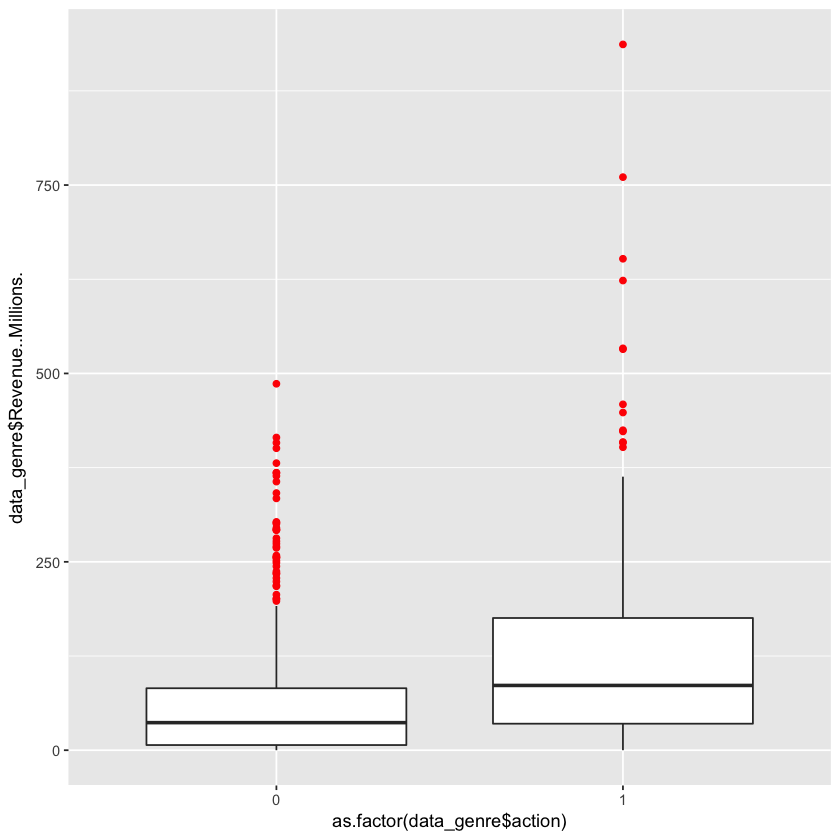

In [62]:
ggplot(data_genre,aes(x=as.factor(data_genre$action),y=data_genre$Revenue..Millions.))+
  geom_boxplot(outlier.colour = "red")

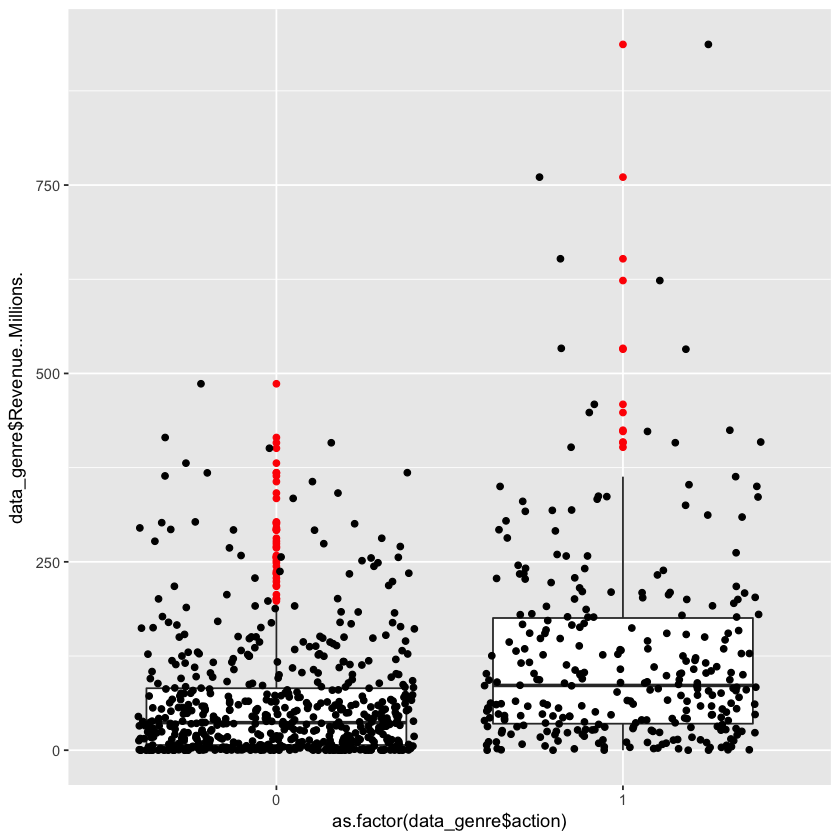

In [63]:
ggplot(data_genre,aes(x=as.factor(data_genre$action),y=data_genre$Revenue..Millions.))+
  geom_boxplot(outlier.colour = "red")+
  geom_jitter()

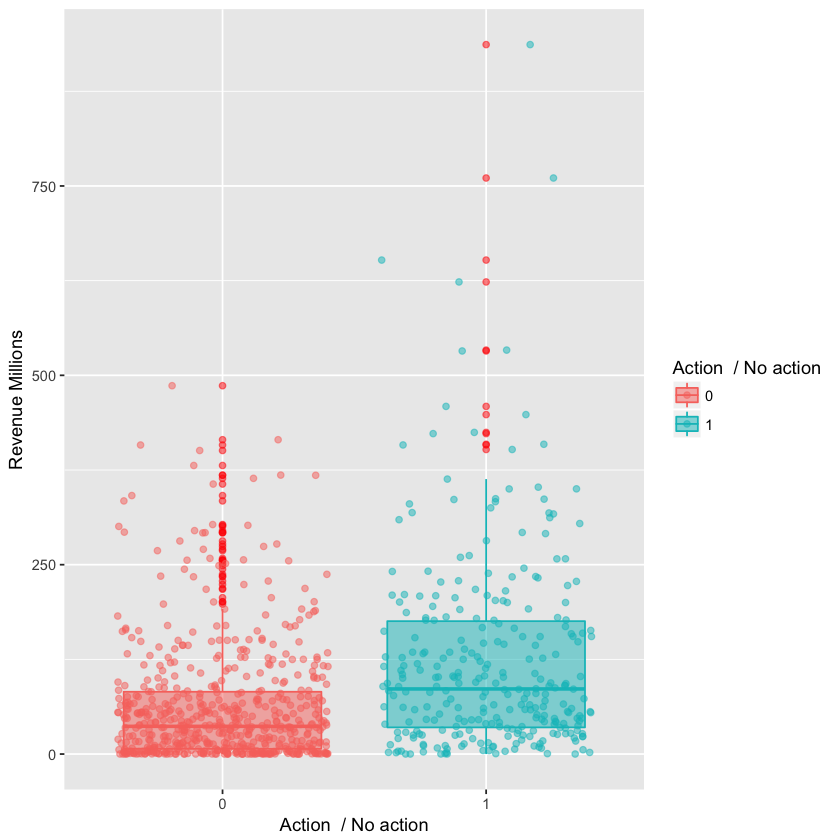

In [64]:
ggplot(data_genre,aes(x=as.factor(data_genre$action),y=data_genre$Revenue..Millions.,fill=as.factor(data_genre$action),col=as.factor(data_genre$action)))+
  geom_boxplot(outlier.colour = "red",alpha=I(0.5))+
  geom_jitter(alpha=I(0.5))+
  labs(fill="Action  / No action",col ="Action  / No action")+
  ylab("Revenue Millions")+
  xlab("Action  / No action")

## 14. T-test

In [65]:
# 결측치 대체한 
# linear 명령어
# ~
# action 변수가 0, 1 로 되어 있는데 명목척도(집단)이기 때문에  as.factor로 변환
t.test(data_genre$Revenue..Millions. ~ as.factor(data_genre$action))


	Welch Two Sample t-test

data:  data_genre$Revenue..Millions. by as.factor(data_genre$action)
t = -7.3386, df = 389.75, p-value = 1.266e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -78.23481 -45.17281
sample estimates:
mean in group 0 mean in group 1 
       62.79067       124.49448 


## 14-1. T-test 해석
### p-value
- p-value = 1.266e-12
    - e-12 = 10-12승
    - 0.0(*12) 소수점이 12자리
    
- p-value < 0.05 : H0 기각
- p-valuie > 0.05 : H1 기각

- action과 no action과 차이가 있다.

- - -
### sample estimates
```
mean in group 0 mean in group 1 
       62.79077       124.49458 
```       
Action 영화는 평균의 2배를 번다

In [66]:
str(data_genre)

'data.frame':	871 obs. of  35 variables:
 $ Rank              : int  1 2 3 4 5 6 7 9 10 11 ...
 $ Title             : Factor w/ 999 levels "(500) Days of Summer",..: 288 569 656 636 674 780 403 833 539 232 ...
 $ Genre             : Factor w/ 207 levels "Action","Action,Adventure",..: 12 86 196 93 8 8 117 3 75 81 ...
 $ Description       : Factor w/ 1000 levels "\"21\" is the fact-based story about six MIT students who were trained to become experts in card counting and s"| __truncated__,..: 111 539 881 614 221 520 135 279 241 803 ...
 $ Director          : Factor w/ 644 levels "Aamir Khan","Abdellatif Kechiche",..: 266 519 392 106 137 641 123 265 449 156 ...
 $ Actors            : Factor w/ 996 levels "Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani",..: 185 737 419 659 972 650 810 154 456 277 ...
 $ Year              : Factor w/ 11 levels "2006","2007",..: 9 7 11 11 11 11 11 11 11 11 ...
 $ Runtime..Minutes. : int  121 124 117 108 123 103 128 141 116 133 ...
 $ Rating            

# Q17. ratings & metascore
- 둘의 차이는?

## 14-2. New Hypothesis (H1)
- H1 : "특정 장르(Western, Sports, Musical)의 영화가 전체 평균을 까먹고 있는 건 아닐까?"
    - H1 = Not H0
    - H0 = WSM = ETC

In [67]:
data_genre$GROUP=ifelse(data_genre$western==1|data_genre$sport==1|data_genre$musical==1,'WSM','ETC')
data_genre$GROUP=as.factor(data_genre$GROUP)
summary(data_genre$GROUP)

t.test(data_genre$Metascore~data_genre$GROUP)

ETC WSM 
845  26


	Welch Two Sample t-test

data:  data_genre$Metascore by data_genre$GROUP
t = -0.70533, df = 24.888, p-value = 0.4872
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.395803  4.112901
sample estimates:
mean in group ETC mean in group WSM 
         59.52522          61.66667 


### 14-2-1. 해석
```
data:  data_genre$Metascore by data_genre$GROUP
t = -0.70533, df = 24.888, p-value = 0.4872
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.395803  4.112901
sample estimates:
mean in group ETC mean in group WSM 
         59.52522          61.66667 
```

### p-value
- p-value = 0.4872
    - 대립가설 기각<Br>
    <Br>
- ETC(59.52522) vs. WSM(61.66667)
    - 오히려 더 높음

# Q18. 자유도의 물음표
# Q19. 15-3. 정리의 물음표
# Q20. 적합성과 타당성
    - 적합성
        - 의미있는 데이터를 수집했느냐?
    - 타당성
        - 여러 번 반복 실험해도 타당한 결과가 나오냐?

## 15. Anova (F 검증)
### 15-1. 세 집단 이상의 분산 비교
    - 2개 이상 동시 비교를 못하기 때문에 Anova를 쓴다.
        - H0 : Ha = Hb = Hc
        - H1 : Not H0<br>
    - obj : 집단 간 차이(분산)
    
### 15-2. Anova Table
- http://statnmath.tistory.com/81
- http://goodtogreate.tistory.com/entry/%EC%9D%BC%EC%9B%90-%EB%B6%84%EB%A5%98-%EB%B6%84%EC%82%B0%EB%B6%84%EC%84%9D-oneway-Analysis-of-Variance

|||  SS  |  df  |  MS  |  ?  |  F분포  |  P-value  |  
|------|------|------|------|------|
||인자|SSF(집단 간 차이, ?)|dfF|SSF / dfF|MSA, MSF| MSA / MSE
||오차|SSE(집단 내 차이, Sum of Squared Error)|dfE|SSE / dfE|MSE(Mean Sqaured Error)|
||전체|SST(?,Sum Squared of Total)|dfT|||

#### 15-2-1. 집단 내 차이(SSE)
    - 방해되는 Error
#### 15-2-2. 집단 간 차이(SSF(A))
    - 우리의 목적
        - 집단 간 차이가 커야한다.
#### 15-2-3. 자유도(Degree of Freedom)
    - 자유롭게 선택할 수 있는 수
    - n-1
        - ex) 다섯 명이 농구를 하고 있다. 다섯 명한테 서로 다른 아이스크림을 주기로 했다. 아이스크림을 줄 때, 순서대로 줘야하는데 1번째 사람은 5개 중에 고르고 2번째 사람은 4개 중에 고른다. 마지막 사람은 선택권이 없다(남는 걸 먹기에). 자유롭게 선택하는 사람은 4명이다. 그래서 자유도는 4가 된다.
    - 그래서 이게 통계에 무슨 의미냐?
    - Random Variable(확률 변수)
        - 10번을 실행한다면... 1번째, 2번째 실험은 아무 값이나 가질 수가 있다. 마지막 실험은 선택권이 없다. 값이 주어진다.
        - 왜냐? x_bar가 주어져 있기 때문에. 평균은 상수(Constant)다. 그래서 평균에 맞춰야 한다.
        - 9번째까지는 자기 마음대로 가질 수 있는데, 마지막 애는 평균에 맞춰줘야 할 숙명을 가지고 있다.
        - 숫자가 무엇이든 마지막 수는 평균값이 나올 수 있게끔 숫자가 정해져 있다는 뜻?
        - 마지막은 선택권이 없다.

#### 15-2-4.  __MSE__(Mean Squared Error, 평균 제곱근 오차(편차)) ... 통계의 핵심(꽃)
- MSE = SSE(집단 내 차이) / dfE(자유도)

#### 15-2-5. F분포
    - F = MSA / MSE
    
### 15-3. 정리
- SS를 df로 나누는 이유는 SS가 제곱합 기준이다.
    - 제곱이라는 건 무조건 양수라는 뜻이다.
    - 무조건 양수라는 소리는 n수(관측치)가 많아지면, ?가 비정상적으로 올라가서 비교하기 힘들어진다.
- 보정이 필요하다.
    - 그래서 자유도로 나눠줘야 한다.
    - 자유도로 평균값을 구해줘야 한다.
        - n으로 나누는 게 아니라 자유도로 나눠줘야 한다.
    - 값을 비교하기 위해 고정을 시켜주는 것이다?<br>
<br>
    - SSE랑 SSF를 비교하기 위해서!
    - 보통 (같다라는 걸) 비교하는 방법에는 빼기와 나누기가 있다.
        - (비교하려면) 공평해야 한다.
            - 집단 간 단위가 공평해야 한다는 뜻.
            - 나눠서 1 나오거나 빼서 0이 나오면 같다는 뜻.
        - 자유도의 수가 다르다.
            - 빼서 비교할 수 없다.
        - 그래서 나눠서 1근처에 있으면 "차이가 없다" 그런 식으로 간다?
        - 1 근처면 차이가 없고, 1근처가 아니라면?
            - F 값이라는 게 ... MSA/MSE다.<br>
        <br>
    - __F가 커지면, P-value(유의확률)이 줄어든다. 작아진다는 소리는 H0 기각될 확률이 높아진다.__
        - 이말인즉슨, 유의한 변수를 찾는다는 것이다. 차이가 나는 변수를 찾는다는 것이다.
        - 그러면 이제, 유의한 변수를 찾는 통계의 목적을 달성한 것이다.<br>
        <br>
    - __반대로 F가 낮아지면, P-value가 올라간다. H0가 기각될 확률이 줄어든다.__
        - 유의한 변수를 못 찾는다는 소리다.
        - 목적을 달성하지 못하는 것이다.<br>
        <br>
    - __F = MSF(혹은 MSA) / MSE__
        - F값이 커지려면
            - 1) MSF가 커지거나
            - 2) MSE가 작아지거나 <br>
            <br>
        - MSF는 Target(목표)이다. 조정할 수 없다. 왜냐하면 집단 자체다.
        - __MSE를 낮추는 게 가장 핵심__이다.<br>
        <br>
    - MSE를 낮추려면
        - 데이터 수집할 때, 오차가 안 생기게 정교하게 측정하고 수집해야한다.
        - 기준
            - 데이터 수집의 __적합성__
                - 무엇이 적합하냐?
            - 데이터 수집의 __타당성__
                - 여러 번 할 때, 타당하냐<br>
                <br>
        - ex) 자동차 사고 방지 실험
            - 에어백 터지는 걸 보고 싶다면, 모든 실험마다 에어백이 변해야한다. 나머지 요인(차량 두꼐, 속력)들이 변하면 측정할 떄 MSE가 높아진다.
            - 관심 있는 것에 대해서만 값이 변해야지, 나머지는 통제 요인이 되어야 한다.
            - 고정시키지 못하면 error가 높아진다.<br>
            <br>
        - ex) 집단이면, 관광객들의 매출을 국가별 매출을 보고 싶다면, 다른 걸 통제 시켜야 한다.
            - 나이 통제
            - 동일한 조건으로 통제시켜야 한다.
            - 동일한 조건이 안 되면 error가 높아져서 힘들어진다.<br>
            <br>
    - 데이터의 수를 많이 늘리면...
        - 그것의 의미는 n이 많아져서 자유도가 높아진다는 말이다.
            - 단순히 정보가 많아진다는 소리다.
                - 정보가 많아진다는 소리는 '믿을만하다'는 뜻
                    - 30명의 결과와 100명의 결과 중에 100명의 결과를 더 믿는다는 것<br>
                    <br>
    - MSE는 정확히 말하면,
        - 현실 vs. 이론
            - Error는 이론으로 설명할 수 없는 현실이다.
            - 이게 최대한 낮아야지 좋은 분석이다.
            - 통계분석은 현실을 분석하려는 것인데, 현실과 이상간의 괴리가 적어야 한다.
            - 그 지표가 MSE다.<br>
            <br>
    - MSE와 __Confusion Matrix__
        - MSE와 비슷한 개념
        - MSE는 y가 연속형 변수인데, Confusion Matrix는 y가 Categorical이다.
        - 연속형 값을 추정하는 것이라면, o/x를 분류하는 것이다.
        - 비슷한 개념인데 척도에 따라 살짝 다른 것이다.<br>
        <br>
    - F가 크면, H0를 기각 ... 평균 차이가 있다/없다로 나뉜다.
        - 만약에 H0가 기각이 됐는데...
            - 뭐가 차이가 있는지 모른다.
            - 그래서 __Post-Hoc__이라는 사후검정을 한다.
                - 뭐가 다른지 파악하기 위한 용도
- - -
- EDA의 과정에서 사용
- 유의한 변수를 찾기 위해... 그렇게 의미있는지 잘 모르갰다.
- 잘 안 쓰고, 그래프로 파악

# Q21. 여러 집단 비교의 목적?

### 15-4. 여러 집단 비교
- 분류 추가하기 (4개 장르의 그룹)
    - action
    - action&romance
    - romance
    - etc
    
    
- obj
    - action과 etc에서 분류를 더 자세하게 만들기 위해?

In [68]:
data_genre$GROUP_2=ifelse(data_genre$action==1&data_genre$romance==1,'action&romance',
                        ifelse(data_genre$action==1, 'action',
                              ifelse(data_genre$romance==1, 'romance', 'etc')))

data_genre$GROUP_2=as.factor(data_genre$GROUP_2)
summary(data_genre$GROUP_2)

# t.test(data_genre$Metascore~data_genre$GROUP)

action action&romance            etc        romance 
           279              7            463            122

### 15-5. summary anova
- AOV = Analysis of Variance
- summary

```
                    Df  Sum Sq Mean Sq F value Pr(>F)    
data_genre$GROUP_2   3  857098  285699   29.41 <2e-16 ***
Residuals          867 8421999    9714                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
```

- df : 자유도

- data_genre$GROUP_2 (집단간)
    - Mean Sq : 285699
    
- Residuals (집단 내)
    - Mean Sq : 9714
    
- Pr(>F)
    - <2e-16
        - 유의수준(0.05)보다 작기 때문에 귀무가설 기각(not H0)
        - 어떤 차이가 있는지 모른다.
        - 그렇기에 사후분석(post-hoc)을 해야한다.

In [74]:
anova = aov(data_genre$Revenue..Millions.~data_genre$GROUP_2)
summary(anova)

                    Df  Sum Sq Mean Sq F value Pr(>F)    
data_genre$GROUP_2   3  857098  285699   29.41 <2e-16 ***
Residuals          867 8421999    9714                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Q22. 설명 적어놓은 게 맞는지?
# Q23. Tukey와 Bonferroni는 무엇인지?

### 15-6. post hoc
- 한 번에 모든 걸 비교할 수 없다.
    - 2개씩 대소비교를 해야함.<br>
<br>
- 다양한 방법들
    - TukeyHSD
    - Bonferroni
    
    
```
                            diff        lwr        upr     p adj
action&romance-action  -99.48807 -196.57079  -2.405350 0.0421621
etc-action             -59.02077  -78.24812 -39.793424 0.0000000
romance-action         -83.56229 -111.09824 -56.026326 0.0000000
etc-action&romance      40.46730  -56.14212 137.076712 0.7029652
romance-action&romance  15.92578  -82.67400 114.525567 0.9757817
romance-etc            -24.54151  -50.35921   1.276188 0.0693193
```

- lwr ~ upr 을 보면 된다.
    - -lwr ~ -lwr이면
        - A보다 B값이 더 크다는 것을 알 수 있고
    - -lwr ~ +lwr이면
        - 즉 0사이에 들어가 있기에 두 개 변수는 동일하다고 해석
    - +lwr ~ +lwr이면
        - A값이 더 크다는 것을 알 수 있다.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data_genre$Revenue..Millions. ~ data_genre$GROUP_2)

$`data_genre$GROUP_2`
                            diff        lwr        upr     p adj
action&romance-action  -99.48807 -196.57079  -2.405350 0.0421621
etc-action             -59.02077  -78.24812 -39.793424 0.0000000
romance-action         -83.56229 -111.09824 -56.026326 0.0000000
etc-action&romance      40.46730  -56.14212 137.076712 0.7029652
romance-action&romance  15.92578  -82.67400 114.525567 0.9757817
romance-etc            -24.54151  -50.35921   1.276188 0.0693193


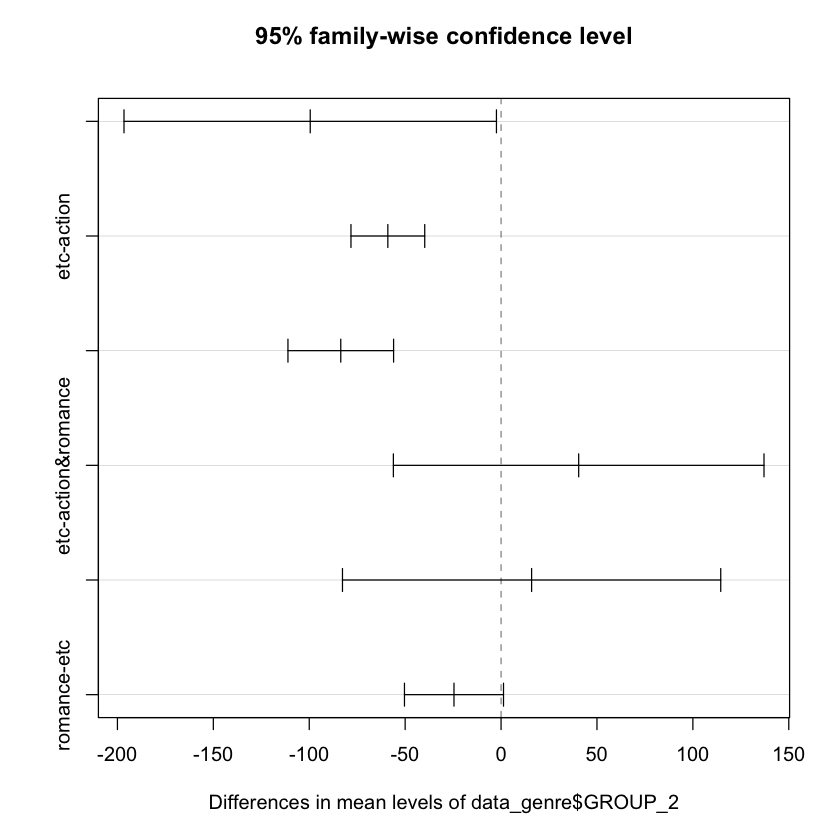

In [76]:
tukey = TukeyHSD(anova)
tukey
plot(tukey)

# Q24. 위에 그래프 보는 법?
# Q25. Logitsic Regression?
# Q26. 최소제곱법 수식?

## 16. Regression
### 16-1. 통계 분석의 꽃
- 관계 + 예측
    - 하나의 선으로 표시하고 싶은 게 회귀분석
    - 관계를 보고 예측을 하는 것.<br>
    <br>
- y = β0 + β1 * x
    - 구해야할 parameter들을 고정시켜놓고 추정한다.

### 16-2. 최소제곱법
- 선의 계수를 어떤 기준으로 정하는 게 두 변수를 나타내는 점들을 대표할 수 있을까?
    - 최소제곱법
        - ȳ = y 평균
        - ŷ_i = 예측(추정)값
        - y_i = 관측값<br>
        <br>
    - 최소제곱법 수식?

### 16-3. 회귀분석의 가설검정
- 회귀분석의 목적 : 관계
    - H0 (β1 = 0)
        - 관계(차이)가 없다(무의미), 기울기(β1)가 0이다.<br>
        <br>
    - H1 (β1 != 0)
        - 관계(차이)가 있다(유의미), 기울기(β1)가 0이 아니다.<br>
        <br>
- 회귀분석은 기울기가 0인지 아닌지 검증하는 것이다.<br>
<br>
- Anova Table과 비슷하다. __MSE가 낮아야지 F가 높아진다.__
    - MSE, (통계로 설명할 수 없는)현실의 영역
    - MSE가 가장 낮은 게 좋은 모형이 된다.
        - 전통적 통계 분석도 그렇고 ML도 동일함
    
|||  SS  |  df  |  MS  | F분포  |  P-value  |  
|------|------|------|------|------|
||회귀|SSR|dfR|MSR|MSR/MSE| 
||잔차(Err)|SSE(집단 내 차이, Sum of Squared Error)|dfE|MSE(Mean Sqaured Error)|
||전체|SST(?,Sum Squared of Total)|dfT|||

- __(y가 연속형 변수일 때,) MSE는 모든 것의 핵심__
    - (관계가 있는) 데이터를 잘 찾아야 한다.
        - 잘 찾고, 잘 변형시켜서, 잘 핸들링하고 분석.
    - 좋은 데이터가 들어와야 함
    - MSE가 낮아야지 좋은 모형이 된다.<br>
    <br>
- __MSE에 대한 기준?__
    - P-value는 기준이 있는데
    - F분포 자체가 자유도에 따라 변한다.
    - 분산비를 비교한다는 게, x 카이제곱 분포가 있고, F분포가 있다.
        - 카이제곱 분포는 어떻게 되냐면... 
            - 1집단의 분산에 대한 분포<br>
            <br>
        - F분포
            - 2집단의 분산에 대한 분포?
            - anova(f, 분산 분포)는 3집단 이상일 때 가능한 게 아닌지?<br> 
           <br>
    - 그래서 MSE에 대한 기준이 없다.
        - 모형을 여러 개 만들어서 각자의 MSE를 구할 수는 있다.
            - 낮은 MSE가 좋은 모형이라는 식으로 갈 수 있다.
            - 그 중에 선택하는 모형 선택법 ... k-fold Cross Validation

### 16-4. 통계를 공부하지 않고 ML/DL부터 공부하는 것의 문제
- 통계에서 시작한 것인데...
    - CV를 하는 이유
        - MSE 때문에 <br>
        <br>
    - sigmoid는 아는데 Logistic Regression은 모르는...
        - Logistic의 기본인 OGB가 뭔지도 모르고...
            - 그러니까 알고리즘 공부해봤자 못 써먹는 것이다.
            - 샘플 주는 거 박을 줄만 알지...<br>
            <br>
    - 패캠 적자... 강사에 대한 퀄리티 컨트롤이 안 된다.
        - sample 가져와서 돌리는 법 알려주는데 무슨 의미가 있나...
        - 비싸기도 비싸고...<br>
        <br>
- 핵심은 데이터를 바라보는 것부터 해야하는데... ML이든, DL이든 여기에서 시작한다.
- 통계는 역피라미드다.
    - 실용통계 -(심화)-> 수리통계학 (원인을 말해주는 것)-> 회귀분석 / 다변량 -> 범주형 -> (3개가 섞이면) Machine Learning -> 시계열 / 확률론 -> Simulation
- - -
- 다변량분석 : 주성분분석(PCA)
    - 변수가 많다는 건 차원이 많다는 것
    - 핵심 : 차원 축소
        - 수많은 변수를 어떻게 줄일 것이냐?

### 16-5. 회귀분석과 취업과정
- Anova가 사후검정을 했는데, 회귀분석도 덜컹 됐다고 "회귀분석이 나왔다"가 아니다. 또 딴 걸로 이어진다.

||취업|회귀|
|------|------|------|------|------|
||서류|p-value를 통한 H0 검정|-기본자격이 되는지|
||인적성|R^2, β0 & β1을 check|-쓸만한 지 // R^2 = 설명력, 이 회귀식이 얼마나 Data 관계를 설명하는지? 즉, 능력이 좋은지 보는 것|
||면접|잔차 검정(진단)|-진짜 똑똑한지 검증 // 진짜 이 회귀식을 써도 되는지|
||신체검사|다중공선성||

- R Squared
    - 설명력, 전체 중에서 회귀식이 Data를 얼마나 잘 설명하는지?
    - 설명할 수 있는 영역 안에 전체 점에서 얼마나 들어가 있는지?
    - ex) 0.8의 의미
        - 80%의 설명력을 가졌지만, 그 값이 아닐 (실패)확률이 20%다.
        - 근데 실무진들은 이런(애매한)식의 표현을 싫어한다.
        - 왜냐하면 O / X만 원한다.<br>
        <br>
- 일본 후쿠시마 원전 사례
    - 쓰나미가 문제가 아니라 원전이 문제가 되었다.
    - 원전은 왜 터졌는가?
        - 지진? -> X
            - 원전이 지진으로 부숴지려면 지구가 뽀개져야한다.
        - 파도? -> O
            - 원전은 보통 해안가에 짓는다.
            - 일본은 쓰나미가 오기 때문에 방파제를 짓는다.
            - 쓰나미가 몇 m 올지 확률을 구한다.
            - 쓰나미가 와도 11m를 넘을 확률이 0.1%이었다.
            - 사실상, 일어나지 않은 일이라고 가정한다.
            - 근데 일어났다. 지진으로 무너진 게 아니라, 11m 이상의 파도가 올 확률을 무시했던 것이다.
            - 0.1%라는 확률을. 넘어와서 난리가 난 것이다.
            - 의사결정의 문제가 있었다.
            - 돌이킬 수 없는... 회귀분석과 연관되는 것.<br>
            <br>
- - -
### 16-6. [잔차진단](http://egloos.zum.com/kernelist/v/48044)
- 잔차진단의 목적
    - 회귀식을 써도 되는지 보는 것
    - 봐야할 3가지를 맞춰야 한다.
        - 등분산성을 띄고 있는가
        - 정규분포를 띄고 있는가
    
### 16-6-1. [잔차의 등분산성](http://www.ssacstat.com/base/cs/cs_05.php?com_board_basic=read_form&com_board_idx=289&topmenu=5&left=5&&com_board_search_code=&com_board_search_value1=&com_board_search_value2=&com_board_page=37&)

- 회귀식은 선을 기준으로 점들이 무작위로 배치되어 있어야 한다.
- 통계에서 Pattern을 인정하지 않는다. 그건 다른 분석을 해야한다.
- 그게 상관분석??????
- 통계는 Random에서 시작해서 Random으로 끝난다.
    - Random Variable(확률 실험)로 시작해서 확률로 끝난다.
<img src="http://www.ssacstat.com/base/component/board/board_12/u_image/20151229070806_1911463763.png">
<img src="http://www.ssacstat.com/base/component/board/board_12/u_image/20151229070913_963068411.png">

### 16-6-2. 정규성
- yi가 정규분포를 띄고 있는지?
- 추정에 있어서 yi가 예측값인데, 추정을 정확하게 하기 위해서다.
- 회귀식을 그리는데 r-squared가 0.8(80%)이라면...
    - 그 값이 나올 확률이 80%가 아니다.
    - 얘한테도 신뢰구간이 있다.
    - 통계는 무조건 구간추정이다.
    - 가운데 값(점추정량)이 가장 높다는 것이지, 범위 안에 나올 확률(구간추정량)이 다 존재한다.
    - 예측범위가 존재한다.
    - 범위가 정규분포로 그려지는 게 편하다.
- normal Q-Q plot : 이걸로 정규성을 판단

### 16-6-3. 독립성
- yi가 있는데 yi-1이 있을 것이다.
    - i번째 y값이랑 i번째 전 y값이 독립적으로 이루어져 있는지?<br>
    <br>
- 과거와 연관이 있는지 확인
    - 과거와 현재와 미래가 연관이 되면 ... 시계열(Time Series)이 된다.
    

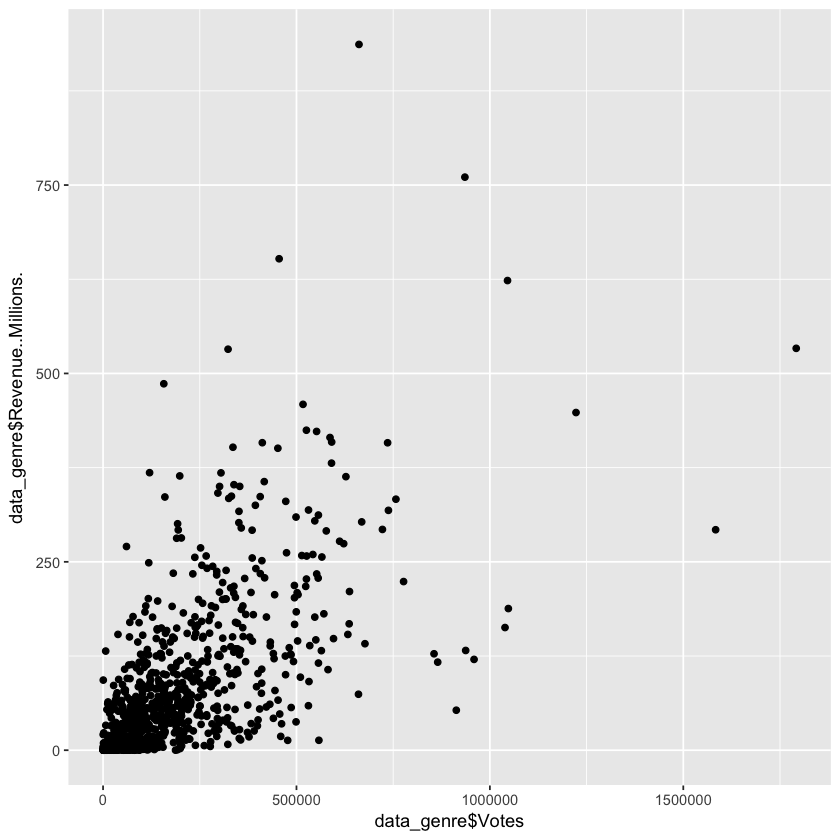

In [77]:
ggplot(data_genre, aes(x=data_genre$Votes, y=data_genre$Revenue..Millions.))+
  geom_point()

```
reg = lm(y~x)
summary(Reg)
```

In [78]:
Reg = lm(data_genre$Revenue..Millions.~data_genre$Votes)
summary(Reg)


Call:
lm(formula = data_genre$Revenue..Millions. ~ data_genre$Votes)

Residuals:
    Min      1Q  Median      3Q     Max 
-278.08  -35.49  -17.09   20.77  691.92 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.735e+01  3.799e+00   4.567 5.66e-06 ***
data_genre$Votes 3.436e-04  1.402e-05  24.511  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 79.46 on 869 degrees of freedom
Multiple R-squared:  0.4088,	Adjusted R-squared:  0.4081 
F-statistic: 600.8 on 1 and 869 DF,  p-value: < 2.2e-16


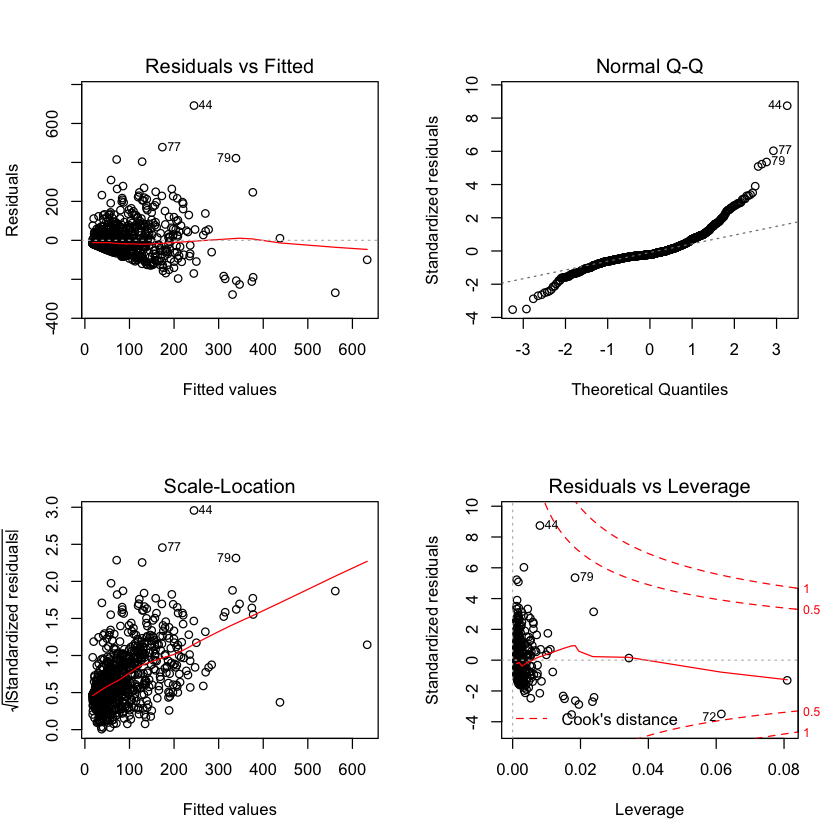

In [79]:
par(mfrow=c(2,2))
plot(Reg)

In [80]:
Reg = lm(data_genre$Revenue..Millions.~data_genre$Votes + data_genre$Rating)
summary(Reg)


Call:
lm(formula = data_genre$Revenue..Millions. ~ data_genre$Votes + 
    data_genre$Rating)

Residuals:
    Min      1Q  Median      3Q     Max 
-292.44  -36.08  -14.42   18.56  695.04 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.320e+02  2.271e+01   5.811 8.70e-09 ***
data_genre$Votes   3.861e-04  1.612e-05  23.949  < 2e-16 ***
data_genre$Rating -1.801e+01  3.519e+00  -5.117 3.82e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.33 on 868 degrees of freedom
Multiple R-squared:  0.4261,	Adjusted R-squared:  0.4248 
F-statistic: 322.2 on 2 and 868 DF,  p-value: < 2.2e-16


In [81]:
library(car)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:purrr’:

    some

The following object is masked from ‘package:dplyr’:

    recode



In [82]:
vif(Reg)

data_genre$Votes data_genre$Rating 
          1.36094           1.36094

# QQ.
## 조건부확률
## ROC Curve
## Threshold

### Q9. 특정영화 혹은 특정 장르에 대한 단어 출현 빈도를 네트워크 그래프로 그리려면?
### Q10. 차원을 축소하는 방법
### Q11. Library설명
- tidyverse
- corrr
- bindrcpp
- ggraph
- igraph

### Q12. Network graph
- 동시발생과 상관계수는 동일한 목적성을 취하고 비슷한 개념인 것 같은데 둘의 차이점은?
    - 변수 척도에 따라 달라짐
        - 범주형 : Co-Occurrence
        - 연속형 : Correlation
        
### Co-occurrence graph 그리기
### Q14. quantile
### Q15. subset
### Q17. ratings & metascore의 차이
### Q18. 자유도의 물음표
### Q19. 15-3. 정리의 물음표
### Q20. 적합성과 타당성
- 적합성
    - 의미있는 데이터를 수집했느냐?
- 타당성
    - 여러 번 반복 실험해도 타당한 결과가 나오냐?
    
### Q21. 여러 집단을 비교하는 목적은?
### Q22. 설명 적어놓은 게 맞는지?
### Q23. Tukey와 Bonferroni는 무엇인지?
### Q24. 위에 그래프 보는 법?
### Q25. Logitsic Regression?
### Q26. 최소제곱법 수식?